<a href="https://colab.research.google.com/github/osmarbraz/coebert/blob/main/CorrelacaoCSTNews_ClassificadorCalculo_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Correlação do Classificador e Cálculo coerência do conjunto de dados CSTNews

Realiza a análise de correlação entre as classificações realizadas e o cálculo de medida de coerência utilizando BERT no  CSTNews.

----------------------------

**Link biblioteca Transformers:**
https://github.com/huggingface/transformers

**Artigo original BERT:**
https://arxiv.org/pdf/1506.06724.pdf

# 1 Preparação do ambiente
Preparação do ambiente para execução do notebook.

## 1.1 Tempo inicial de processamento

In [ ]:
import time
import datetime

# Marca o tempo de início do processamento
inicioProcessamento = time.time()

In [ ]:
print('  Tempo de início de processamento:  {:} (h:mm:ss)'.format(inicioProcessamento))

  Tempo de início de processamento:  1624706562.085317 (h:mm:ss)


## 1.2 Funções e classes auxiliares

Função auxiliar para formatar o tempo como `hh: mm: ss`

In [ ]:
import time
import datetime

def formataTempo(tempo):
    '''
    Pega a tempo em segundos e retorna uma string hh:mm:ss
    '''
    # Arredonda para o segundo mais próximo.
    tempoArredondado = int(round((tempo)))
    
    # Formata como hh:mm:ss
    return str(datetime.timedelta(seconds=tempoArredondado))

Calcula a média de uma lista tempo string no formato hh:mm:ss.

In [ ]:
# Import das bibliotecas.
from cmath import rect, phase
from math import radians, degrees
  
def mediaAngulo(deg):
    return degrees(phase(sum(rect(1, radians(d)) for d in deg)/len(deg)))
 
def mediaTempo(tempos):
    '''
    Calcula a média de uma lista de tempo string no formato hh:mm:ss
    '''
    t = (tempo.split(':') for tempo in tempos)
    # Converte para segundos
    segundos = ((float(s) + int(m) * 60 + int(h) * 3600) for h, m, s in t)
    # Verifica se deu algum dia
    dia = 24 * 60 * 60
    # Converte para angulos
    paraAngulos = [s * 360. / dia for s in segundos]
    # Calcula a média dos angulos
    mediaComoAngulo = mediaAngulo(paraAngulos)
    media_segundos = mediaComoAngulo * dia / 360.
    if media_segundos < 0:
        media_segundos += dia
    # Recupera as horas e os minutos  
    h, m = divmod(media_segundos, 3600)
    # Recupera os minutos e os segundos
    m, s = divmod(m, 60)    
    return '{:02d}:{:02d}:{:02d}'.format(int(h), int(m), int(s))

Calcula a soma de uma lista de tempo string no formato hh:mm:ss

In [ ]:
def somaTempo(tempos):
    '''
    Calcula a soma de uma lista de tempo string no formato hh:mm:ss
    '''
    t = (tempo.split(':') for tempo in tempos)
    # Converte para segundos
    segundos = ((float(s) + int(m) * 60 + int(h) * 3600) for h, m, s in t)
    # Soma os segundos
    soma_segundos = sum([s * 1. for s in segundos])
    # Recupera as horas e os minutos   
    h, m = divmod(soma_segundos, 3600)
    # Recupera os minutos e os segundos
    m, s = divmod(m, 60)    
    return '{:02d}:{:02d}:{:02d}'.format(int(h), int(m), int(s))

Remove tags de um documento(texto)

In [ ]:
def remove_tags(documento):
    '''
    Remove tags de um documento(texto)
    '''
    
    import re

    documentoLimpo = re.compile('<.*?>')
    return re.sub(documentoLimpo, '', documento)

Funções auxiliares de arquivos

In [ ]:
# Gera um paragráfo com as linhas do arquivo especificado
def carregar(nomeArquivo):
    '''
    Carrega um arquivo texto e retorna as linhas como um único parágrafo(texto)
    '''

    # Linha anterior    
    arquivo = open(nomeArquivo, 'r')
    
    paragrafo = ''
    for linha in arquivo:
        linha = linha.splitlines()
        linha = ' '.join(linha)
        # Remove as tags existentes no final das linhas
        linha = remove_tags(linha)
        if linha != '':
          paragrafo = paragrafo + linha.strip() + ' '
    arquivo.close()
    # Remove os espaços em branco antes e depois do parágrafo
    return paragrafo.strip()

# Gera uma lista das linhas do arquivo especificado
def carregarLista(nomeArquivo):
    '''
    Carrega um arquivo texto e retorna as linhas como uma lista de sentenças(texto)
    '''

    # Linha anterior    
    arquivo = open(nomeArquivo, 'r')
    
    sentencas = []
    for linha in arquivo:        
        linha = linha.splitlines()
        linha = ' '.join(linha)
        linha = remove_tags(linha)
        if linha != '':
          sentencas.append(linha.strip())
    arquivo.close()
    return sentencas    

def salvar(nomeArquivo,texto):                       
    '''
    Salva um texto em um arquivo
    '''

    arquivo = open(nomeArquivo, 'w')
    arquivo.write(str(texto))
    arquivo.close()

## 1.3 Tratamento de logs

In [ ]:
# Biblioteca de logging
import logging

# Formato da mensagem
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## 1.4 Identificando o ambiente Colab

In [ ]:
# Se estiver executando no Google Colaboratory
import sys

# Retorna true ou false se estiver no Google Colaboratory
IN_COLAB = 'google.colab' in sys.modules

## 1.5 Biblioteca de limpeza de tela

In [ ]:
from IPython.display import clear_output

## 1.6 Conecta ao Google Drive



In [ ]:
# Monta o Google Drive para esta instância de notebook.
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## 1.7 Colaboratory

Usando Colab GPU para Treinamento


Uma GPU pode ser adicionada acessando o menu e selecionando:

`Edit -> Notebook Settings -> Hardware accelerator -> (GPU)`

Em seguida, execute a célula a seguir para confirmar que a GPU foi detectada.

In [ ]:
# Importando a biblioteca
import tensorflow as tf

# Recupera o nome do dispositido da GPU.
device_name = tf.test.gpu_device_name()

# O nome do dispositivo deve ser parecido com o seguinte:
if device_name == '/device:GPU:0':
    print('Encontrei GPU em: {}'.format(device_name))
else:
    print('Dispositivo GPU não encontrado')
    #raise SystemError('Dispositivo GPU não encontrado')

Dispositivo GPU não encontrado


Nome da GPU

Para que a torch use a GPU, precisamos identificar e especificar a GPU como o dispositivo. Posteriormente, em nosso ciclo de treinamento, carregaremos dados no dispositivo.

Vale a pena observar qual GPU você recebeu. A GPU Tesla P100 é muito mais rápido que as outras GPUs, abaixo uma lista ordenada:
- 1o Tesla P100
- 2o Tesla T4
- 3o Tesla P4 (Não tem memória para execução 4 x 8, somente 2 x 4)
- 4o Tesla K80 (Não tem memória para execução 4 x 8, somente 2 x 4)

In [ ]:
# Importando a biblioteca
import torch

# Se existe GPU disponível...
if torch.cuda.is_available():    

    # Diz ao PyTorch para usar GPU.    
    device = torch.device('cuda')

    print('Existem {} GPU(s) disponíveis.'.format(torch.cuda.device_count()))

    print('Iremos usar a GPU: {}'.format(torch.cuda.get_device_name(0)))

# Se não...
else:
    print('Sem GPU disponível, usando CPU.')
    device = torch.device('cpu')

Sem GPU disponível, usando CPU.


Memória

Memória disponível no ambiente

In [ ]:
# Importando as bibliotecas.
from psutil import virtual_memory

ram_gb = virtual_memory().total / 1e9
print('Seu ambiente de execução tem {: .1f} gigabytes de RAM disponível\n'.format(ram_gb))

if ram_gb < 20:
  print('Para habilitar um tempo de execução de RAM alta, selecione menu o ambiente de execução> Alterar tipo de tempo de execução')
  print('e selecione High-RAM. Então, execute novamente está célula')
else:
  print('Você está usando um ambiente de execução de memória RAM alta!')

Seu ambiente de execução tem  13.6 gigabytes de RAM disponível

Para habilitar um tempo de execução de RAM alta, selecione menu o ambiente de execução> Alterar tipo de tempo de execução
e selecione High-RAM. Então, execute novamente está célula


# 2 Resultado do Cálculo das Medidas de (in)coerência

In [ ]:
CONJUNTODADOS = 'CSTNews'

## 2.1 Carrega os dados das medidas 

In [ ]:
def carregaMedidas(MODELO, ESTRATEGIA, STOPWORD, MODELO_BERT, TAMANHO_BERT):
  # Import das bibliotecas.
  import os
  import pandas as pd

  NOME_BASE = 'MedicaoCoerenciaCSTNews_v1'

  NOME_ARQUIVO_MEDICAO = NOME_BASE + MODELO + ESTRATEGIA + STOPWORD + MODELO_BERT + TAMANHO_BERT + '.csv'

  # Diretório para salvar o arquivo.
  DIRETORIO_MEDICAO = '/content/drive/MyDrive/Colab Notebooks/Data/CSTNEWS/validacao_medicao/Medicao/'
                                             
  # Verifica se o diretório dos resultados existem.
  if os.path.exists(DIRETORIO_MEDICAO):
    arquivos = os.listdir(DIRETORIO_MEDICAO)     

    NOME_ARQUIVO_MEDICAO_COMPLETO = DIRETORIO_MEDICAO + NOME_ARQUIVO_MEDICAO
    
    # Verifica se o arquivo existe.
    if os.path.isfile(NOME_ARQUIVO_MEDICAO_COMPLETO):
      print("Carregando arquivo:", NOME_ARQUIVO_MEDICAO)
      # Carrega os dados do arquivo  
      dadosMedida = pd.read_csv(NOME_ARQUIVO_MEDICAO_COMPLETO, sep=';')
      
    else:
      print('Arquivo com as medições não encontrado')        

  else:
    print('Diretório com as medições não encontrado')

  print('Registros: ', len(dadosMedida))

  return dadosMedida

In [ ]:
MODELO = ['_pretreinado', '_ajustado']
ESTRATEGIA = ['_mean', '_max'] 
FILTRO_PALAVRA = ['_tap','_ssw', '_ssb']  #['TODAS_AS_PALAVRAS', 'SEM_STOPWORDS', 'SOMENTE_SUBSTANTIVOS']  
MODELO_BERT = ['_BERTimbau', '_BERTmultilingual']
TAMANHO_BERT = ['_base','_large']

# MEAN, TODAS AS PALAVRAS
dadosMedidaBERTimbaub = carregaMedidas(MODELO[0], ESTRATEGIA[0], FILTRO_PALAVRA[0], MODELO_BERT[0], TAMANHO_BERT[0])
dadosMedidaBERTimbaul = carregaMedidas(MODELO[0], ESTRATEGIA[0], FILTRO_PALAVRA[0], MODELO_BERT[0], TAMANHO_BERT[1])
dadosMedidaBERTm = carregaMedidas(MODELO[0], ESTRATEGIA[0], FILTRO_PALAVRA[0], MODELO_BERT[1], TAMANHO_BERT[0])

# MAX, TODAS AS PALAVRAS
#dadosMedidaBERTimbaub = carregaMedidas(MODELO[0], ESTRATEGIA[1], FILTRO_PALAVRA[0], MODELO_BERT[0], TAMANHO_BERT[0])
#dadosMedidaBERTimbaul = carregaMedidas(MODELO[0], ESTRATEGIA[1], FILTRO_PALAVRA[0], MODELO_BERT[0], TAMANHO_BERT[1])
#dadosMedidaBERTm = carregaMedidas(MODELO[0], ESTRATEGIA[1], FILTRO_PALAVRA[0], MODELO_BERT[1], TAMANHO_BERT[0])



Carregando arquivo: MedicaoCoerenciaCSTNews_v1_pretreinado_mean_tap_BERTimbau_base.csv
Registros:  9960
Carregando arquivo: MedicaoCoerenciaCSTNews_v1_pretreinado_mean_tap_BERTimbau_large.csv
Registros:  9960
Carregando arquivo: MedicaoCoerenciaCSTNews_v1_pretreinado_mean_tap_BERTmultilingual_base.csv
Registros:  9920


In [ ]:
dadosMedidaBERTimbaub.sample(5)

data                    arquivo  ...       ceuc        cman
5184  09/06/2021 23:13          C32_Extrato_1.txt  ...  17.896927  755.767497
1150  09/06/2021 23:13          C34_Extrato_4.txt  ...  17.739519  732.858545
3570  09/06/2021 23:13          C45_Extrato_6.txt  ...  17.170396  718.661891
2661  09/06/2021 23:13  C18_Extrato_2_Perm_10.txt  ...  18.402125  780.372453
1974  09/06/2021 23:13          C50_Extrato_1.txt  ...  15.647612  650.026154

[5 rows x 5 columns]

In [ ]:
dadosMedidaBERTimbaul.sample(5)

data                   arquivo  ...       ceuc        cman
7855  10/06/2021 08:51   C5_Extrato_6_Perm_7.txt  ...  16.293215  754.673665
7255  10/06/2021 08:51  C37_Extrato_5_Perm_7.txt  ...  14.667609  720.036967
9370  10/06/2021 08:51         C32_Extrato_6.txt  ...  17.249922  813.872890
2211  10/06/2021 08:51  C34_Extrato_3_Perm_5.txt  ...  17.217980  788.495937
3308  10/06/2021 08:51         C17_Extrato_4.txt  ...  15.054851  723.337231

[5 rows x 5 columns]

In [ ]:
dadosMedidaBERTm.sample(5)

data                    arquivo  ...       ceuc        cman
7770  11/06/2021 09:29          C37_Extrato_5.txt  ...  20.010559  856.758830
2916  11/06/2021 09:29          C49_Extrato_2.txt  ...  19.017749  815.671427
4587  11/06/2021 09:29  C21_Extrato_6_Perm_13.txt  ...  20.390843  872.275757
40    11/06/2021 09:29          C40_Extrato_4.txt  ...  17.774471  739.859090
7880  11/06/2021 09:29          C48_Extrato_1.txt  ...  21.983333  945.696910

[5 rows x 5 columns]

### Separa os documentos e remove as repetições

In [ ]:
def separaDocumentos(dadosMedida):
  
  # Separa os originais
  dfOriginalMedida = dadosMedida.loc[dadosMedida['arquivo'].str.contains('Perm')==False]
  # Remove os duplicados
  dfOriginalMedida = dfOriginalMedida.drop_duplicates(subset=['arquivo'])
  print('Registros: ', len(dfOriginalMedida))

  # Separa os permutados
  dfPermutadoMedida = dadosMedida.loc[dadosMedida['arquivo'].str.contains('Perm')==True]
  # Remove os duplicados
  dfPermutadoMedida = dfPermutadoMedida.drop_duplicates(subset=['arquivo'])
  print('Registros: ', len(dfPermutadoMedida))

  return dfOriginalMedida, dfPermutadoMedida

In [ ]:
dfOriginalMedidaBERTimbaub, dfPermutadoMedidaBERTimbaub = separaDocumentos(dadosMedidaBERTimbaub)

dfOriginalMedidaBERTimbaul, dfPermutadoMedidaBERTimbaul = separaDocumentos(dadosMedidaBERTimbaul)

dfOriginalMedidaBERTm, dfPermutadoMedidaBERTm = separaDocumentos(dadosMedidaBERTm)

2021-06-26 11:23:55,770 : INFO : NumExpr defaulting to 2 threads.


Registros:  249
Registros:  4980
Registros:  249
Registros:  4980
Registros:  248
Registros:  4960


### Organiza os pares de documentos

In [ ]:
def organizaParesDocumentos(dfOriginalMedida, dfPermutadoMedida):

  # Import das bibliotecas.
  import pandas as pd

  listaParesDocumentosMedidas = []
  # Refaz os pares de documentos
  for i, linha1 in dfOriginalMedida.iterrows():
      ponto = linha1['arquivo'].find('.')
      nomeArquivo = linha1['arquivo'][:ponto]
      for i, linha2 in dfPermutadoMedida.iterrows():
        if nomeArquivo in linha2['arquivo']:
          listaParesDocumentosMedidas.append(
                                      [linha1['data'], 
                                       linha1['arquivo'],	
                                       linha1['ccos'], 
                                       linha1['ceuc'], 
                                       linha1['cman'],
                                       
                                       linha2['data'], 
                                       linha2['arquivo'],	
                                       linha2['ccos'], 
                                       linha2['ceuc'], 
                                       linha2['cman'] ],)

  print('Registros antes:', len(listaParesDocumentosMedidas))

  dfListaParesDocumentosMedidas = pd.DataFrame(listaParesDocumentosMedidas, columns=('dataDO', 'idDO', 'ccosDO', 'ceucDO', 'cmanDO', 'dataPerm', 'idPerm', 'ccosPerm', 'ceucPerm', 'cmanPerm'))   
  print('Registros depois:', len(dfListaParesDocumentosMedidas))

  return dfListaParesDocumentosMedidas

In [ ]:
dfListaParesDocumentosMedidasBERTimbaub = organizaParesDocumentos(dfOriginalMedidaBERTimbaub, dfPermutadoMedidaBERTimbaub)

dfListaParesDocumentosMedidasBERTimbaul = organizaParesDocumentos(dfOriginalMedidaBERTimbaul, dfPermutadoMedidaBERTimbaul)

dfListaParesDocumentosMedidasBERTm = organizaParesDocumentos(dfOriginalMedidaBERTm, dfPermutadoMedidaBERTm)

Registros antes: 4980
Registros depois: 4980
Registros antes: 4980
Registros depois: 4980
Registros antes: 4960
Registros depois: 4960


In [ ]:
dfListaParesDocumentosMedidasBERTimbaub.sample(5)

dataDO               idDO  ...   ceucPerm    cmanPerm
4227  09/06/2021 23:13  C12_Extrato_1.txt  ...  16.296379  658.931778
3566  09/06/2021 23:13  C11_Extrato_6.txt  ...  16.553326  702.630425
590   09/06/2021 23:13  C43_Extrato_5.txt  ...  14.452991  604.211182
2408  09/06/2021 23:13  C30_Extrato_3.txt  ...  13.483707  558.688477
2980  09/06/2021 23:13  C36_Extrato_5.txt  ...  18.450453  786.436596

[5 rows x 10 columns]

In [ ]:
dfListaParesDocumentosMedidasBERTimbaul.sample(5)

dataDO               idDO  ...   ceucPerm    cmanPerm
2839  10/06/2021 08:51  C50_Extrato_3.txt  ...  16.515406  770.884844
1804  10/06/2021 08:51  C10_Extrato_3.txt  ...  15.889160  742.732635
2465  10/06/2021 08:51   C2_Extrato_4.txt  ...  16.017592  775.088440
3782  10/06/2021 08:51  C16_Extrato_3.txt  ...  14.211588  686.509888
376   10/06/2021 08:51  C25_Extrato_3.txt  ...  18.432612  889.307564

[5 rows x 10 columns]

In [ ]:
dfListaParesDocumentosMedidasBERTm.sample(5)

dataDO               idDO  ...   ceucPerm    cmanPerm
572   11/06/2021 09:29   C5_Extrato_3.txt  ...  18.000550  769.360087
4565  11/06/2021 09:29   C3_Extrato_5.txt  ...  21.647126  938.407279
3021  11/06/2021 09:29   C1_Extrato_5.txt  ...  21.720954  935.786112
1059  11/06/2021 09:29  C44_Extrato_6.txt  ...  18.114254  778.579905
3694  11/06/2021 09:29  C29_Extrato_1.txt  ...  16.100225  677.954692

[5 rows x 10 columns]

## 2.2 Estatísticas das Medidas

### Estatísticas medidas documentos coerentes e incoerentes

In [ ]:
def geraEstatisticas(dfListaParesDocumentosMedidas):

  # Lista das estatísticas das medidas
  stats_medidas_documentos = []

  for i, linha in dfListaParesDocumentosMedidas.iterrows():
      
      # Registra as estatística da comparação
      stats_medidas_documentos.append(
        {  
          'documento': i,                  
          'original ccos': linha['ccosDO'],
          'permutado ccos': linha['ccosPerm'],
          'dif ccos' : linha['ccosDO'] - linha['ccosPerm'],
          'difabs ccos' : abs(linha['ccosDO'] - linha['ccosPerm']),
          'original ceuc': linha['ceucDO'],
          'permutado ceuc': linha['ceucPerm'],
          'dif ceuc' : linha['ceucDO'] - linha['ceucPerm'],
          'difabs ceuc' : abs(linha['ceucDO'] - linha['ceucPerm']),
          'original cman': linha['cmanDO'],
          'permutado cman': linha['cmanPerm'],
          'dif cman' : linha['cmanDO'] - linha['cmanPerm'],
          'difabs cman' : abs(linha['cmanDO'] - linha['cmanPerm']),
        }
      )     
  return stats_medidas_documentos

In [ ]:
stats_medidas_documentos_BERTimbaub = geraEstatisticas(dfListaParesDocumentosMedidasBERTimbaub)
stats_medidas_documentos_BERTimbaul = geraEstatisticas(dfListaParesDocumentosMedidasBERTimbaul)
stats_medidas_documentos_BERTm = geraEstatisticas(dfListaParesDocumentosMedidasBERTm)

Estatísticas de todas as Medidas

Define o formato de exibição dos números reais no dataframe.

In [ ]:
# Import das bibliotecas
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.8f' %x)

BERTimbau Base.

In [ ]:
# Import das bibliotecas
import pandas as pd

# Mostra somente com duas casas decimais os números reais
pd.set_option('precision', 2)

# Exibe todas as linhas
pd.set_option('display.max_rows', None)

# Exibe todas as linhas
pd.set_option('display.max_columns', None)

# Cria um DataFrame das estatísticas
df_stats = pd.DataFrame(data=stats_medidas_documentos_BERTimbaub)

# Exibe as estatísticas
df_stats.describe(include=['float', 'int'])

documento  original ccos  permutado ccos      dif ccos  \
count 4980.00000000  4980.00000000   4980.00000000 4980.00000000   
mean  2489.50000000     0.83656206      0.83150470    0.00505736   
std   1437.74650060     0.02018359      0.02389403    0.01779867   
min      0.00000000     0.78199309      0.69044753   -0.08779463   
25%   1244.75000000     0.82183349      0.81599566   -0.00533663   
50%   2489.50000000     0.83685684      0.83164232    0.00451407   
75%   3734.25000000     0.85006791      0.84741346    0.01510209   
max   4979.00000000     0.88698850      0.89850036    0.09953584   

        difabs ccos  original ceuc  permutado ceuc      dif ceuc  \
count 4980.00000000  4980.00000000   4980.00000000 4980.00000000   
mean     0.01391469    16.19119128     16.46840635   -0.27721507   
std      0.01219496     1.24746432      1.40546629    0.89713375   
min      0.00000000    12.91185347     12.45217013   -4.51480548   
25%      0.00485715    15.45841064     15.51699034   -0.78925974   
50%      0.01099809    16.20778446     16.54007954   -0.26952398   
75%      0.01920108    17.08522820     17.41968523    0.25726022   
max      0.09953584    19.15262113     23.19636472    5.68369102   

        difabs ceuc  original cman  permutado cman      dif cman   difabs cman  
count 4980.00000000  4980.00000000   4980.00000000 4980.00000000 4980.00000000  
mean     0.71394919   677.36882597    688.78756401  -11.41873804   30.43616005  
std      0.60982520    54.25811337     61.21341540   38.33064062   25.94428423  
min      0.00000000   538.19540405    510.31552124 -174.80696615    0.00000000  
25%      0.26366534   641.59832764    647.46976929  -33.60172424   11.19179789  
50%      0.57067938   679.39691162    692.17112986  -11.02874502   24.10040283  
75%      0.99410701   718.82395020    730.42774963   11.26706467   42.68784790  
max      5.68369102   819.03231376    930.13114421  217.47236633  217.47236633

BERTimbau Large.

In [ ]:
# Import das bibliotecas
import pandas as pd

# Mostra somente com duas casas decimais os números reais
pd.set_option('precision', 2)

# Exibe todas as linhas
pd.set_option('display.max_rows', None)

# Exibe todas as linhas
pd.set_option('display.max_columns', None)

# Cria um DataFrame das estatísticas
df_stats = pd.DataFrame(data=stats_medidas_documentos_BERTimbaul)

# Exibe as estatísticas
df_stats.describe(include=['float', 'int'])

documento  original ccos  permutado ccos      dif ccos  \
count 4980.00000000  4980.00000000   4980.00000000 4980.00000000   
mean  2489.50000000     0.86265676      0.85741852    0.00523824   
std   1437.74650060     0.02394618      0.02748811    0.01718713   
min      0.00000000     0.78738299      0.71257080   -0.09924544   
25%   1244.75000000     0.84625076      0.84089638   -0.00537246   
50%   2489.50000000     0.86345458      0.85999641    0.00445155   
75%   3734.25000000     0.87818176      0.87590985    0.01501272   
max   4979.00000000     0.91775378      0.92478281    0.09240931   

        difabs ccos  original ceuc  permutado ceuc      dif ceuc  \
count 4980.00000000  4980.00000000   4980.00000000 4980.00000000   
mean     0.01357114    14.96648305     15.24041818   -0.27393512   
std      0.01177410     1.37118979      1.50427549    0.94763807   
min      0.00000000    11.61710199     11.12522952   -4.73369726   
25%      0.00482888    14.10139675     14.22913413   -0.84126997   
50%      0.01062537    15.05092875     15.19648784   -0.24755610   
75%      0.01892696    15.86482159     16.22649697    0.29440713   
max      0.09924544    18.50162554     21.77152109    6.87570643   

        difabs ceuc  original cman  permutado cman      dif cman   difabs cman  
count 4980.00000000  4980.00000000   4980.00000000 4980.00000000 4980.00000000  
mean     0.75070323   714.67180038    727.45721668  -12.78541630   35.39685346  
std      0.63984758    65.73186403     71.99098165   44.31461298   29.56511027  
min      0.00000000   562.98244222    521.34804281 -210.34073893    0.00000000  
25%      0.26811976   672.51033020    680.22082520  -39.61668396   12.78209926  
50%      0.60399191   719.02400208    727.73582967  -11.36034393   28.61299279  
75%      1.07575288   759.99798584    773.76164754   14.64763794   50.66518593  
max      6.87570643   872.19350179   1005.65850830  270.56921387  270.56921387

BERT Multilingue.

In [ ]:
# Import das bibliotecas
import pandas as pd

# Mostra somente com duas casas decimais os números reais
pd.set_option('precision', 2)

# Exibe todas as linhas
pd.set_option('display.max_rows', None)

# Exibe todas as linhas
pd.set_option('display.max_columns', None)

# Cria um DataFrame das estatísticas
df_stats = pd.DataFrame(data=stats_medidas_documentos_BERTm)

# Exibe as estatísticas
df_stats.describe(include=['float', 'int'])

documento  original ccos  permutado ccos      dif ccos  \
count 4960.00000000  4960.00000000   4960.00000000 4960.00000000   
mean  2479.50000000     0.89111765      0.88896239    0.00215526   
std   1431.97299788     0.02067157      0.02236288    0.01385188   
min      0.00000000     0.83191856      0.78026881   -0.06505956   
25%   1239.75000000     0.87691774      0.87367493   -0.00602357   
50%   2479.50000000     0.89118893      0.88895323    0.00212951   
75%   3719.25000000     0.90477729      0.90415863    0.01064387   
max   4959.00000000     0.94243699      0.95015579    0.06410528   

        difabs ccos  original ceuc  permutado ceuc      dif ceuc  \
count 4960.00000000  4960.00000000   4960.00000000 4960.00000000   
mean     0.01067574    19.83091987     20.02693962   -0.19601975   
std      0.00908439     1.98804720      2.09615219    1.24026156   
min      0.00000000    14.02324367     13.34012794   -5.55897268   
25%      0.00390129    18.47841215     18.61672751   -0.98565642   
50%      0.00860112    19.86838678     20.05762952   -0.20621128   
75%      0.01492451    21.26836043     21.53713799    0.53512150   
max      0.06505956    24.99960899     29.21157583    8.00455284   

        difabs ceuc  original cman  permutado cman      dif cman   difabs cman  
count 4960.00000000  4960.00000000   4960.00000000 4960.00000000 4960.00000000  
mean     0.96027477   850.68319239    859.24983614   -8.56664374   42.00351261  
std      0.80892933    88.61157882     93.28591188   54.21728803   35.33080323  
min      0.00000000   599.59373474    555.81258138 -260.15411377    0.00000000  
25%      0.35320270   794.34796524    796.74254608  -42.81848373   15.41236877  
50%      0.78848896   857.18921916    861.32771301   -8.77499008   34.09483236  
75%      1.36649666   914.97663807    927.34304810   24.12643433   59.76877530  
max      8.00455284  1082.15873210   1230.99047852  323.52992249  323.52992249

### Estatísticas de todas as Medidas(Transposta)

In [ ]:
# Import das bibliotecas
import pandas as pd

# Mostra somente com duas casas decimais os números reais
pd.set_option('precision', 2)

# Exibe todas as linhas
pd.set_option('display.max_rows', None)

# Exibe todas as linhas
pd.set_option('display.max_columns', None)

# Cria um DataFrame das estatísticas
df_stats = pd.DataFrame(data=stats_medidas_documentos_BERTimbaub)

# Exibe as estatísticas
df_stats.describe(include=['float', 'int']).transpose()

count          mean           std           min  \
documento      4980.00000000 2489.50000000 1437.74650060    0.00000000   
original ccos  4980.00000000    0.83656206    0.02018359    0.78199309   
permutado ccos 4980.00000000    0.83150470    0.02389403    0.69044753   
dif ccos       4980.00000000    0.00505736    0.01779867   -0.08779463   
difabs ccos    4980.00000000    0.01391469    0.01219496    0.00000000   
original ceuc  4980.00000000   16.19119128    1.24746432   12.91185347   
permutado ceuc 4980.00000000   16.46840635    1.40546629   12.45217013   
dif ceuc       4980.00000000   -0.27721507    0.89713375   -4.51480548   
difabs ceuc    4980.00000000    0.71394919    0.60982520    0.00000000   
original cman  4980.00000000  677.36882597   54.25811337  538.19540405   
permutado cman 4980.00000000  688.78756401   61.21341540  510.31552124   
dif cman       4980.00000000  -11.41873804   38.33064062 -174.80696615   
difabs cman    4980.00000000   30.43616005   25.94428423    0.00000000   

                         25%           50%           75%           max  
documento      1244.75000000 2489.50000000 3734.25000000 4979.00000000  
original ccos     0.82183349    0.83685684    0.85006791    0.88698850  
permutado ccos    0.81599566    0.83164232    0.84741346    0.89850036  
dif ccos         -0.00533663    0.00451407    0.01510209    0.09953584  
difabs ccos       0.00485715    0.01099809    0.01920108    0.09953584  
original ceuc    15.45841064   16.20778446   17.08522820   19.15262113  
permutado ceuc   15.51699034   16.54007954   17.41968523   23.19636472  
dif ceuc         -0.78925974   -0.26952398    0.25726022    5.68369102  
difabs ceuc       0.26366534    0.57067938    0.99410701    5.68369102  
original cman   641.59832764  679.39691162  718.82395020  819.03231376  
permutado cman  647.46976929  692.17112986  730.42774963  930.13114421  
dif cman        -33.60172424  -11.02874502   11.26706467  217.47236633  
difabs cman      11.19179789   24.10040283   42.68784790  217.47236633

In [ ]:
# Import das bibliotecas
import pandas as pd

# Mostra somente com duas casas decimais os números reais
pd.set_option('precision', 2)

# Exibe todas as linhas
pd.set_option('display.max_rows', None)

# Exibe todas as linhas
pd.set_option('display.max_columns', None)

# Cria um DataFrame das estatísticas
df_stats = pd.DataFrame(data=stats_medidas_documentos_BERTimbaul)

# Exibe as estatísticas
df_stats.describe(include=['float', 'int']).transpose()

count          mean           std           min  \
documento      4980.00000000 2489.50000000 1437.74650060    0.00000000   
original ccos  4980.00000000    0.86265676    0.02394618    0.78738299   
permutado ccos 4980.00000000    0.85741852    0.02748811    0.71257080   
dif ccos       4980.00000000    0.00523824    0.01718713   -0.09924544   
difabs ccos    4980.00000000    0.01357114    0.01177410    0.00000000   
original ceuc  4980.00000000   14.96648305    1.37118979   11.61710199   
permutado ceuc 4980.00000000   15.24041818    1.50427549   11.12522952   
dif ceuc       4980.00000000   -0.27393512    0.94763807   -4.73369726   
difabs ceuc    4980.00000000    0.75070323    0.63984758    0.00000000   
original cman  4980.00000000  714.67180038   65.73186403  562.98244222   
permutado cman 4980.00000000  727.45721668   71.99098165  521.34804281   
dif cman       4980.00000000  -12.78541630   44.31461298 -210.34073893   
difabs cman    4980.00000000   35.39685346   29.56511027    0.00000000   

                         25%           50%           75%           max  
documento      1244.75000000 2489.50000000 3734.25000000 4979.00000000  
original ccos     0.84625076    0.86345458    0.87818176    0.91775378  
permutado ccos    0.84089638    0.85999641    0.87590985    0.92478281  
dif ccos         -0.00537246    0.00445155    0.01501272    0.09240931  
difabs ccos       0.00482888    0.01062537    0.01892696    0.09924544  
original ceuc    14.10139675   15.05092875   15.86482159   18.50162554  
permutado ceuc   14.22913413   15.19648784   16.22649697   21.77152109  
dif ceuc         -0.84126997   -0.24755610    0.29440713    6.87570643  
difabs ceuc       0.26811976    0.60399191    1.07575288    6.87570643  
original cman   672.51033020  719.02400208  759.99798584  872.19350179  
permutado cman  680.22082520  727.73582967  773.76164754 1005.65850830  
dif cman        -39.61668396  -11.36034393   14.64763794  270.56921387  
difabs cman      12.78209926   28.61299279   50.66518593  270.56921387

In [ ]:
# Import das bibliotecas
import pandas as pd

# Mostra somente com duas casas decimais os números reais
pd.set_option('precision', 2)

# Exibe todas as linhas
pd.set_option('display.max_rows', None)

# Exibe todas as linhas
pd.set_option('display.max_columns', None)

# Cria um DataFrame das estatísticas
df_stats = pd.DataFrame(data=stats_medidas_documentos_BERTm)

# Exibe as estatísticas
df_stats.describe(include=['float', 'int']).transpose()

count          mean           std           min  \
documento      4960.00000000 2479.50000000 1431.97299788    0.00000000   
original ccos  4960.00000000    0.89111765    0.02067157    0.83191856   
permutado ccos 4960.00000000    0.88896239    0.02236288    0.78026881   
dif ccos       4960.00000000    0.00215526    0.01385188   -0.06505956   
difabs ccos    4960.00000000    0.01067574    0.00908439    0.00000000   
original ceuc  4960.00000000   19.83091987    1.98804720   14.02324367   
permutado ceuc 4960.00000000   20.02693962    2.09615219   13.34012794   
dif ceuc       4960.00000000   -0.19601975    1.24026156   -5.55897268   
difabs ceuc    4960.00000000    0.96027477    0.80892933    0.00000000   
original cman  4960.00000000  850.68319239   88.61157882  599.59373474   
permutado cman 4960.00000000  859.24983614   93.28591188  555.81258138   
dif cman       4960.00000000   -8.56664374   54.21728803 -260.15411377   
difabs cman    4960.00000000   42.00351261   35.33080323    0.00000000   

                         25%           50%           75%           max  
documento      1239.75000000 2479.50000000 3719.25000000 4959.00000000  
original ccos     0.87691774    0.89118893    0.90477729    0.94243699  
permutado ccos    0.87367493    0.88895323    0.90415863    0.95015579  
dif ccos         -0.00602357    0.00212951    0.01064387    0.06410528  
difabs ccos       0.00390129    0.00860112    0.01492451    0.06505956  
original ceuc    18.47841215   19.86838678   21.26836043   24.99960899  
permutado ceuc   18.61672751   20.05762952   21.53713799   29.21157583  
dif ceuc         -0.98565642   -0.20621128    0.53512150    8.00455284  
difabs ceuc       0.35320270    0.78848896    1.36649666    8.00455284  
original cman   794.34796524  857.18921916  914.97663807 1082.15873210  
permutado cman  796.74254608  861.32771301  927.34304810 1230.99047852  
dif cman        -42.81848373   -8.77499008   24.12643433  323.52992249  
difabs cman      15.41236877   34.09483236   59.76877530  323.52992249

### Divide a lista das medidas para os Gráficos



In [ ]:
def divideMedidas(medida, dfListaParesDocumentosMedidas):
  # Medida do documento original 
  lista_medida_original = [linha[medida + 'DO'] for i, linha in dfListaParesDocumentosMedidas.iterrows()]
  # Medida do documento permutado
  lista_medida_permutado = [linha[medida + 'Perm'] for i, linha in dfListaParesDocumentosMedidas.iterrows()]

  return lista_medida_original, lista_medida_permutado

In [ ]:
lista_Ccosc4oBERTimbaub, lista_Ccosc4pBERTimbaub = divideMedidas('ccos', dfListaParesDocumentosMedidasBERTimbaub)
print(len(lista_Ccosc4oBERTimbaub), len(lista_Ccosc4pBERTimbaub))
lista_Ccosc4oBERTimbaul, lista_Ccosc4pBERTimbaul = divideMedidas('ccos', dfListaParesDocumentosMedidasBERTimbaul)
print(len(lista_Ccosc4oBERTimbaul), len(lista_Ccosc4pBERTimbaul))
lista_Ccosc4oBERTm, lista_Ccosc4pBERTm = divideMedidas('ccos', dfListaParesDocumentosMedidasBERTm)
print(len(lista_Ccosc4oBERTm), len(lista_Ccosc4pBERTm))

lista_Ceucc4oBERTimbaub, lista_Ceucc4pBERTimbaub = divideMedidas('ceuc', dfListaParesDocumentosMedidasBERTimbaub)
print(len(lista_Ceucc4oBERTimbaub), len(lista_Ceucc4pBERTimbaub))
lista_Ceucc4oBERTimbaul, lista_Ceucc4pBERTimbaul = divideMedidas('ceuc', dfListaParesDocumentosMedidasBERTimbaul)
print(len(lista_Ceucc4oBERTimbaul), len(lista_Ceucc4pBERTimbaul))
lista_Ceucc4oBERTm, lista_Ceucc4pBERTm = divideMedidas('ceuc', dfListaParesDocumentosMedidasBERTm)
print(len(lista_Ceucc4oBERTm), len(lista_Ceucc4pBERTm))

lista_Cmanc4oBERTimbaub, lista_Cmanc4pBERTimbaub = divideMedidas('cman', dfListaParesDocumentosMedidasBERTimbaub)
print(len(lista_Cmanc4oBERTimbaub), len(lista_Cmanc4pBERTimbaub))
lista_Cmanc4oBERTimbaul, lista_Cmanc4pBERTimbaul = divideMedidas('cman', dfListaParesDocumentosMedidasBERTimbaul)
print(len(lista_Cmanc4oBERTimbaul), len(lista_Cmanc4pBERTimbaul))
lista_Cmanc4oBERTm, lista_Cmanc4pBERTm = divideMedidas('cman', dfListaParesDocumentosMedidasBERTm)
print(len(lista_Cmanc4oBERTm), len(lista_Cmanc4pBERTm))


4980 4980
4980 4980
4960 4960
4980 4980
4980 4980
4960 4960
4980 4980
4980 4980
4960 4960


### Funções estatísticas

#### Conta os acertos de uma medida de distância do original

In [ ]:
# Conta os documentos originais com menor incoerencia,
# ou seja a menor distância média entre as sentenças
def acertosMedidaDistanciaOriginal(dfListaParesDocumentosMedidas, medida):
  acertosOriginal  = 0  
  acertosPermutado  = 0  
  for i, linha in dfListaParesDocumentosMedidas.iterrows():
    if linha[medida + 'DO'] <= linha[ medida + 'Perm']:
      acertosOriginal = acertosOriginal + 1
    else:
      acertosPermutado = acertosPermutado + 1

  resultadoOriginal = acertosOriginal / len(dfListaParesDocumentosMedidas)
  resultadoPermutado = acertosPermutado / len(dfListaParesDocumentosMedidas)

  return acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado

#### Conta os acertos de uma medida de distância do permutado

In [ ]:
# Conta os documentos permutados com maior incoerencia,
# ou seja a maior distância média entre as sentenças
def acertosMedidaDistanciaPermutado(dfListaParesDocumentosMedidas, medida):
  acertosOriginal  = 0  
  acertosPermutado  = 0  
  for i, linha in dfListaParesDocumentosMedidas.iterrows():
    if linha[medida + 'DO'] < linha[ medida + 'Perm']:      
      acertosPermutado = acertosPermutado + 1
    else:
      acertosOriginal = acertosOriginal + 1
      
  resultadoOriginal = acertosOriginal / len(dfListaParesDocumentosMedidas)
  resultadoPermutado = acertosPermutado / len(dfListaParesDocumentosMedidas)

  return acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado  

#### Conta os acertos de uma medida de similaridade do original

In [ ]:
def acertosMedidaSimilaridadeOriginal(dfListaParesDocumentosMedidas, medida):
  acertosOriginal  = 0
  acertosPermutado  = 0  
  for i, linha in dfListaParesDocumentosMedidas.iterrows():
    if linha[medida + 'DO']  >= linha[ medida + 'Perm']:
      acertosOriginal = acertosOriginal + 1
    else:
      acertosPermutado = acertosPermutado + 1

  resultadoOriginal = acertosOriginal / len(dfListaParesDocumentosMedidas)
  resultadoPermutado = acertosPermutado / len(dfListaParesDocumentosMedidas)

  return acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado  

#### Conta os acertos de uma medida de similaridade do permutado

In [ ]:
def acertosMedidaSimilaridadePermutado(dfListaParesDocumentosMedidas, medida):
  acertosOriginal  = 0
  acertosPermutado  = 0  
  for i, linha in dfListaParesDocumentosMedidas.iterrows():
    if linha[medida + 'DO']  < linha[ medida + 'Perm']:
      acertosOriginal = acertosOriginal + 1
    else:
      acertosPermutado = acertosPermutado + 1

  resultadoOriginal = acertosOriginal / len(dfListaParesDocumentosMedidas)
  resultadoPermutado = acertosPermutado / len(dfListaParesDocumentosMedidas)

  return acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado  

#### Calcula o somatório da diferença absoluta entre duas medidas

In [ ]:
def getSomatorioDiferencaAbsoluta(listaMedida1, listaMedida2):
  soma = 0
  for i, linha in enumerate(listaMedida1): 
    diferenca = abs(listaMedida2[i] - listaMedida1[i])
    soma = soma + diferenca
  return soma

#### Calcula o somatório da diferença absoluta entre duas medidas ordenadas

In [ ]:
def getSomatorioDiferencaAbsolutaOrdenada(listaMedida1, listaMedida2):
  lista1 = sorted(listaMedida1)
  lista2 = sorted(listaMedida2)
  soma = 0
  for i, linha in enumerate(lista1): 
    diferenca = abs(lista2[i] - lista1[i])
    soma = soma + diferenca
  return soma

### Funções dos gráficos

#### Configuração do tamanho da fonte dos gráficos

In [ ]:
import matplotlib

TAMANHO_FONTE = 22
matplotlib.rc('font', size=TAMANHO_FONTE)          # Controla o tamanho do do texto default
matplotlib.rc('axes', titlesize=TAMANHO_FONTE)     # Tamanho da fonte do eixo do título
matplotlib.rc('axes', labelsize=TAMANHO_FONTE)     # Tamanho da fonte dos rótulos do eixo x e y
matplotlib.rc('xtick', labelsize=TAMANHO_FONTE)    # Tamanho da fonte das marcações do eixo y
matplotlib.rc('ytick', labelsize=TAMANHO_FONTE)    # Tamanho da fonte dos marcações do eixo x
matplotlib.rc('legend', fontsize=TAMANHO_FONTE-2)    # Tamanho da fonte da legenda
matplotlib.rc('figure', titlesize=TAMANHO_FONTE)   # Tamanho da fonte do título da figura

#### Gráfico de linha da medida de (in)coerência "medida" das listas de documentos originais e suas permutações aleatórias dos MCLs.

In [ ]:
def graficoLinhaMedida(medida, 
                       lista_medidaDOBERTimbaub, 
                       lista_medidaPermBERTimbaub,
                       lista_medidaDOBERTimbaul, 
                       lista_medidaPermBERTimbaul,
                       lista_medidaDOBERTm, 
                       lista_medidaPermBERTm):
  # Import da biblioteca
  import matplotlib.pyplot as plt

  # Dados do gráfico
  # Eixo x e y de Original
  eixoX1 = list(range(0, len(lista_medidaDOBERTimbaub)))
  eixoY1 = lista_medidaDOBERTimbaub

  # Eixo x e y de Permutado
  eixoX2 = list(range(0, len(lista_medidaPermBERTimbaub)))
  eixoY2 = lista_medidaPermBERTimbaub

  # Eixo x e y de Original
  eixoX3 = list(range(0, len(lista_medidaDOBERTimbaul)))
  eixoY3 = lista_medidaDOBERTimbaul

  # Eixo x e y de Permutado
  eixoX4 = list(range(0, len(lista_medidaPermBERTimbaul)))
  eixoY4 = lista_medidaPermBERTimbaul

  # Eixo x e y de Original
  eixoX5 = list(range(0, len(lista_medidaDOBERTm)))
  eixoY5 = lista_medidaDOBERTm

  # Eixo x e y de Permutado
  eixoX6 = list(range(0, len(lista_medidaPermBERTm)))
  eixoY6 = lista_medidaPermBERTm

  # Título do gráfico
  # plt.title('Medida de coerência utilizando a medida de distância' + medida + ' nos\ndocumentos originais e permutados do ' + CONJUNTODADOS + ' por MCL')
  # Texto do eixo x
  plt.xlabel('(a) CSTNews - DO/permDO')
  # Texto do eixo y
  plt.ylabel(medida)

  # Aumenta o tamanho da plotagem e o tamanho da fonte.
  plt.rcParams['figure.figsize'] = (15,8)

  # Insere os dados no gráfico
  #plt.plot(eixoX1, eixoY1, 'r-', label='DO BERTimbau base')
  #plt.plot(eixoX2, eixoY2, 'r--', label='permDO BERTimbau base')

  #plt.plot(eixoX3, eixoY3, 'b-', label='DO BERTimbau large')
  #plt.plot(eixoX4, eixoY4, 'b--', label='permDO BERTimbau large')

  #plt.plot(eixoX5, eixoY5, 'y-', label='DO BERT multilingual')
  #plt.plot(eixoX6, eixoY6, 'y--', label='permDO BERT multilingual')

  # Insere os dados no gráfico
  plt.plot(eixoX1, eixoY1, 'r-', label='DO BERTimbau Base')
  plt.plot(eixoX3, eixoY3, 'b-', label='DO BERTimbau Large')  
  plt.plot(eixoX5, eixoY5, 'g-', label='DO BERT Multilingual')

  plt.plot(eixoX2, eixoY2, 'r--', label='permDO BERTimbau Base')
  plt.plot(eixoX4, eixoY4, 'b--', label='permDO BERTimbau Large')  
  plt.plot(eixoX6, eixoY6, 'g--', label='permDO BERT Multilingual')

  # Insere a legenda e por padrão usa o label de cada gráfico em duas colunas na parte inferior
  plt.legend(title='Legenda:', loc=(-0.15, -0.68), ncol=2)._legend_box.align='left'
     
  # Mostra o gráfico
  plt.show()

#### Gráfico de barra da medida de (in)coerência "medida" das listas de documentos originais e suas permutações aleatórias dos MCLs.

In [ ]:
def graficoBarraMedida(medida, 
                       lista_medidaDOBERTimbaub, 
                       lista_medidaPermBERTimbaub,
                       lista_medidaDOBERTimbaul, 
                       lista_medidaPermBERTimbaul,
                       lista_medidaDOBERTm, 
                       lista_medidaPermBERTm):
  
  # Import da biblioteca
  import matplotlib.pyplot as plt

  # Dados do gráfico
  # Eixo x e y de Original
  # Cria eixo x para x2 com base em x1 com uma separação de 0.25 entre as barras
  eixoX1 = list(range(0, len(lista_medidaDOBERTimbaub)))
  eixoY1 = lista_medidaDOBERTimbaub

  # Eixo x e y de Permutado
  eixoX2 = [x + 0.25 for x in eixoX1]
  eixoY2 = lista_medidaPermBERTimbaub

  # Eixo x e y de Original
  eixoX3 = list(range(0, len(lista_medidaDOBERTimbaul)))
  eixoY3 = lista_medidaDOBERTimbaul

  # Eixo x e y de Permutado
  eixoX4 = [x + 0.25 for x in eixoX3]
  eixoY4 = lista_medidaPermBERTimbaul

  # Eixo x e y de Original
  eixoX5 = list(range(0, len(lista_medidaDOBERTm)))
  eixoY5 = lista_medidaDOBERTm

  # Eixo x e y de Permutado
  eixoX6 = [x + 0.25 for x in eixoX5]
  eixoY6 = lista_medidaPermBERTm

  # Título do gráfico
  #plt.title('Medida de coerência utilizando a medida de distância ' + medida + ' dos\ndocumentos originais e permutados do ' + CONJUNTODADOS + ' por MCL')
  # Texto do eixo x
  plt.xlabel('Documento')
  # Texto do eixo y
  plt.ylabel(medida)

  # Aumenta o tamanho da plotagem e o tamanho da fonte.
  plt.rcParams['figure.figsize'] = (15,8)

  # Insere os dados no gráfico
  #plt.bar(eixoX1, eixoY1, width=0.25, color= 'r', label='DO BERTimbau base')
  #plt.bar(eixoX2, eixoY2, width=0.25, color= 'c', label='permDO BERTimbau base')

  #plt.bar(eixoX3, eixoY3, width=0.25, color= 'b', label='DO BERTimbau large')
  #plt.bar(eixoX4, eixoY4, width=0.25, color= 'k', label='permDO BERTimbau large')

  #plt.bar(eixoX5, eixoY5, width=0.25, color= 'y', label='DO BERT multilingual')
  #plt.bar(eixoX6, eixoY6, width=0.25, color= 'm', label='permDO BERT multilingual')

  # Insere os dados no gráfico
  plt.bar(eixoX1, eixoY1, width=0.25, color= 'r', label='DO BERTimbau base')
  plt.bar(eixoX3, eixoY3, width=0.25, color= 'b', label='DO BERTimbau large')
  plt.bar(eixoX5, eixoY5, width=0.25, color= 'y', label='DO BERT multilingual')
  
  plt.bar(eixoX2, eixoY2, width=0.25, color= 'c', label='permDO BERTimbau base')  
  plt.bar(eixoX4, eixoY4, width=0.25, color= 'k', label='permDO BERTimbau large')
  plt.bar(eixoX6, eixoY6, width=0.25, color= 'm', label='permDO BERT multilingual')

  # Insere a legenda e por padrão usa o label de cada gráfico em duas colunas na parte inferior
  plt.legend(title='Legenda:', loc=(0.09, -0.41), ncol=2)._legend_box.align='left'

  # Mostra o gráfico
  plt.show()

#### Gráfico de linha da medida de (in)coerência "medida" **ordenada** das listas de documentos originais e suas permutações aleatórias dos MCLs.

In [ ]:
def graficoLinhaMedidaOrdenada(medida, 
                       lista_medidaDOBERTimbaub, 
                       lista_medidaPermBERTimbaub,
                       lista_medidaDOBERTimbaul, 
                       lista_medidaPermBERTimbaul,
                       lista_medidaDOBERTm, 
                       lista_medidaPermBERTm):
  # Import da biblioteca
  import matplotlib.pyplot as plt

  # Dados do gráfico
  # Eixo x e y de Original
  eixoX1 = list(range(0, len(lista_medidaDOBERTimbaub)))
  eixoY1 = sorted(lista_medidaDOBERTimbaub)

  # Eixo x e y de Permutado
  eixoX2 = list(range(0, len(lista_medidaPermBERTimbaub)))
  eixoY2 = sorted(lista_medidaPermBERTimbaub)

  # Eixo x e y de Original
  eixoX3 = list(range(0, len(lista_medidaDOBERTimbaul)))
  eixoY3 = sorted(lista_medidaDOBERTimbaul)

  # Eixo x e y de Permutado
  eixoX4 = list(range(0, len(lista_medidaPermBERTimbaul)))
  eixoY4 = sorted(lista_medidaPermBERTimbaul)

  # Eixo x e y de Original
  eixoX5 = list(range(0, len(lista_medidaDOBERTm)))
  eixoY5 = sorted(lista_medidaDOBERTm)

  # Eixo x e y de Permutado
  eixoX6 = list(range(0, len(lista_medidaPermBERTm)))
  eixoY6 = sorted(lista_medidaPermBERTm)

  # Título do gráfico
  # plt.title('Medida de coerência ordenada utilizando a medida de distância ' + medida + ' dos\ndocumentos originais e permutados do ' + CONJUNTODADOS + ' por MCL')
  # Texto do eixo x
  plt.xlabel('(a) CSTNews - DO/permDO')
  # Texto do eixo y
  plt.ylabel(medida)

  # Aumenta o tamanho da plotagem e o tamanho da fonte.
  plt.rcParams['figure.figsize'] = (15,8)

  # Insere os dados no gráfico
  #plt.plot(eixoX1, eixoY1, 'r-', label='DO BERTimbau base')
  #plt.plot(eixoX2, eixoY2, 'r--', label='permDO BERTimbau base')

  #plt.plot(eixoX3, eixoY3, 'b-', label='DO BERTimbau large')
  #plt.plot(eixoX4, eixoY4, 'b--', label='permDO BERTimbau large')

  #plt.plot(eixoX5, eixoY5, 'y-', label='DO BERT multilingual')
  #plt.plot(eixoX6, eixoY6, 'y--', label='permDO BERT multilingual')

  # Insere os dados no gráfico
  plt.plot(eixoX1, eixoY1, 'r-', label='DO BERTimbau base')
  plt.plot(eixoX3, eixoY3, 'b-', label='DO BERTimbau large')  
  plt.plot(eixoX5, eixoY5, 'g-', label='DO BERT multilingual')

  plt.plot(eixoX2, eixoY2, 'r--', label='permDO BERTimbau base')
  plt.plot(eixoX4, eixoY4, 'b--', label='permDO BERTimbau large')  
  plt.plot(eixoX6, eixoY6, 'g--', label='permDO BERT multilingual')

  # Insere a legenda e por padrão usa o label de cada gráfico em duas colunas na parte inferior
  plt.legend(title='Legenda:', loc=(-0.14, -0.65), ncol=2)._legend_box.align='left'

  # Mostra o gráfico
  plt.show()

#### Gráfico de linha da medida de (in)coerência "medida" **ordenada crescentemente** de 2 listas de documentos originais e suas permutações aleatórias de 1 MCL.

In [ ]:
def graficoLinhaMedidaOrdenada2Preenchido(medida, 
                       lista_medidaDOBERTimbaub, 
                       lista_medidaPermBERTimbaub,
                       cor1='r',
                       cor2='b'):
  # Import da biblioteca
  import matplotlib.pyplot as plt

  # Dados do gráfico
  # Eixo x e y de Original
  eixoX1 = list(range(0, len(lista_medidaDOBERTimbaub)))
  eixoY1 = sorted(lista_medidaDOBERTimbaub)

  # Eixo x e y de Permutado
  eixoX2 = list(range(0, len(lista_medidaPermBERTimbaub)))
  eixoY2 = sorted(lista_medidaPermBERTimbaub)
  
  # Título do gráfico
  #plt.title('Medida de coerência ordenada utilizando a medida de distância ' + medida + ' dos\ndocumentos originais e permutados do ' + CONJUNTODADOS + ' por BERTimbau base')
  # Texto do eixo x
  plt.xlabel('Documento')
  # Texto do eixo y
  plt.ylabel(medida)

  # Aumenta o tamanho da plotagem e o tamanho da fonte.
  plt.rcParams['figure.figsize'] = (15,8)
  
  # Insere os dados no gráfico
  plt.plot(eixoX1, eixoY1, cor1+'-', label='Doc Original') 
  plt.plot(eixoX2, eixoY2, cor2+'-', label='Doc Permutado')
  plt.tight_layout()
  
  plt.fill_between(eixoX2, eixoY2, color=cor2)    
  plt.fill_between(eixoX1, eixoY1, color=cor1)

  # Insere a legenda e por padrão usa o label de cada gráfico.
  plt.legend(title='Legenda:')._legend_box.align='left'

  # Mostra o gráfico
  plt.show()

In [ ]:
def graficoLinhaMedidaSimilaridadeOrdenada2Preenchido(medida, 
                       lista_medidaDOBERTimbaub, 
                       lista_medidaPermBERTimbaub,
                       cor1='b',
                       cor2='r'):
  # Import da biblioteca
  import matplotlib.pyplot as plt

  # Dados do gráfico
  # Eixo x e y de Original
  eixoX1 = list(range(0, len(lista_medidaDOBERTimbaub)))
  eixoY1 = sorted(lista_medidaDOBERTimbaub)

  # Eixo x e y de Permutado
  eixoX2 = list(range(0, len(lista_medidaPermBERTimbaub)))
  eixoY2 = sorted(lista_medidaPermBERTimbaub)
  
  # Título do gráfico
  #plt.title('Medida de coerência ordenada utilizando a medida de distância ' + medida + ' dos\ndocumentos originais e permutados do ' + CONJUNTODADOS + ' por BERTimbau base')
  # Texto do eixo x
  plt.xlabel('Documento')
  # Texto do eixo y
  plt.ylabel(medida)

  # Aumenta o tamanho da plotagem e o tamanho da fonte.
  plt.rcParams['figure.figsize'] = (15,8)
  
  # Insere os dados no gráfico  
  plt.plot(eixoX2, eixoY2, cor1+'-', label='Doc Permutado')
  plt.plot(eixoX1, eixoY1, cor2+'-', label='Doc Original') 
  plt.tight_layout()
    
  plt.fill_between(eixoX1, eixoY1, color=cor2)
  plt.fill_between(eixoX2, eixoY2, color=cor1)    

  # Insere a legenda e por padrão usa o label de cada gráfico.
  plt.legend(title='Legenda:')._legend_box.align='left'

  # Mostra o gráfico
  plt.show()

#### Gráfico de linha da medida de (in)coerência "medida" **ordenada crescentemente** de 2 listas de documentos originais e suas permutações aleatórias de 1 MCL.

In [ ]:
def graficoLinhaMedidaOrdenada2(medida, 
                       lista_medidaDOBERTimbaub, 
                       lista_medidaPermBERTimbaub,
                       cor='r'):
  # Import da biblioteca
  import matplotlib.pyplot as plt

  # Dados do gráfico
  # Eixo x e y de Original
  eixoX1 = list(range(0, len(lista_medidaDOBERTimbaub)))
  eixoY1 = sorted(lista_medidaDOBERTimbaub)

  # Eixo x e y de Permutado
  eixoX2 = list(range(0, len(lista_medidaPermBERTimbaub)))
  eixoY2 = sorted(lista_medidaPermBERTimbaub)
  
  # Título do gráfico
  #plt.title('Medida de coerência ordenada utilizando a medida de distância ' + medida + ' dos\ndocumentos originais e permutados do ' + CONJUNTODADOS + ' por BERTimbau base')
  # Texto do eixo x
  plt.xlabel('Documento')
  # Texto do eixo y
  plt.ylabel(medida)

  # Aumenta o tamanho da plotagem e o tamanho da fonte.
  plt.rcParams['figure.figsize'] = (15,8)

  # Insere os dados no gráfico
  plt.plot(eixoX1, eixoY1, cor+'-', label='Doc Original')
  plt.plot(eixoX2, eixoY2, cor+'--', label='Doc Permutado')

  # Insere a legenda e por padrão usa o label de cada gráfico.
  plt.legend(title='Legenda:')._legend_box.align='left'

  # Mostra o gráfico
  plt.show()

#### Gráfico de barra da medida de (in)coerência "medida" **ordenada** das listas de documentos originais e suas permutações aleatórias dos MCLs.

In [ ]:
def graficoBarraMedidaOrdenada(medida, 
                       lista_medidaDOBERTimbaub, 
                       lista_medidaPermBERTimbaub,
                       lista_medidaDOBERTimbaul, 
                       lista_medidaPermBERTimbaul,
                       lista_medidaDOBERTm, 
                       lista_medidaPermBERTm):
  
  # Import da biblioteca
  import matplotlib.pyplot as plt

  # Dados do gráfico
  # Eixo x e y de Original
  # Cria eixo x para x2 com base em x1 com uma separação de 0.25 entre as barras
  eixoX1 = list(range(0, len(lista_medidaDOBERTimbaub)))
  eixoY1 = sorted(lista_medidaDOBERTimbaub)

  # Eixo x e y de Permutado
  eixoX2 = [x + 0.25 for x in eixoX1]
  eixoY2 = sorted(lista_medidaPermBERTimbaub)

  # Eixo x e y de Original
  eixoX3 = list(range(0, len(lista_medidaDOBERTimbaul)))
  eixoY3 = sorted(lista_medidaDOBERTimbaul)

  # Eixo x e y de Permutado
  eixoX4 = [x + 0.25 for x in eixoX3]
  eixoY4 = sorted(lista_medidaPermBERTimbaul)

  # Eixo x e y de Original
  eixoX5 = list(range(0, len(lista_medidaDOBERTm)))
  eixoY5 = sorted(lista_medidaDOBERTm)

  # Eixo x e y de Permutado
  eixoX6 = [x + 0.25 for x in eixoX5]
  eixoY6 = sorted(lista_medidaPermBERTm)

  # Título do gráfico
  # plt.title('Medida de coerência ordenada utilizando a medida de distância ' + medida + ' dos\ndocumentos originais e permutados do ' + CONJUNTODADOS + ' por MCL')
  # Texto do eixo x
  plt.xlabel('Documento')
  # Texto do eixo y
  plt.ylabel(medida)

  # Aumenta o tamanho da plotagem e o tamanho da fonte.
  plt.rcParams['figure.figsize'] = (15,8)

  # Insere os dados no gráfico
  #plt.bar(eixoX1, eixoY1, width=0.25, color= 'r', label='DO BERTimbau base')
  #plt.bar(eixoX2, eixoY2, width=0.25, color= 'c', label='permDO BERTimbau base')

  #plt.bar(eixoX3, eixoY3, width=0.25, color= 'b', label='DO BERTimbau large')
  #plt.bar(eixoX4, eixoY4, width=0.25, color= 'k', label='permDO BERTimbau large')

  #plt.bar(eixoX5, eixoY5, width=0.25, color= 'y', label='DO BERT multilingual')
  #plt.bar(eixoX6, eixoY6, width=0.25, color= 'm', label='permDO BERT multilingual')

  # Insere os dados no gráfico
  plt.bar(eixoX1, eixoY1, width=0.25, color= 'r', label='DO BERTimbau base')
  plt.bar(eixoX3, eixoY3, width=0.25, color= 'b', label='DO BERTimbau large')
  plt.bar(eixoX5, eixoY5, width=0.25, color= 'y', label='DO BERT multilingual')
  
  plt.bar(eixoX2, eixoY2, width=0.25, color= 'c', label='permDO BERTimbau base')
  plt.bar(eixoX4, eixoY4, width=0.25, color= 'k', label='permDO BERTimbau large')
  plt.bar(eixoX6, eixoY6, width=0.25, color= 'm', label='permDO BERT multilingual')

  # Insere a legenda e por padrão usa o label de cada gráfico em duas colunas na parte inferior
  plt.legend(title='Legenda:', loc=(0.09, -0.41), ncol=2)._legend_box.align='left'

  # Mostra o gráfico
  plt.show()

#### Gráfico de barra da medida de (in)coerência "medida" **ordenada crescentemente** de 2 listas de documentos originais e suas permutações aleatórias de 1 MCL.

In [ ]:
def graficoBarraMedidaOrdenada2(medida, 
                       lista_medidaDOBERTimbaub, 
                       lista_medidaPermBERTimbaub):
  
  # Import da biblioteca
  import matplotlib.pyplot as plt

  # Dados do gráfico
  # Eixo x e y de Original
  # Cria eixo x para x2 com base em x1 com uma separação de 0.25 entre as barras
  eixoX1 = list(range(0, len(lista_medidaDOBERTimbaub)))
  eixoY1 = sorted(lista_medidaDOBERTimbaub)

  # Eixo x e y de Permutado
  eixoX2 = [x + 0.25 for x in eixoX1]
  eixoY2 = sorted(lista_medidaPermBERTimbaub)

  # Título do gráfico
  #plt.title('Medida de coerência ordenada utilizando a medida de distância ' + medida + ' dos\ndocumentos originais e permutados do ' + CONJUNTODADOS + ' no MCL BERTimbau base')
  # Texto do eixo x
  plt.xlabel('Documento')
  # Texto do eixo y
  plt.ylabel(medida)

  # Aumenta o tamanho da plotagem e o tamanho da fonte.
  plt.rcParams['figure.figsize'] = (15,8)

  # Insere os dados no gráfico
  plt.bar(eixoX1, eixoY1, width=0.25, color= 'r', label='Doc Original')
  plt.bar(eixoX2, eixoY2, width=0.25, color= 'c', label='Doc Permutado')
  
  # Insere a legenda e por padrão usa o label de cada gráfico.
  plt.legend(title='Legenda:')._legend_box.align='left'

  # Mostra o gráfico
  plt.show()

## 2.3 Avaliando a medida de coerência Ccos com a medida de similaridade do cosseno(cos)

### Estatística

#### Base

In [ ]:
acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado = acertosMedidaSimilaridadeOriginal(dfListaParesDocumentosMedidasBERTimbaub,'ccos')
print(">>> Contando a coerência do original")
print('Acertos Original :', acertosOriginal, 'de', len(dfListaParesDocumentosMedidasBERTimbaub))
print('Percentual de documentos coerentes em relação ao total:', resultadoOriginal*100)

print('Acertos Permutado :', acertosPermutado, 'de', len(dfListaParesDocumentosMedidasBERTimbaub))
print('Percentual de documentos incoerentes em relação ao total:', resultadoPermutado*100)

>>> Contando a coerência do original
Acertos Original : 3126 de 4980
Percentual de documentos coerentes em relação ao total: 62.77108433734939
Acertos Permutado : 1854 de 4980
Percentual de documentos incoerentes em relação ao total: 37.2289156626506


#### Large

In [ ]:
acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado = acertosMedidaSimilaridadeOriginal(dfListaParesDocumentosMedidasBERTimbaul,'ccos')
print(">>> Contando a coerência do original")
print('Acertos Original :', acertosOriginal, 'de', len(dfListaParesDocumentosMedidasBERTimbaul))
print('Percentual de documentos coerentes em relação ao total:', resultadoOriginal*100)

print('Acertos Permutado :', acertosPermutado, 'de', len(dfListaParesDocumentosMedidasBERTimbaul))
print('Percentual de documentos incoerentes em relação ao total:', resultadoPermutado*100)

>>> Contando a coerência do original
Acertos Original : 3132 de 4980
Percentual de documentos coerentes em relação ao total: 62.89156626506024
Acertos Permutado : 1848 de 4980
Percentual de documentos incoerentes em relação ao total: 37.10843373493976


#### Multilingue

In [ ]:
acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado = acertosMedidaSimilaridadeOriginal(dfListaParesDocumentosMedidasBERTm,'ccos')
print(">>> Contando a coerência do original")
print('Acertos Original :', acertosOriginal, 'de', len(dfListaParesDocumentosMedidasBERTm))
print('Percentual de documentos coerentes em relação ao total:', resultadoOriginal*100)

print('Acertos Permutado :', acertosPermutado, 'de', len(dfListaParesDocumentosMedidasBERTm))
print('Percentual de documentos incoerentes em relação ao total:', resultadoPermutado*100)

>>> Contando a coerência do original
Acertos Original : 2896 de 4960
Percentual de documentos coerentes em relação ao total: 58.387096774193544
Acertos Permutado : 2064 de 4960
Percentual de documentos incoerentes em relação ao total: 41.612903225806456


### Gráficos

#### Gráfico de linha da medida de coerência Ccos dos documentos originais e suas permutações aleatórias do conjunto de dados CSTNews utilizando os MCLs.





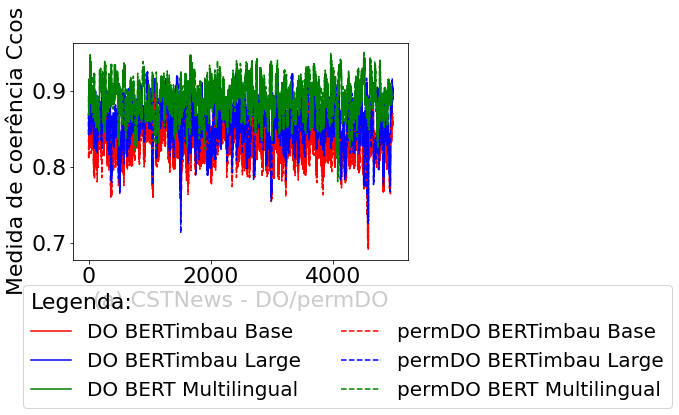

In [ ]:
graficoLinhaMedida('Medida de coerência Ccos', 
                   lista_Ccosc4oBERTimbaub, 
                   lista_Ccosc4pBERTimbaub,
                   lista_Ccosc4oBERTimbaul, 
                   lista_Ccosc4pBERTimbaul,
                   lista_Ccosc4oBERTm, 
                   lista_Ccosc4pBERTm)

In [ ]:
print("Diferença entre as medidas BERT Base       :", getSomatorioDiferencaAbsoluta(lista_Ccosc4oBERTimbaub, lista_Ccosc4pBERTimbaub))
print("Diferença entre as medidas BERT Large      :", getSomatorioDiferencaAbsoluta(lista_Ccosc4oBERTimbaul, lista_Ccosc4pBERTimbaul))
print("Diferença entre as medidas BERT multilingue:", getSomatorioDiferencaAbsoluta(lista_Ccosc4oBERTm, lista_Ccosc4pBERTm))

Diferença entre as medidas BERT Base       : 69.29517974547682
Diferença entre as medidas BERT Large      : 67.58426167698691
Diferença entre as medidas BERT multilingue: 52.95165527970359


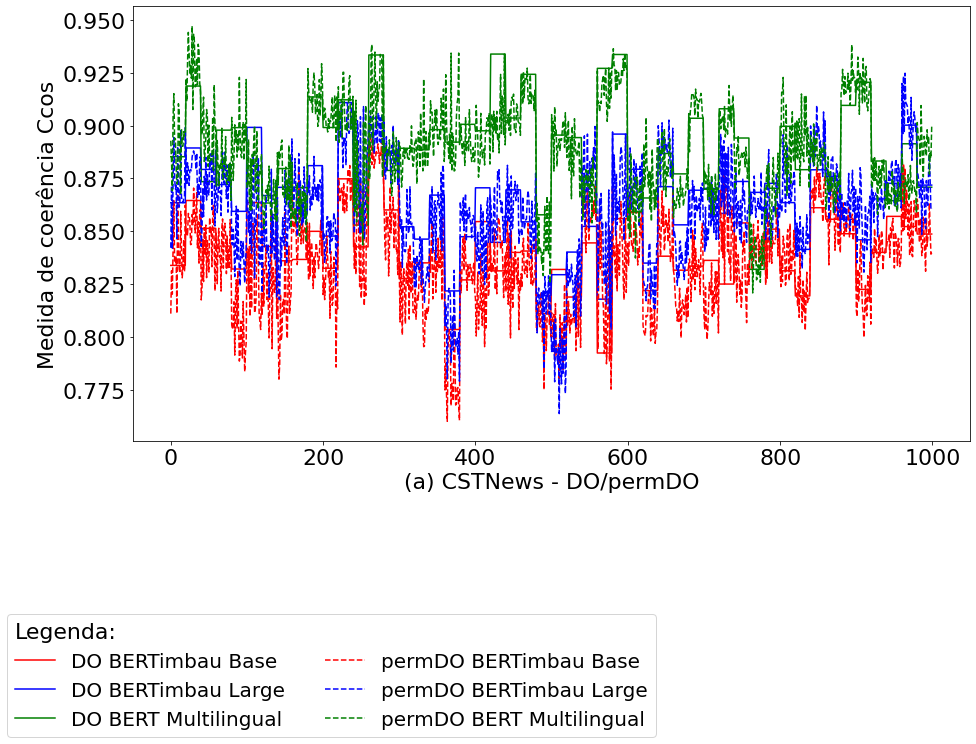

In [ ]:
graficoLinhaMedida('Medida de coerência Ccos', 
                  lista_Ccosc4oBERTimbaub[0:1000], 
                   lista_Ccosc4pBERTimbaub[0:1000],
                   lista_Ccosc4oBERTimbaul[0:1000], 
                   lista_Ccosc4pBERTimbaul[0:1000],
                   lista_Ccosc4oBERTm[0:1000], 
                   lista_Ccosc4pBERTm[0:1000])

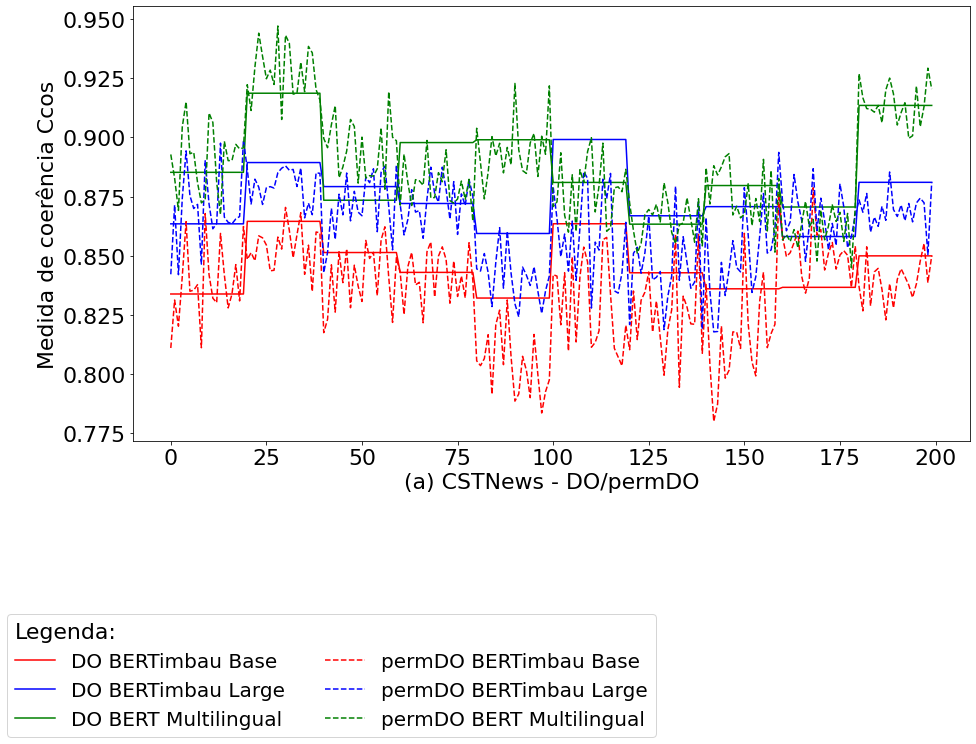

In [ ]:
graficoLinhaMedida('Medida de coerência Ccos', 
                  lista_Ccosc4oBERTimbaub[0:200], 
                   lista_Ccosc4pBERTimbaub[0:200],
                   lista_Ccosc4oBERTimbaul[0:200], 
                   lista_Ccosc4pBERTimbaul[0:200],
                   lista_Ccosc4oBERTm[0:200], 
                   lista_Ccosc4pBERTm[0:200])

In [ ]:
print("Diferença entre as medidas BERT Base       :", getSomatorioDiferencaAbsoluta(lista_Ccosc4oBERTimbaub[0:200], lista_Ccosc4pBERTimbaub[0:200]))
print("Diferença entre as medidas BERT Large      :", getSomatorioDiferencaAbsoluta(lista_Ccosc4oBERTimbaul[0:200], lista_Ccosc4pBERTimbaul[0:200]))
print("Diferença entre as medidas BERT multilingue:", getSomatorioDiferencaAbsoluta(lista_Ccosc4oBERTm[0:200], lista_Ccosc4pBERTm[0:200]))

Diferença entre as medidas BERT Base       : 3.5915644586086253
Diferença entre as medidas BERT Large      : 3.399413791298863
Diferença entre as medidas BERT multilingue: 2.3536183019479138


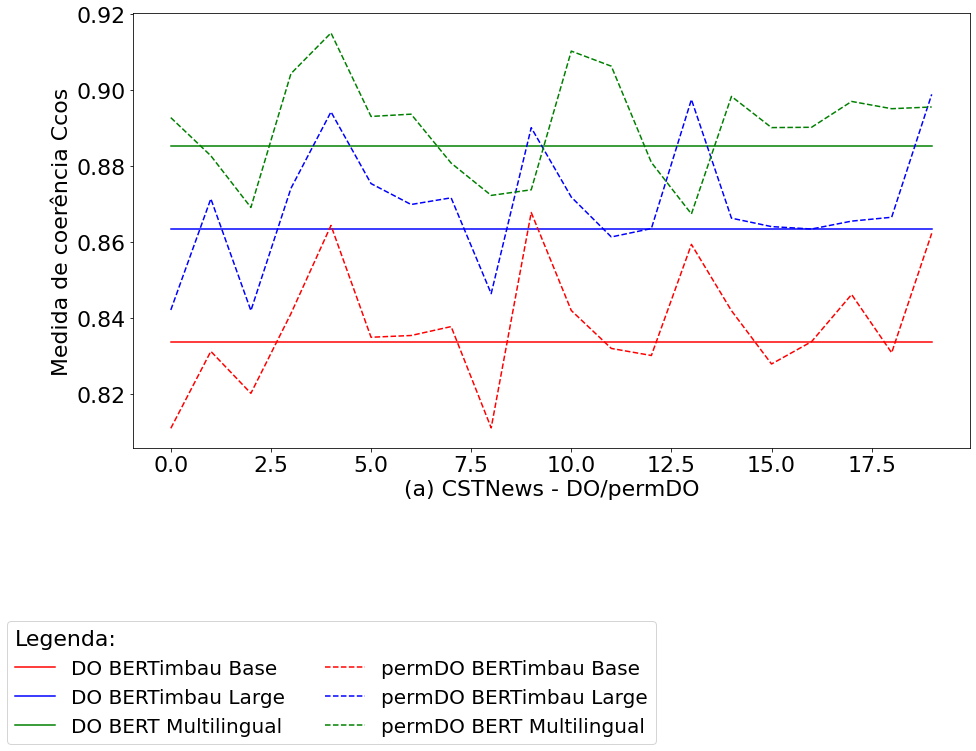

In [ ]:
graficoLinhaMedida('Medida de coerência Ccos', 
                  lista_Ccosc4oBERTimbaub[0:20], 
                   lista_Ccosc4pBERTimbaub[0:20],
                   lista_Ccosc4oBERTimbaul[0:20], 
                   lista_Ccosc4pBERTimbaul[0:20],
                   lista_Ccosc4oBERTm[0:20], 
                   lista_Ccosc4pBERTm[0:20])

In [ ]:
print("Diferença entre as medidas BERT Base       :", getSomatorioDiferencaAbsoluta(lista_Ccosc4oBERTimbaub[0:20], lista_Ccosc4pBERTimbaub[0:20]))
print("Diferença entre as medidas BERT Large      :", getSomatorioDiferencaAbsoluta(lista_Ccosc4oBERTimbaul[0:20], lista_Ccosc4pBERTimbaul[0:20]))
print("Diferença entre as medidas BERT multilingue:", getSomatorioDiferencaAbsoluta(lista_Ccosc4oBERTm[0:20], lista_Ccosc4pBERTm[0:20]))

Diferença entre as medidas BERT Base       : 0.2376698652903233
Diferença entre as medidas BERT Large      : 0.251644333203633
Diferença entre as medidas BERT multilingue: 0.24378586808840363


#### Gráfico de barra da medida de coerência Ccos dos documentos originais e suas permutações aleatórias do conjunto de dados CSTNews utilizando os MCLs.

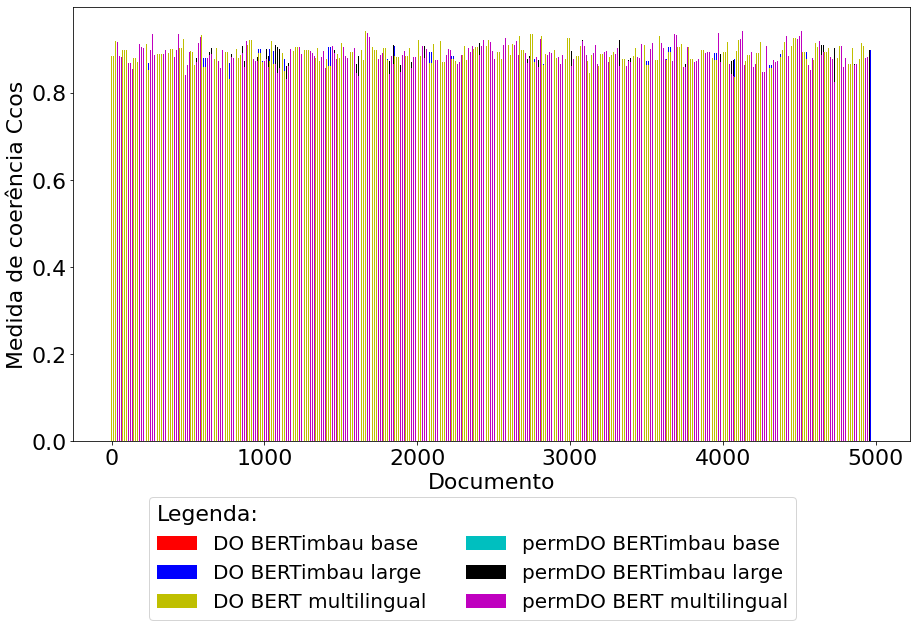

In [ ]:
graficoBarraMedida('Medida de coerência Ccos', 
                  lista_Ccosc4oBERTimbaub, 
                   lista_Ccosc4pBERTimbaub,
                   lista_Ccosc4oBERTimbaul, 
                   lista_Ccosc4pBERTimbaul,
                   lista_Ccosc4oBERTm, 
                   lista_Ccosc4pBERTm)

#### Gráfico de linha da medida de coerência Ccos ordenada crescentemente dos documentos originais e suas permutações aleatórias do conjunto de dados CSTNews utilizando os MCLs.

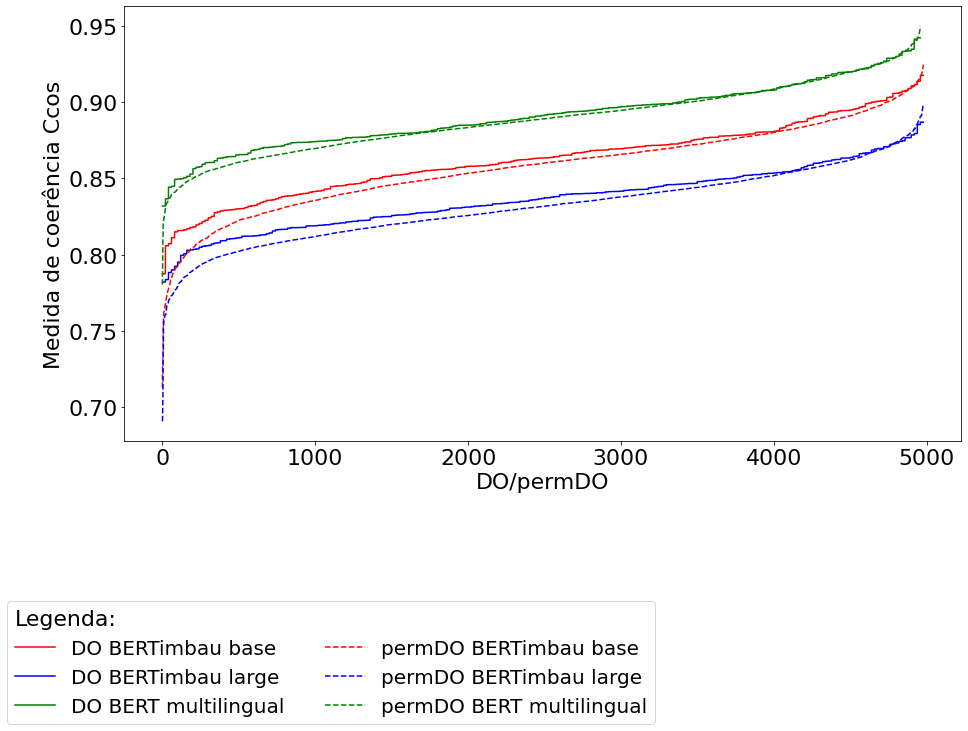

In [ ]:
graficoLinhaMedidaOrdenada('Medida de coerência Ccos', 
                 
                   lista_Ccosc4oBERTimbaul, 
                   lista_Ccosc4pBERTimbaul,
                   
                   lista_Ccosc4oBERTimbaub, 
                   lista_Ccosc4pBERTimbaub,
                 
                   lista_Ccosc4oBERTm, 
                   lista_Ccosc4pBERTm)

In [ ]:
print("Diferença entre as medidas ordenadas BERT Base       :", getSomatorioDiferencaAbsolutaOrdenada(lista_Ccosc4oBERTimbaub, lista_Ccosc4pBERTimbaub))
print("Diferença entre as medidas ordenadas BERT Large      :", getSomatorioDiferencaAbsolutaOrdenada(lista_Ccosc4oBERTimbaul, lista_Ccosc4pBERTimbaul))
print("Diferença entre as medidas ordenadas BERT multilingue:", getSomatorioDiferencaAbsolutaOrdenada(lista_Ccosc4oBERTm, lista_Ccosc4pBERTm))

Diferença entre as medidas ordenadas BERT Base       : 26.172523348556137
Diferença entre as medidas ordenadas BERT Large      : 26.25488290483987
Diferença entre as medidas ordenadas BERT multilingue: 11.245349818669718


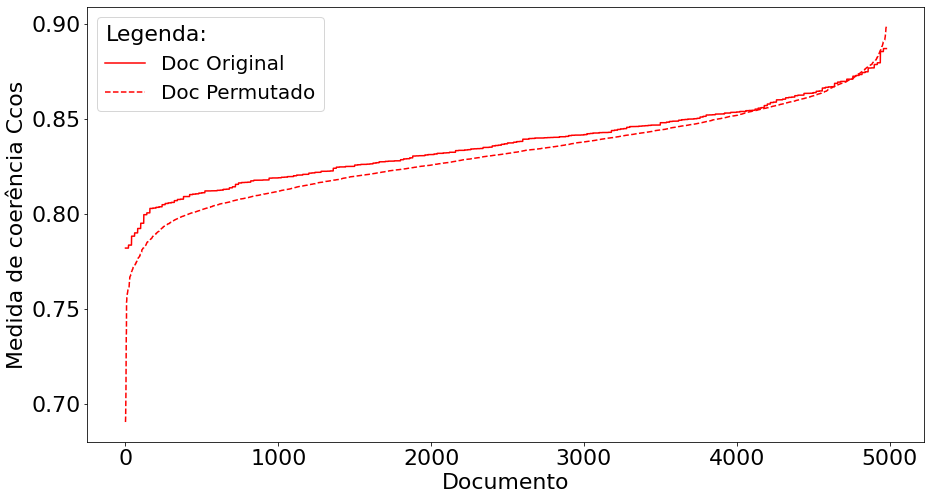

In [ ]:
graficoLinhaMedidaOrdenada2('Medida de coerência Ccos', 
                   lista_Ccosc4oBERTimbaub, 
                   lista_Ccosc4pBERTimbaub,
                   'r')

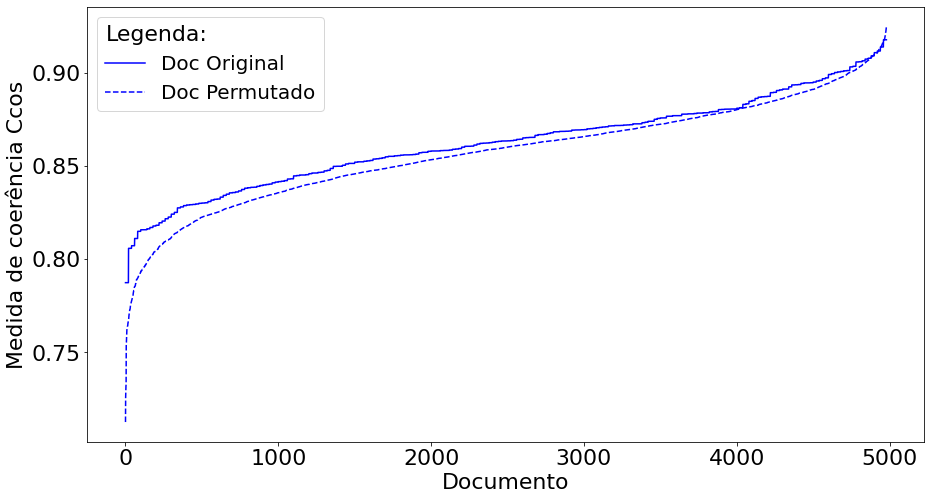

In [ ]:
graficoLinhaMedidaOrdenada2('Medida de coerência Ccos', 
                   lista_Ccosc4oBERTimbaul, 
                   lista_Ccosc4pBERTimbaul,
                   'b')

#### Gráfico de barra da medida de coerência Ccos ordenada crescentemente dos documentos originais e suas permutações aleatórias do conjunto de dados CSTNews utilizando os MCLs.

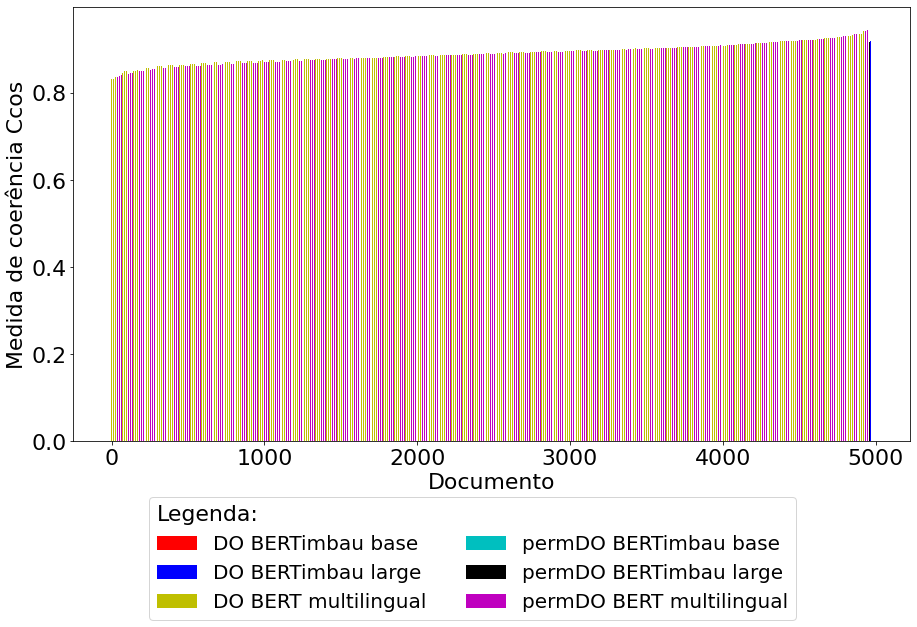

In [ ]:
graficoBarraMedidaOrdenada('Medida de coerência Ccos', 
                  lista_Ccosc4oBERTimbaub, 
                  lista_Ccosc4pBERTimbaub,
                  lista_Ccosc4oBERTimbaul, 
                  lista_Ccosc4pBERTimbaul,
                  lista_Ccosc4oBERTm, 
                  lista_Ccosc4pBERTm)

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


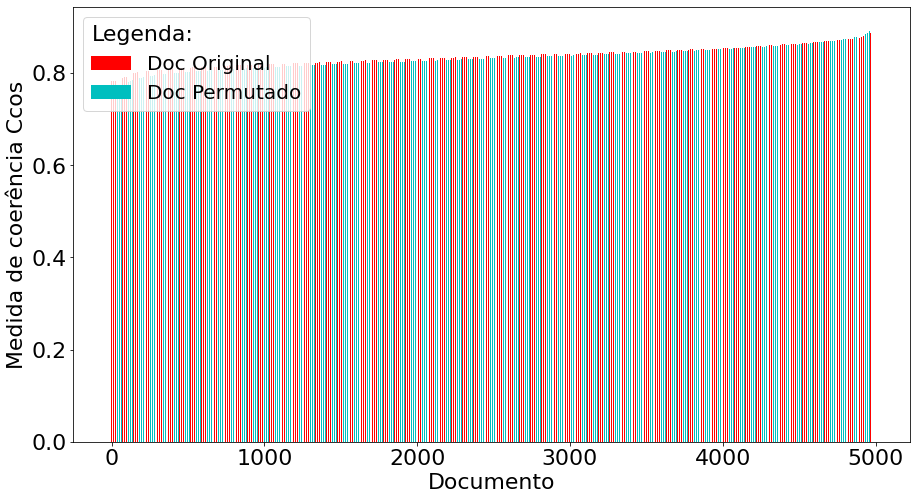

In [ ]:
graficoBarraMedidaOrdenada2('Medida de coerência Ccos', 
                  lista_Ccosc4oBERTimbaub, 
                  lista_Ccosc4pBERTimbaub)

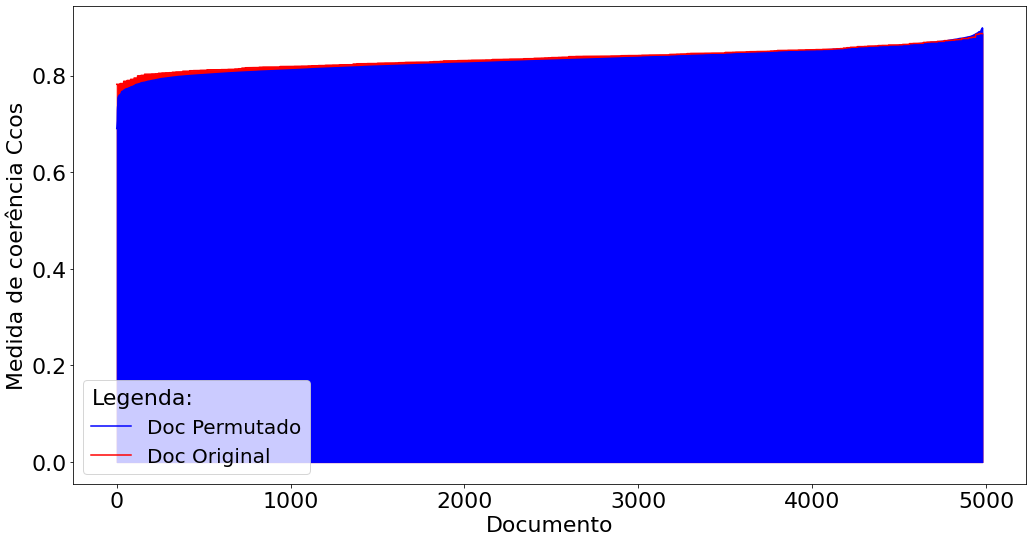

In [ ]:
graficoLinhaMedidaSimilaridadeOrdenada2Preenchido('Medida de coerência Ccos', 
                  lista_Ccosc4oBERTimbaub, 
                  lista_Ccosc4pBERTimbaub)

## 2.4 Avaliando a medida de incoerência Ceuc com a medida de distância euclidiana(euc)

### Estatística

#### Base

In [ ]:
acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado = acertosMedidaDistanciaOriginal(dfListaParesDocumentosMedidasBERTimbaub,'ceuc')
print(">>> Contando a coerência do original")
print('Acertos Original :', acertosOriginal, 'de', len(dfListaParesDocumentosMedidasBERTimbaub))
print('Percentual de documentos coerentes em relação ao total:', resultadoOriginal*100)

print('Acertos Permutado :', acertosPermutado, 'de', len(dfListaParesDocumentosMedidasBERTimbaub))
print('Percentual de documentos incoerentes em relação ao total:', resultadoPermutado*100)

>>> Contando a coerência do original
Acertos Original : 3196 de 4980
Percentual de documentos coerentes em relação ao total: 64.17670682730923
Acertos Permutado : 1784 de 4980
Percentual de documentos incoerentes em relação ao total: 35.82329317269076


#### Large

In [ ]:
acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado = acertosMedidaDistanciaOriginal(dfListaParesDocumentosMedidasBERTimbaul,'ceuc')
print(">>> Contando a coerência do original")
print('Acertos Original :', acertosOriginal, 'de', len(dfListaParesDocumentosMedidasBERTimbaul))
print('Percentual de documentos coerentes em relação ao total:', resultadoOriginal*100)

print('Acertos Permutado :', acertosPermutado, 'de', len(dfListaParesDocumentosMedidasBERTimbaul))
print('Percentual de documentos incoerentes em relação ao total:', resultadoPermutado*100)

>>> Contando a coerência do original
Acertos Original : 3132 de 4980
Percentual de documentos coerentes em relação ao total: 62.89156626506024
Acertos Permutado : 1848 de 4980
Percentual de documentos incoerentes em relação ao total: 37.10843373493976


#### Multilingue

In [ ]:
acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado = acertosMedidaDistanciaOriginal(dfListaParesDocumentosMedidasBERTm,'ceuc')
print(">>> Contando a coerência do original")
print('Acertos Original :', acertosOriginal, 'de', len(dfListaParesDocumentosMedidasBERTm))
print('Percentual de documentos coerentes em relação ao total:', resultadoOriginal*100)

print('Acertos Permutado :', acertosPermutado, 'de', len(dfListaParesDocumentosMedidasBERTm))
print('Percentual de documentos incoerentes em relação ao total:', resultadoPermutado*100)

>>> Contando a coerência do original
Acertos Original : 2891 de 4960
Percentual de documentos coerentes em relação ao total: 58.28629032258065
Acertos Permutado : 2069 de 4960
Percentual de documentos incoerentes em relação ao total: 41.71370967741935


### Gráficos

#### Gráfico de linha da medida de incoerência Ceuc dos documentos originais e suas permutações aleatórias do conjunto de dados CSTNews utilizando os MCLs.

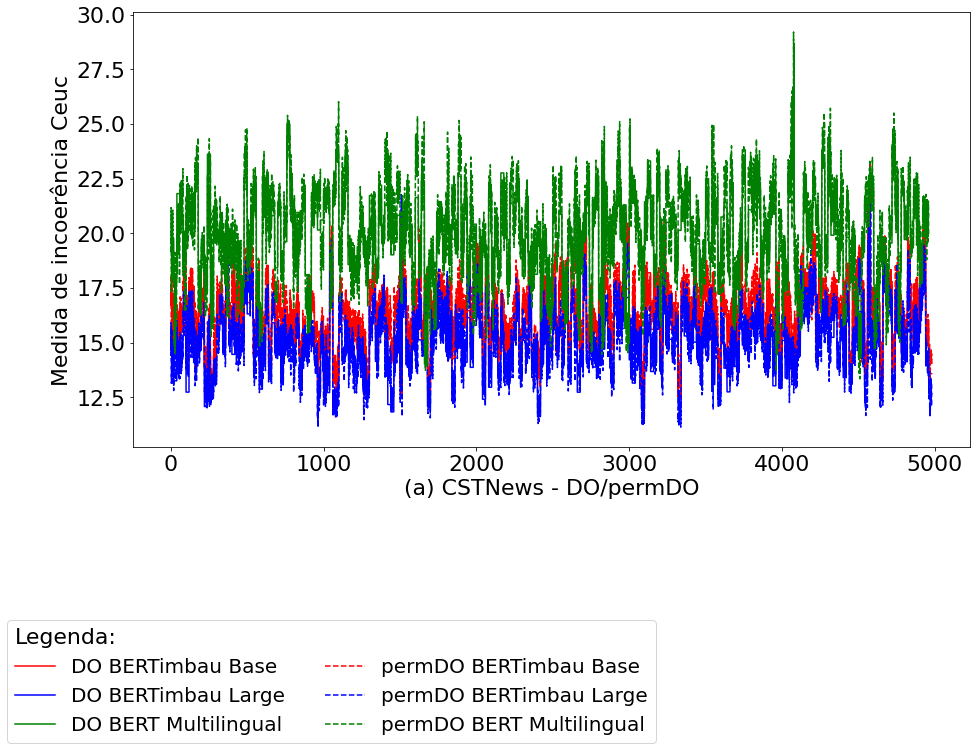

In [ ]:
graficoLinhaMedida('Medida de incoerência Ceuc', 
                   lista_Ceucc4oBERTimbaub, 
                   lista_Ceucc4pBERTimbaub,
                   lista_Ceucc4oBERTimbaul, 
                   lista_Ceucc4pBERTimbaul,
                   lista_Ceucc4oBERTm, 
                   lista_Ceucc4pBERTm)

In [ ]:
print("Diferença entre as medidas BERT Base       :", getSomatorioDiferencaAbsoluta(lista_Ceucc4oBERTimbaub, lista_Ceucc4pBERTimbaub))
print("Diferença entre as medidas BERT Large      :", getSomatorioDiferencaAbsoluta(lista_Ceucc4oBERTimbaul, lista_Ceucc4pBERTimbaul))
print("Diferença entre as medidas BERT multilingue:", getSomatorioDiferencaAbsoluta(lista_Ceucc4oBERTm, lista_Ceucc4pBERTm))

Diferença entre as medidas BERT Base       : 3555.4669433408285
Diferença entre as medidas BERT Large      : 3738.5020729037283
Diferença entre as medidas BERT multilingue: 4762.962852410318


##### Subconjunto de 1000

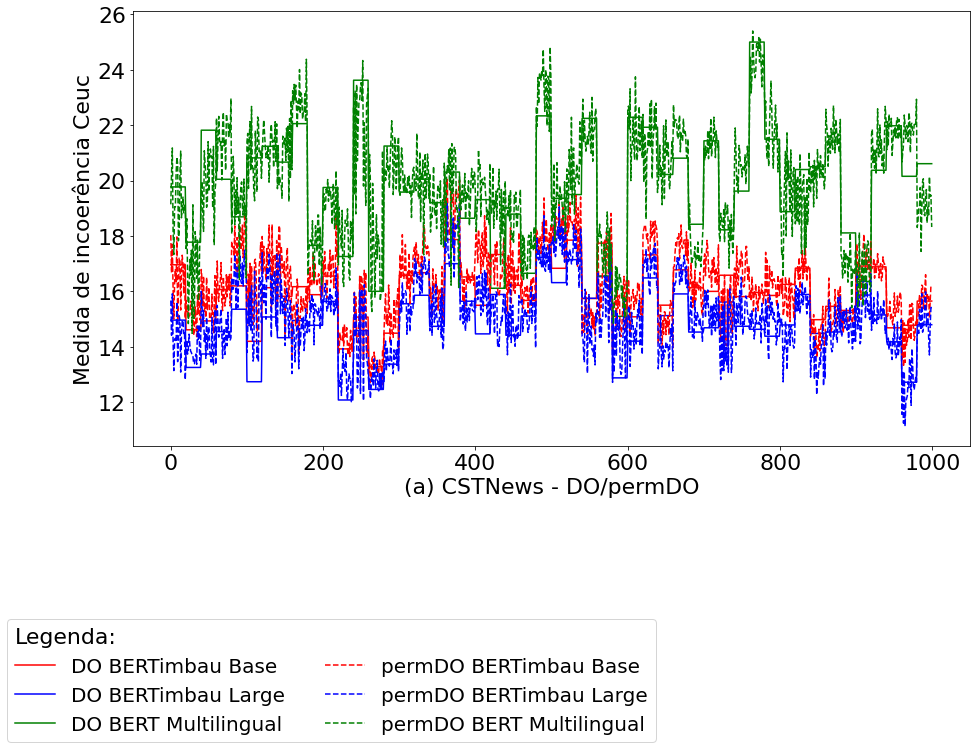

In [ ]:
graficoLinhaMedida('Medida de incoerência Ceuc', 
                  lista_Ceucc4oBERTimbaub[0:1000], 
                   lista_Ceucc4pBERTimbaub[0:1000],
                   lista_Ceucc4oBERTimbaul[0:1000], 
                   lista_Ceucc4pBERTimbaul[0:1000],
                   lista_Ceucc4oBERTm[0:1000], 
                   lista_Ceucc4pBERTm[0:1000])

##### Subconjunto de 200

In [ ]:
import matplotlib

TAMANHO_FONTE = 38
matplotlib.rc('font', size=TAMANHO_FONTE)          # Controla o tamanho do do texto default
matplotlib.rc('axes', titlesize=TAMANHO_FONTE)     # Tamanho da fonte do eixo do título
matplotlib.rc('axes', labelsize=TAMANHO_FONTE)     # Tamanho da fonte dos rótulos do eixo x e y
matplotlib.rc('xtick', labelsize=TAMANHO_FONTE)    # Tamanho da fonte das marcações do eixo y
matplotlib.rc('ytick', labelsize=TAMANHO_FONTE)    # Tamanho da fonte dos marcações do eixo x
matplotlib.rc('legend', fontsize=TAMANHO_FONTE-8) # Tamanho da fonte da legenda
matplotlib.rc('figure', titlesize=TAMANHO_FONTE)   # Tamanho da fonte do título da figura

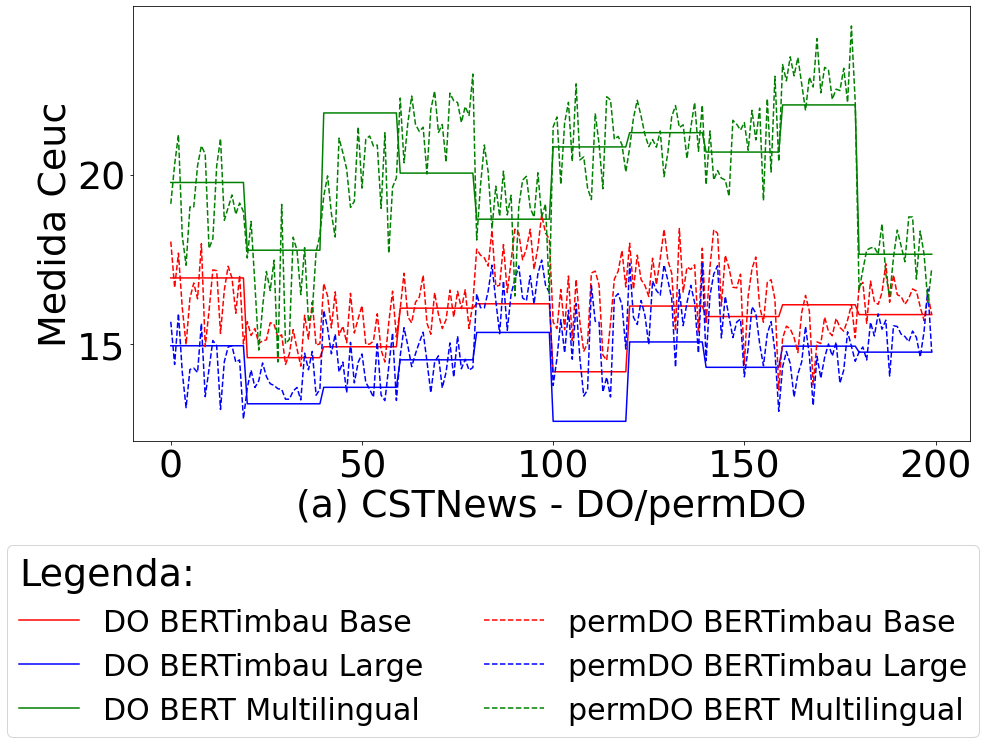

In [ ]:
graficoLinhaMedida('Medida Ceuc', 
                  lista_Ceucc4oBERTimbaub[0:200], 
                   lista_Ceucc4pBERTimbaub[0:200],
                   lista_Ceucc4oBERTimbaul[0:200], 
                   lista_Ceucc4pBERTimbaul[0:200],
                   lista_Ceucc4oBERTm[0:200], 
                   lista_Ceucc4pBERTm[0:200])

In [ ]:
print("Diferença entre as medidas BERT Base       :", getSomatorioDiferencaAbsoluta(lista_Ceucc4oBERTimbaub[0:200], lista_Ceucc4pBERTimbaub[0:200]))
print("Diferença entre as medidas BERT Large      :", getSomatorioDiferencaAbsoluta(lista_Ceucc4oBERTimbaul[0:200], lista_Ceucc4pBERTimbaul[0:200]))
print("Diferença entre as medidas BERT multilingue:", getSomatorioDiferencaAbsoluta(lista_Ceucc4oBERTm[0:200], lista_Ceucc4pBERTm[0:200]))

Diferença entre as medidas BERT Base       : 195.4358319520949
Diferença entre as medidas BERT Large      : 195.0133492390316
Diferença entre as medidas BERT multilingue: 206.77478329340636


In [ ]:
acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado = acertosMedidaDistanciaOriginal(dfListaParesDocumentosMedidasBERTimbaub[0:200],'ceuc')
print(">>> Contando a coerência do original")
print('Acertos Original :', acertosOriginal, 'de', len(dfListaParesDocumentosMedidasBERTimbaub[0:200]))
print('Percentual de documentos coerentes em relação ao total:', resultadoOriginal*100)

print('Acertos Permutado :', acertosPermutado, 'de', len(dfListaParesDocumentosMedidasBERTimbaub[0:200]))
print('Percentual de documentos incoerentes em relação ao total:', resultadoPermutado*100)

>>> Contando a coerência do original
Acertos Original : 147 de 200
Percentual de documentos coerentes em relação ao total: 73.5
Acertos Permutado : 53 de 200
Percentual de documentos incoerentes em relação ao total: 26.5


In [ ]:
acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado = acertosMedidaDistanciaPermutado(dfListaParesDocumentosMedidasBERTimbaub[0:200],'ceuc')
print(">>> Contando a incoerência do permutado")
print('Acertos Original :', acertosOriginal, 'de', len(dfListaParesDocumentosMedidasBERTimbaub[0:200]))
print('Percentual de documentos permutados em relação ao total:', resultadoOriginal*100)

print('Acertos Permutado :', acertosPermutado, 'de', len(dfListaParesDocumentosMedidasBERTimbaub[0:200]))
print('Percentual de documentos incoerentes em relação ao total:', resultadoPermutado*100)

>>> Contando a incoerência do permutado
Acertos Original : 56 de 200
Percentual de documentos permutados em relação ao total: 28.000000000000004
Acertos Permutado : 144 de 200
Percentual de documentos incoerentes em relação ao total: 72.0


In [ ]:
acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado = acertosMedidaDistanciaOriginal(dfListaParesDocumentosMedidasBERTimbaul[0:200],'ceuc')
print(">>> Contando a coerência do original")
print('Acertos Original :', acertosOriginal, 'de', len(dfListaParesDocumentosMedidasBERTimbaul[0:200]))
print('Percentual de documentos coerentes em relação ao total:', resultadoOriginal*100)

print('Acertos Permutado :', acertosPermutado, 'de', len(dfListaParesDocumentosMedidasBERTimbaul[0:200]))
print('Percentual de documentos incoerentes em relação ao total:', resultadoPermutado*100)

>>> Contando a coerência do original
Acertos Original : 146 de 200
Percentual de documentos coerentes em relação ao total: 73.0
Acertos Permutado : 54 de 200
Percentual de documentos incoerentes em relação ao total: 27.0


In [ ]:
acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado = acertosMedidaDistanciaPermutado(dfListaParesDocumentosMedidasBERTimbaul[0:200],'ceuc')
print(">>> Contando a incoerência do permutado")
print('Acertos Original :', acertosOriginal, 'de', len(dfListaParesDocumentosMedidasBERTimbaul[0:200]))
print('Percentual de documentos coerentes em relação ao total:', resultadoOriginal*100)

print('Acertos Permutado :', acertosPermutado, 'de', len(dfListaParesDocumentosMedidasBERTimbaul[0:200]))
print('Percentual de documentos incoerentes em relação ao total:', resultadoPermutado*100)

>>> Contando a incoerência do permutado
Acertos Original : 57 de 200
Percentual de documentos coerentes em relação ao total: 28.499999999999996
Acertos Permutado : 143 de 200
Percentual de documentos incoerentes em relação ao total: 71.5


In [ ]:
acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado = acertosMedidaDistanciaOriginal(dfListaParesDocumentosMedidasBERTm[0:200],'ceuc')
print(">>> Contando a coerência do original")
print('Acertos Original :', acertosOriginal, 'de', len(dfListaParesDocumentosMedidasBERTm[0:200]))
print('Percentual de documentos coerentes em relação ao total:', resultadoOriginal*100)

print('Acertos Permutado :', acertosPermutado, 'de', len(dfListaParesDocumentosMedidasBERTm[0:200]))
print('Percentual de documentos incoerentes em relação ao total:', resultadoPermutado*100)

>>> Contando a coerência do original
Acertos Original : 112 de 200
Percentual de documentos coerentes em relação ao total: 56.00000000000001
Acertos Permutado : 88 de 200
Percentual de documentos incoerentes em relação ao total: 44.0


In [ ]:
acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado = acertosMedidaDistanciaPermutado(dfListaParesDocumentosMedidasBERTm[0:200],'ceuc')
print(">>> Contando a incoerência do permutado")
print('Acertos Original :', acertosOriginal, 'de', len(dfListaParesDocumentosMedidasBERTm[0:200]))
print('Percentual de documentos coerentes em relação ao total:', resultadoOriginal*100)

print('Acertos Permutado :', acertosPermutado, 'de', len(dfListaParesDocumentosMedidasBERTm[0:200]))
print('Percentual de documentos incoerentes em relação ao total:', resultadoPermutado*100)

>>> Contando a incoerência do permutado
Acertos Original : 90 de 200
Percentual de documentos coerentes em relação ao total: 45.0
Acertos Permutado : 110 de 200
Percentual de documentos incoerentes em relação ao total: 55.00000000000001


##### Subconjunto de 20-1

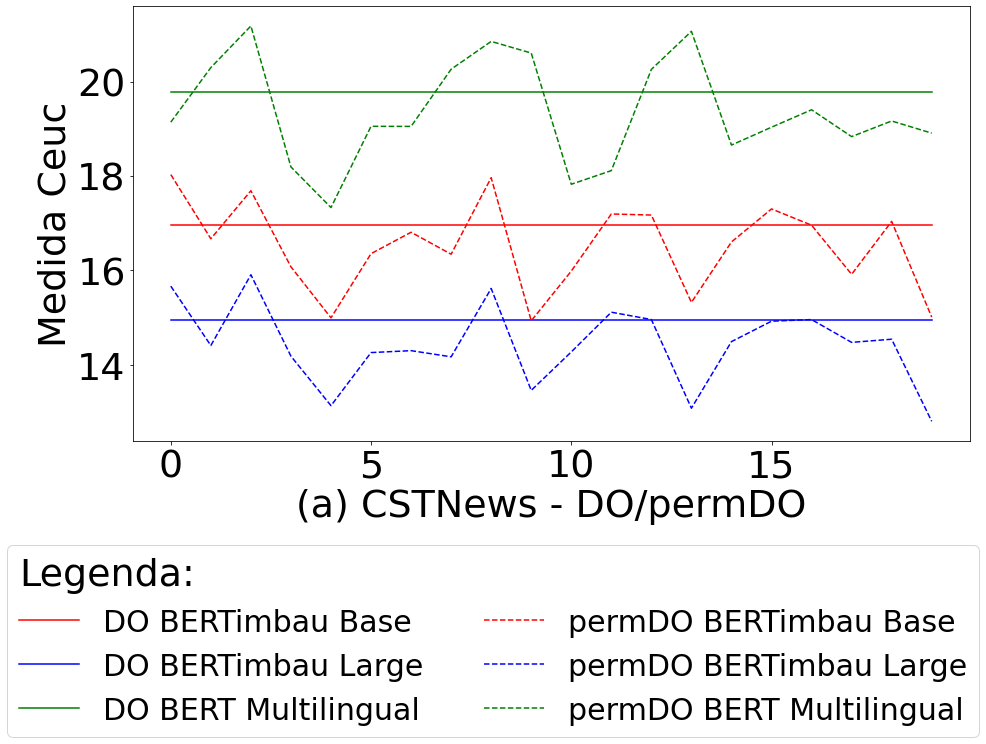

In [ ]:
graficoLinhaMedida('Medida Ceuc', 
                  lista_Ceucc4oBERTimbaub[0:20], 
                   lista_Ceucc4pBERTimbaub[0:20],
                   lista_Ceucc4oBERTimbaul[0:20], 
                   lista_Ceucc4pBERTimbaul[0:20],
                   lista_Ceucc4oBERTm[0:20], 
                   lista_Ceucc4pBERTm[0:20])

In [ ]:
print("Diferença entre as medidas BERT Base       :", getSomatorioDiferencaAbsoluta(lista_Ceucc4oBERTimbaub[0:20], lista_Ceucc4pBERTimbaub[0:20]))
print("Diferença entre as medidas BERT Large      :", getSomatorioDiferencaAbsoluta(lista_Ceucc4oBERTimbaul[0:20], lista_Ceucc4pBERTimbaul[0:20]))
print("Diferença entre as medidas BERT multilingue:", getSomatorioDiferencaAbsoluta(lista_Ceucc4oBERTm[0:20], lista_Ceucc4pBERTm[0:20]))

Diferença entre as medidas BERT Base       : 16.152139027913403
Diferença entre as medidas BERT Large      : 15.382375081380218
Diferença entre as medidas BERT multilingue: 20.423256715138756


In [ ]:
acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado = acertosMedidaDistanciaOriginal(dfListaParesDocumentosMedidasBERTimbaub[0:20],'ceuc')

print('Acertos Original :', acertosOriginal, 'de', len(dfListaParesDocumentosMedidasBERTimbaub[0:20]))
print('Percentual de documentos coerentes em relação ao total:', resultadoOriginal*100)

print('Acertos Permutado :', acertosPermutado, 'de', len(dfListaParesDocumentosMedidasBERTimbaub[0:20]))
print('Percentual de documentos incoerentes em relação ao total:', resultadoPermutado*100)


Acertos Original : 8 de 20
Percentual de documentos coerentes em relação ao total: 40.0
Acertos Permutado : 12 de 20
Percentual de documentos incoerentes em relação ao total: 60.0


In [ ]:
acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado = acertosMedidaDistanciaOriginal(dfListaParesDocumentosMedidasBERTimbaul[0:20],'ceuc')

print('Acertos Original :', acertosOriginal, 'de', len(dfListaParesDocumentosMedidasBERTimbaul[0:20]))
print('Percentual de documentos coerentes em relação ao total:', resultadoOriginal*100)

print('Acertos Permutado :', acertosPermutado, 'de', len(dfListaParesDocumentosMedidasBERTimbaul[0:20]))
print('Percentual de documentos incoerentes em relação ao total:', resultadoPermutado*100)


Acertos Original : 6 de 20
Percentual de documentos coerentes em relação ao total: 30.0
Acertos Permutado : 14 de 20
Percentual de documentos incoerentes em relação ao total: 70.0


In [ ]:
acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado = acertosMedidaDistanciaOriginal(dfListaParesDocumentosMedidasBERTm[0:20],'ceuc')

print('Acertos Original :', acertosOriginal, 'de', len(dfListaParesDocumentosMedidasBERTm[0:20]))
print('Percentual de documentos coerentes em relação ao total:', resultadoOriginal*100)

print('Acertos Permutado :', acertosPermutado, 'de', len(dfListaParesDocumentosMedidasBERTm[0:20]))
print('Percentual de documentos incoerentes em relação ao total:', resultadoPermutado*100)


Acertos Original : 7 de 20
Percentual de documentos coerentes em relação ao total: 35.0
Acertos Permutado : 13 de 20
Percentual de documentos incoerentes em relação ao total: 65.0


##### Subconjunto de 20-2

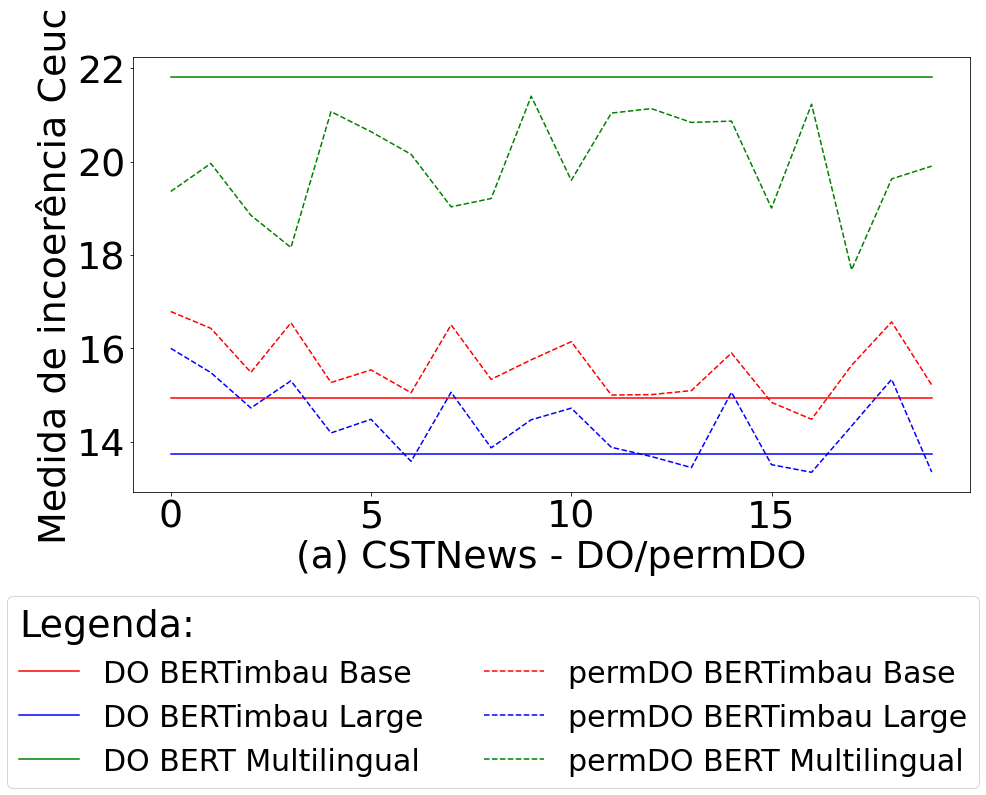

In [ ]:
graficoLinhaMedida('Medida de incoerência Ceuc', 
                  lista_Ceucc4oBERTimbaub[40:60], 
                   lista_Ceucc4pBERTimbaub[40:60],
                   lista_Ceucc4oBERTimbaul[40:60], 
                   lista_Ceucc4pBERTimbaul[40:60],
                   lista_Ceucc4oBERTm[40:60], 
                   lista_Ceucc4pBERTm[40:60])

In [ ]:
print("Diferença entre as medidas BERT Base       :", getSomatorioDiferencaAbsoluta(lista_Ceucc4oBERTimbaub[40:60], lista_Ceucc4pBERTimbaub[40:60]))
print("Diferença entre as medidas BERT Large      :", getSomatorioDiferencaAbsoluta(lista_Ceucc4oBERTimbaul[40:60], lista_Ceucc4pBERTimbaul[40:60]))
print("Diferença entre as medidas BERT multilingue:", getSomatorioDiferencaAbsoluta(lista_Ceucc4oBERTm[40:60], lista_Ceucc4pBERTm[20:40]))

Diferença entre as medidas BERT Base       : 15.059482415517136
Diferença entre as medidas BERT Large      : 16.110612392425537
Diferença entre as medidas BERT multilingue: 99.69407717386879


In [ ]:
acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado = acertosMedidaDistanciaOriginal(dfListaParesDocumentosMedidasBERTimbaub[40:60],'ceuc')

print('Acertos Original :', acertosOriginal, 'de', len(dfListaParesDocumentosMedidasBERTimbaub[40:60]))
print('Percentual de documentos coerentes em relação ao total:', resultadoOriginal*100)

print('Acertos Permutado :', acertosPermutado, 'de', len(dfListaParesDocumentosMedidasBERTimbaub[40:60]))
print('Percentual de documentos incoerentes em relação ao total:', resultadoPermutado*100)


Acertos Original : 18 de 20
Percentual de documentos coerentes em relação ao total: 90.0
Acertos Permutado : 2 de 20
Percentual de documentos incoerentes em relação ao total: 10.0


In [ ]:
acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado = acertosMedidaDistanciaOriginal(dfListaParesDocumentosMedidasBERTimbaul[40:60],'ceuc')

print('Acertos Original :', acertosOriginal, 'de', len(dfListaParesDocumentosMedidasBERTimbaul[40:60]))
print('Percentual de documentos coerentes em relação ao total:', resultadoOriginal*100)

print('Acertos Permutado :', acertosPermutado, 'de', len(dfListaParesDocumentosMedidasBERTimbaul[40:60]))
print('Percentual de documentos incoerentes em relação ao total:', resultadoPermutado*100)


Acertos Original : 14 de 20
Percentual de documentos coerentes em relação ao total: 70.0
Acertos Permutado : 6 de 20
Percentual de documentos incoerentes em relação ao total: 30.0


In [ ]:
acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado = acertosMedidaDistanciaOriginal(dfListaParesDocumentosMedidasBERTm[40:60],'ceuc')

print('Acertos Original :', acertosOriginal, 'de', len(dfListaParesDocumentosMedidasBERTm[40:60]))
print('Percentual de documentos coerentes em relação ao total:', resultadoOriginal*100)

print('Acertos Permutado :', acertosPermutado, 'de', len(dfListaParesDocumentosMedidasBERTm[40:60]))
print('Percentual de documentos incoerentes em relação ao total:', resultadoPermutado*100)

Acertos Original : 0 de 20
Percentual de documentos coerentes em relação ao total: 0.0
Acertos Permutado : 20 de 20
Percentual de documentos incoerentes em relação ao total: 100.0


#### Gráfico de barra da medida de incoerência Ceuc dos documentos originais e suas permutações aleatórias do conjunto de dados CSTNews utilizando os MCLs.

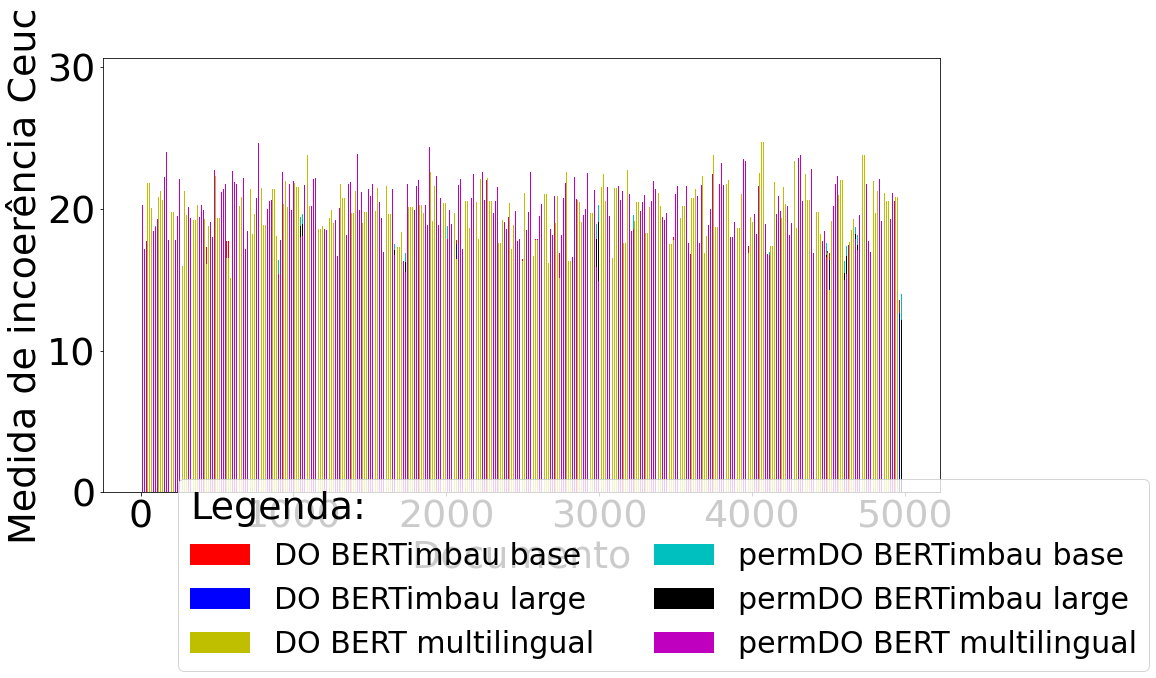

In [ ]:
graficoBarraMedida('Medida de incoerência Ceuc', 
                  lista_Ceucc4oBERTimbaub, 
                   lista_Ceucc4pBERTimbaub,
                   lista_Ceucc4oBERTimbaul, 
                   lista_Ceucc4pBERTimbaul,
                   lista_Ceucc4oBERTm, 
                   lista_Ceucc4pBERTm)

#### Gráfico de linha da medida de incoerência Ceuc "ordenada crescentemente" dos documentos originais e suas permutações aleatórias do conjunto de dados CSTNews utilizando os MCLs.

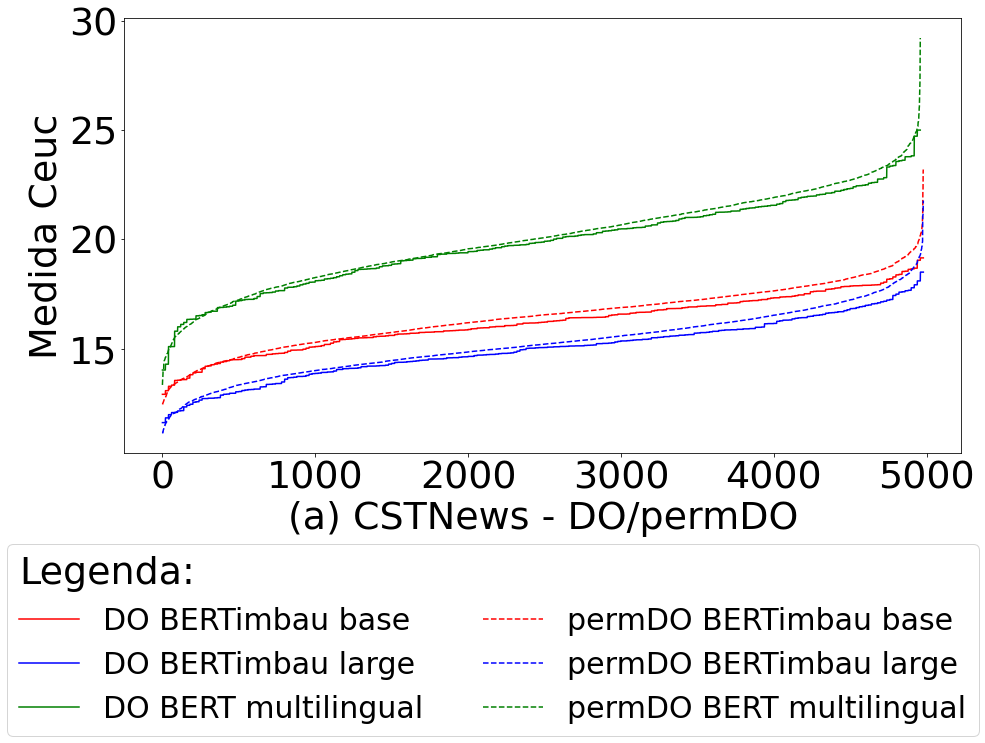

In [ ]:
graficoLinhaMedidaOrdenada('Medida Ceuc', 
                   lista_Ceucc4oBERTimbaub, 
                   lista_Ceucc4pBERTimbaub,
                   lista_Ceucc4oBERTimbaul, 
                   lista_Ceucc4pBERTimbaul,
                   lista_Ceucc4oBERTm, 
                   lista_Ceucc4pBERTm)

In [ ]:
print("Diferença entre as medidas ordenada BERT Base       :", getSomatorioDiferencaAbsolutaOrdenada(lista_Ceucc4oBERTimbaub, lista_Ceucc4pBERTimbaub))
print("Diferença entre as medidas ordenada BERT Large      :", getSomatorioDiferencaAbsolutaOrdenada(lista_Ceucc4oBERTimbaul, lista_Ceucc4pBERTimbaul))
print("Diferença entre as medidas ordenada BERT multilingue:", getSomatorioDiferencaAbsolutaOrdenada(lista_Ceucc4oBERTm, lista_Ceucc4pBERTm))

Diferença entre as medidas ordenada BERT Base       : 1407.6839873128906
Diferença entre as medidas ordenada BERT Large      : 1387.7562291358036
Diferença entre as medidas ordenada BERT multilingue: 1053.9913301360507


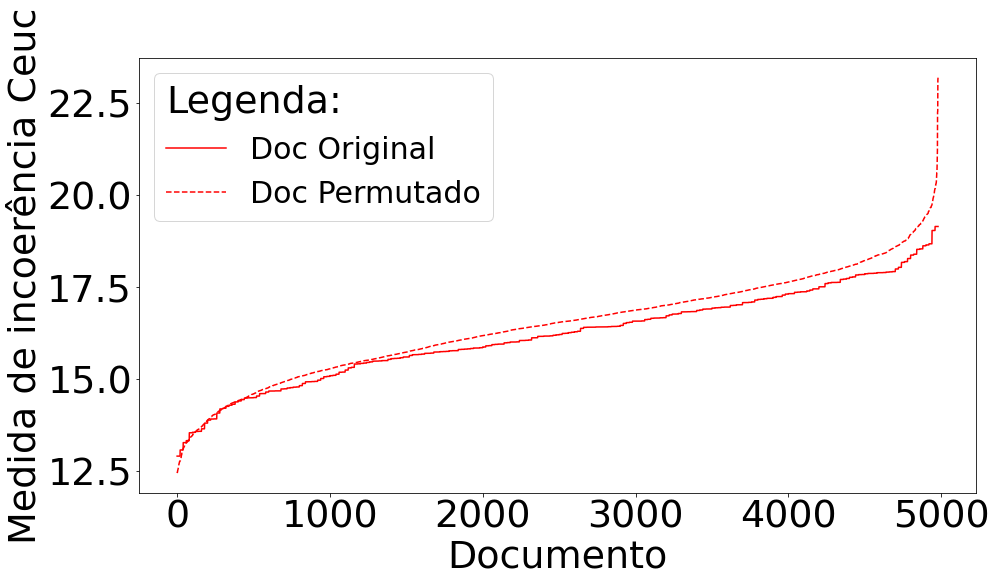

In [ ]:
graficoLinhaMedidaOrdenada2('Medida de incoerência Ceuc', 
                   lista_Ceucc4oBERTimbaub, 
                   lista_Ceucc4pBERTimbaub)

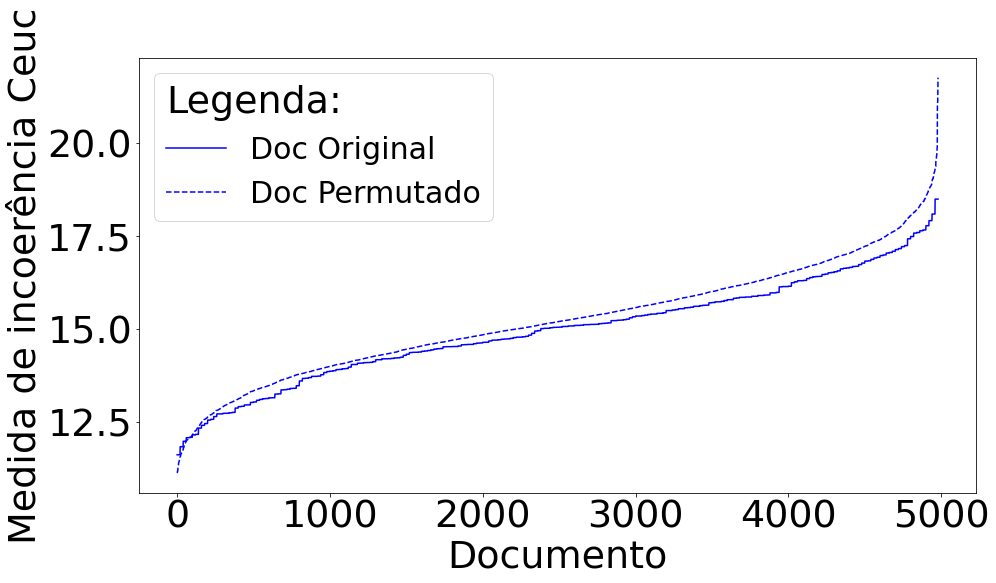

In [ ]:
graficoLinhaMedidaOrdenada2('Medida de incoerência Ceuc', 
                   lista_Ceucc4oBERTimbaul, 
                   lista_Ceucc4pBERTimbaul,
                   'b')

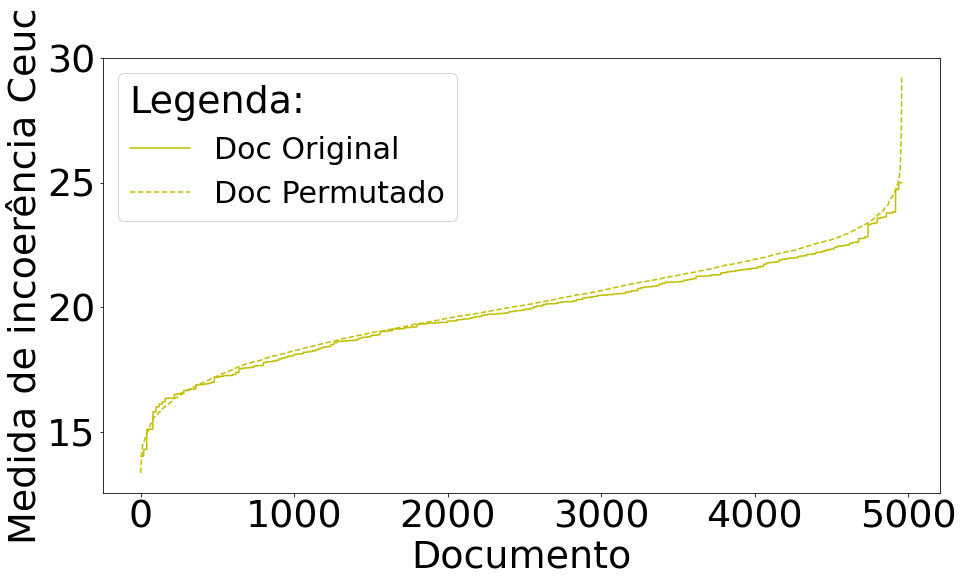

In [ ]:
graficoLinhaMedidaOrdenada2('Medida de incoerência Ceuc', 
                   lista_Ceucc4oBERTm, 
                   lista_Ceucc4pBERTm,
                   'y')

#### Gráfico de barra da medida de incoerência Ceuc "ordenada crescentemente" dos documentos originais e suas permutações aleatórias do conjunto de dados CSTNews utilizando os MCLs.

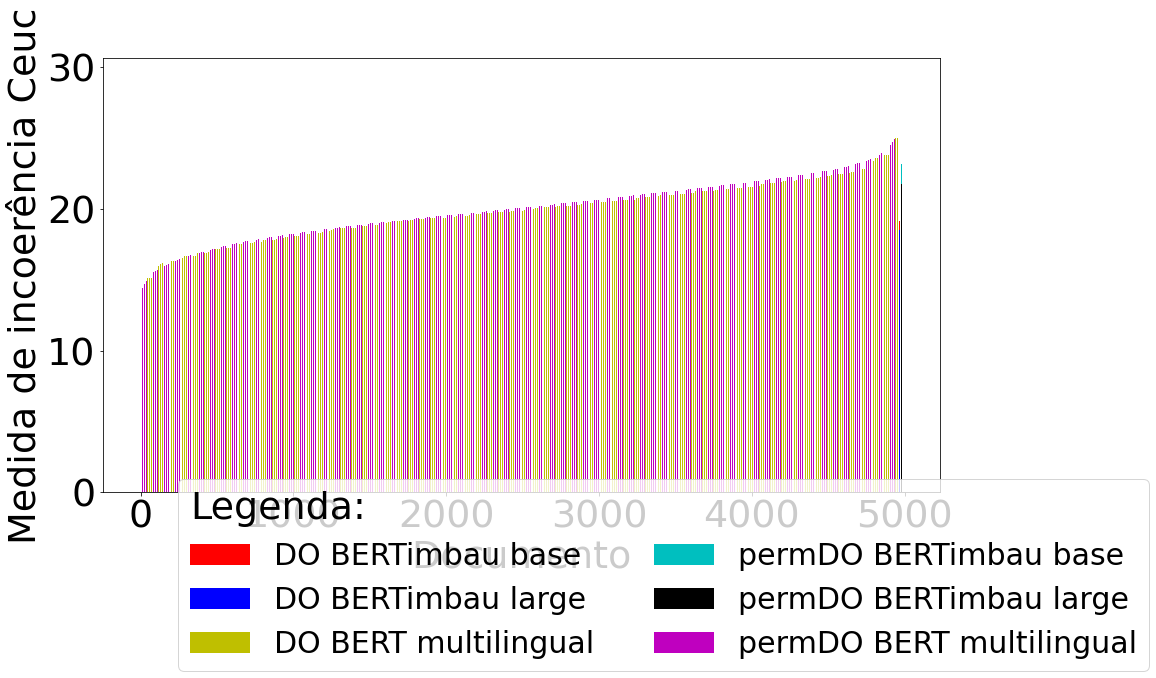

In [ ]:
graficoBarraMedidaOrdenada('Medida de incoerência Ceuc', 
                  lista_Ceucc4oBERTimbaub, 
                  lista_Ceucc4pBERTimbaub,
                  lista_Ceucc4oBERTimbaul, 
                  lista_Ceucc4pBERTimbaul,
                  lista_Ceucc4oBERTm, 
                  lista_Ceucc4pBERTm)

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


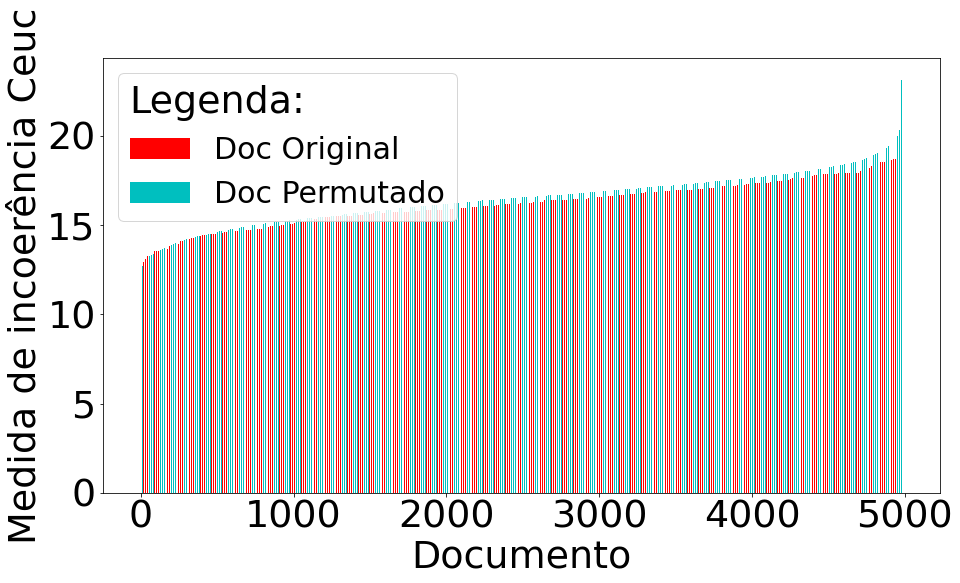

In [ ]:
graficoBarraMedidaOrdenada2('Medida de incoerência Ceuc', 
                  lista_Ceucc4oBERTimbaub, 
                  lista_Ceucc4pBERTimbaub)

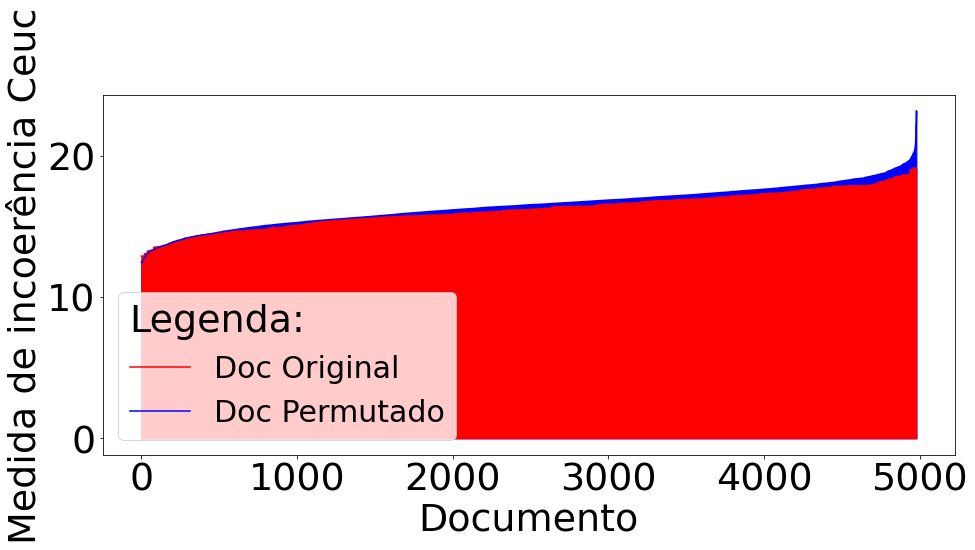

In [ ]:
graficoLinhaMedidaOrdenada2Preenchido('Medida de incoerência Ceuc', 
                  lista_Ceucc4oBERTimbaub, 
                  lista_Ceucc4pBERTimbaub)

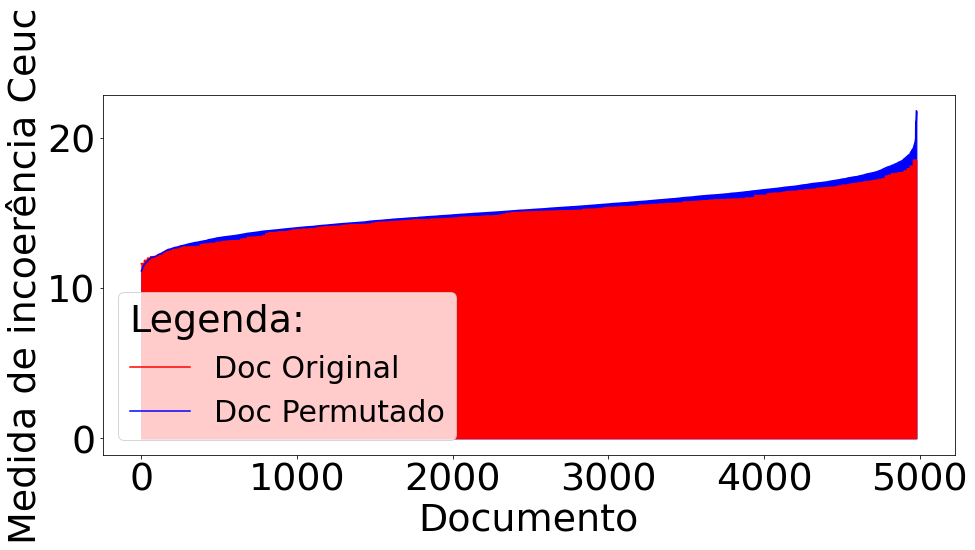

In [ ]:
graficoLinhaMedidaOrdenada2Preenchido('Medida de incoerência Ceuc', 
                  lista_Ceucc4oBERTimbaul, 
                  lista_Ceucc4pBERTimbaul)

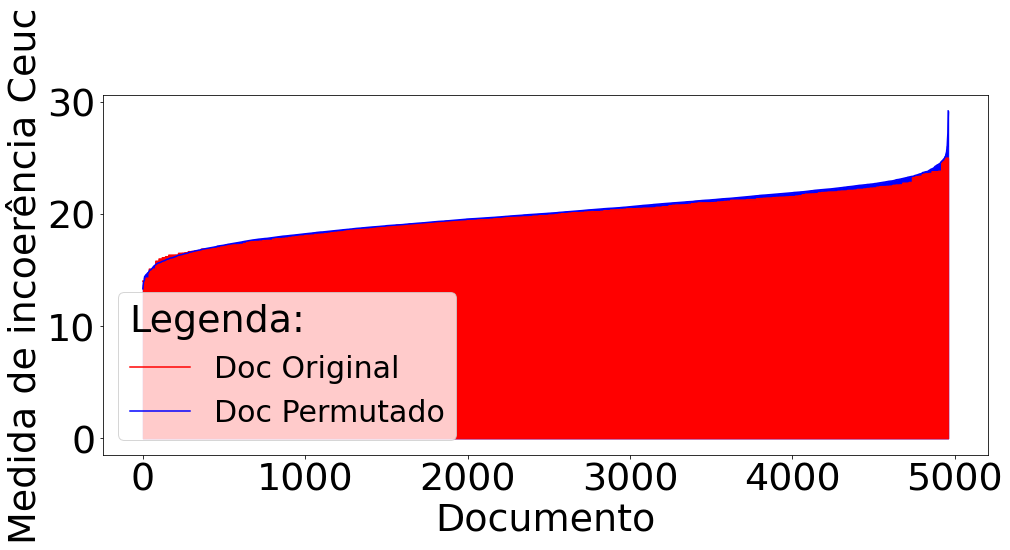

In [ ]:
graficoLinhaMedidaOrdenada2Preenchido('Medida de incoerência Ceuc', 
                  lista_Ceucc4oBERTm, 
                  lista_Ceucc4pBERTm)


## 2.5 Avaliando a medida de incoerência Cman com a medida de distância de manhattan(man)



### Estatística

#### Base

In [ ]:
acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado = acertosMedidaDistanciaOriginal(dfListaParesDocumentosMedidasBERTimbaub,'cman')
print(">>> Contando a coerência do original")
print('Acertos Original :', acertosOriginal, 'de', len(dfListaParesDocumentosMedidasBERTimbaub))
print('Percentual de documentos coerentes em relação ao total:', resultadoOriginal*100)

print('Acertos Permutado :', acertosPermutado, 'de', len(dfListaParesDocumentosMedidasBERTimbaub))
print('Percentual de documentos incoerentes em relação ao total:', resultadoPermutado*100)

>>> Contando a coerência do original
Acertos Original : 3148 de 4980
Percentual de documentos coerentes em relação ao total: 63.212851405622494
Acertos Permutado : 1832 de 4980
Percentual de documentos incoerentes em relação ao total: 36.78714859437751


#### Large

In [ ]:
acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado = acertosMedidaDistanciaOriginal(dfListaParesDocumentosMedidasBERTimbaul,'cman')
print(">>> Contando a coerência do original")
print('Acertos Original :', acertosOriginal, 'de', len(dfListaParesDocumentosMedidasBERTimbaul))
print('Percentual de documentos coerentes em relação ao total:', resultadoOriginal*100)

print('Acertos Permutado :', acertosPermutado, 'de', len(dfListaParesDocumentosMedidasBERTimbaul))
print('Percentual de documentos incoerentes em relação ao total:', resultadoPermutado*100)

>>> Contando a coerência do original
Acertos Original : 3133 de 4980
Percentual de documentos coerentes em relação ao total: 62.911646586345384
Acertos Permutado : 1847 de 4980
Percentual de documentos incoerentes em relação ao total: 37.088353413654616


#### Multilingue

In [ ]:
acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado = acertosMedidaDistanciaOriginal(dfListaParesDocumentosMedidasBERTm,'cman')
print(">>> Contando a coerência do original")
print('Acertos Original :', acertosOriginal, 'de', len(dfListaParesDocumentosMedidasBERTm))
print('Percentual de documentos coerentes em relação ao total:', resultadoOriginal*100)

print('Acertos Permutado :', acertosPermutado, 'de', len(dfListaParesDocumentosMedidasBERTm))
print('Percentual de documentos incoerentes em relação ao total:', resultadoPermutado*100)

>>> Contando a coerência do original
Acertos Original : 2893 de 4960
Percentual de documentos coerentes em relação ao total: 58.32661290322581
Acertos Permutado : 2067 de 4960
Percentual de documentos incoerentes em relação ao total: 41.67338709677419


### Gráficos

#### Gráfico de linha da medida de incoerência Cman dos documentos originais e suas permutações aleatórias do conjunto de dados CSTNews utilizando os MCLs.

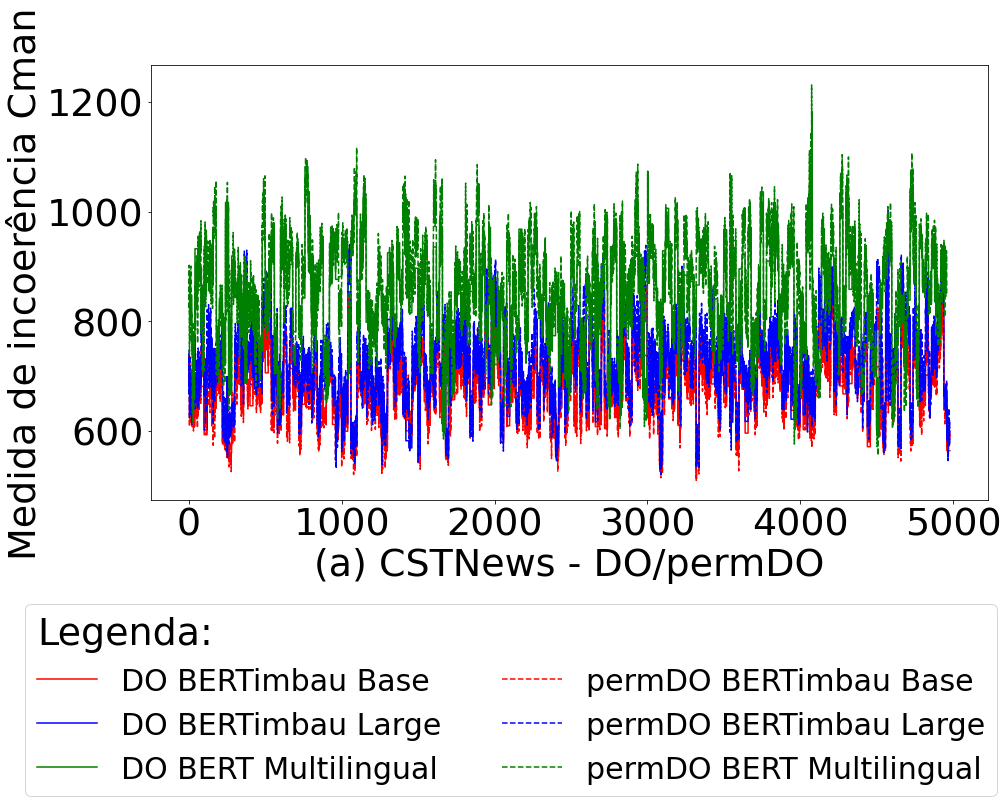

In [ ]:
graficoLinhaMedida('Medida de incoerência Cman', 
                   lista_Cmanc4oBERTimbaub, 
                   lista_Cmanc4pBERTimbaub,
                   lista_Cmanc4oBERTimbaul, 
                   lista_Cmanc4pBERTimbaul,
                   lista_Cmanc4oBERTm, 
                   lista_Cmanc4pBERTm)

In [ ]:
print("Diferença entre as medidas BERT Base       :", getSomatorioDiferencaAbsoluta(lista_Cmanc4oBERTimbaub, lista_Cmanc4pBERTimbaub))
print("Diferença entre as medidas BERT Large      :", getSomatorioDiferencaAbsoluta(lista_Cmanc4oBERTimbaul, lista_Cmanc4pBERTimbaul))
print("Diferença entre as medidas BERT multilingue:", getSomatorioDiferencaAbsoluta(lista_Cmanc4oBERTm, lista_Cmanc4pBERTm))

Diferença entre as medidas BERT Base       : 151572.07706018083
Diferença entre as medidas BERT Large      : 176276.3302198445
Diferença entre as medidas BERT multilingue: 208337.42256892423


##### Subconjunto de 1000

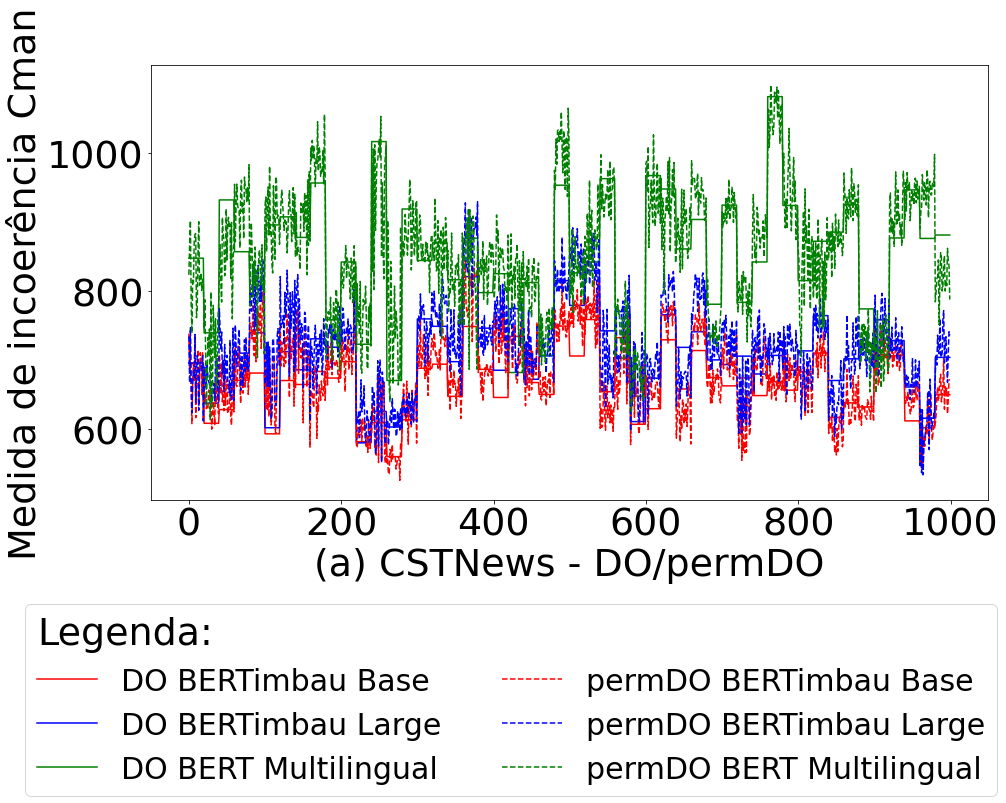

In [ ]:
graficoLinhaMedida('Medida de incoerência Cman', 
                   lista_Cmanc4oBERTimbaub[0:1000], 
                   lista_Cmanc4pBERTimbaub[0:1000],
                   lista_Cmanc4oBERTimbaul[0:1000], 
                   lista_Cmanc4pBERTimbaul[0:1000],
                   lista_Cmanc4oBERTm[0:1000], 
                   lista_Cmanc4pBERTm[0:1000])

##### Subconjunto de 200

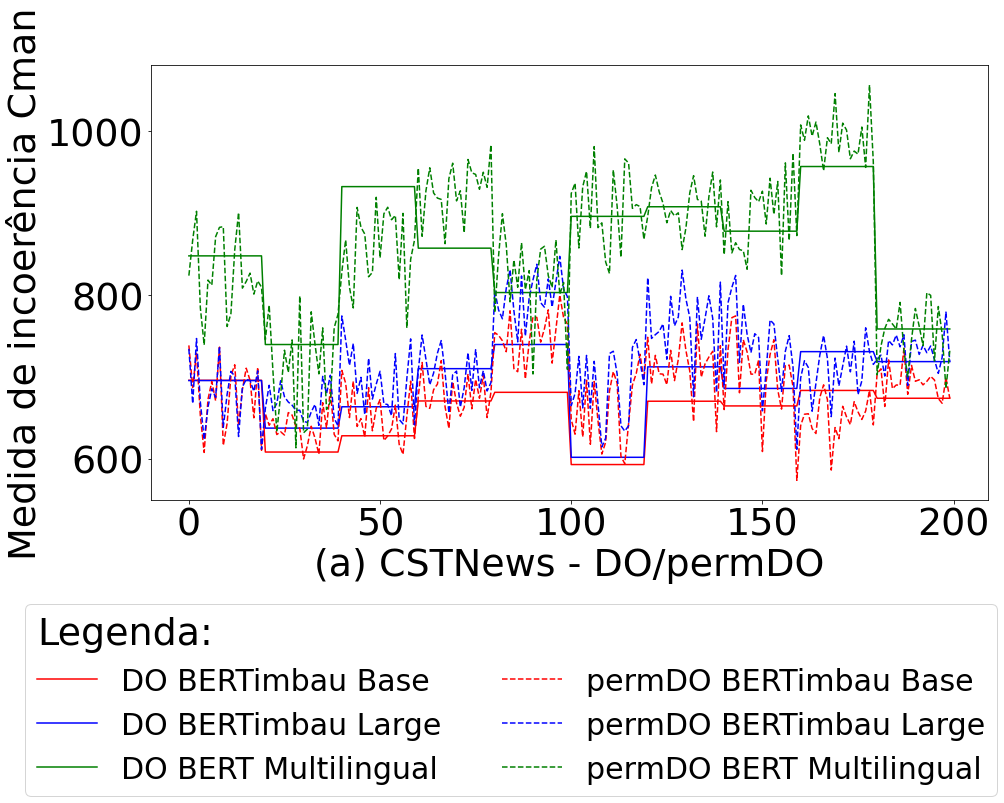

In [ ]:
graficoLinhaMedida('Medida de incoerência Cman', 
                   lista_Cmanc4oBERTimbaub[0:200], 
                   lista_Cmanc4pBERTimbaub[0:200],
                   lista_Cmanc4oBERTimbaul[0:200], 
                   lista_Cmanc4pBERTimbaul[0:200],
                   lista_Cmanc4oBERTm[0:200], 
                   lista_Cmanc4pBERTm[0:200])

In [ ]:
print("Diferença entre as medidas BERT Base       :", getSomatorioDiferencaAbsoluta(lista_Cmanc4oBERTimbaub[0:200], lista_Cmanc4pBERTimbaub[0:200]))
print("Diferença entre as medidas BERT Large      :", getSomatorioDiferencaAbsoluta(lista_Cmanc4oBERTimbaul[0:200], lista_Cmanc4pBERTimbaul[0:200]))
print("Diferença entre as medidas BERT multilingue:", getSomatorioDiferencaAbsoluta(lista_Cmanc4oBERTm[0:200], lista_Cmanc4pBERTm[0:200]))

Diferença entre as medidas BERT Base       : 8139.612597147623
Diferença entre as medidas BERT Large      : 8596.409938557943
Diferença entre as medidas BERT multilingue: 8844.120201280377


##### Subconjunto de 20

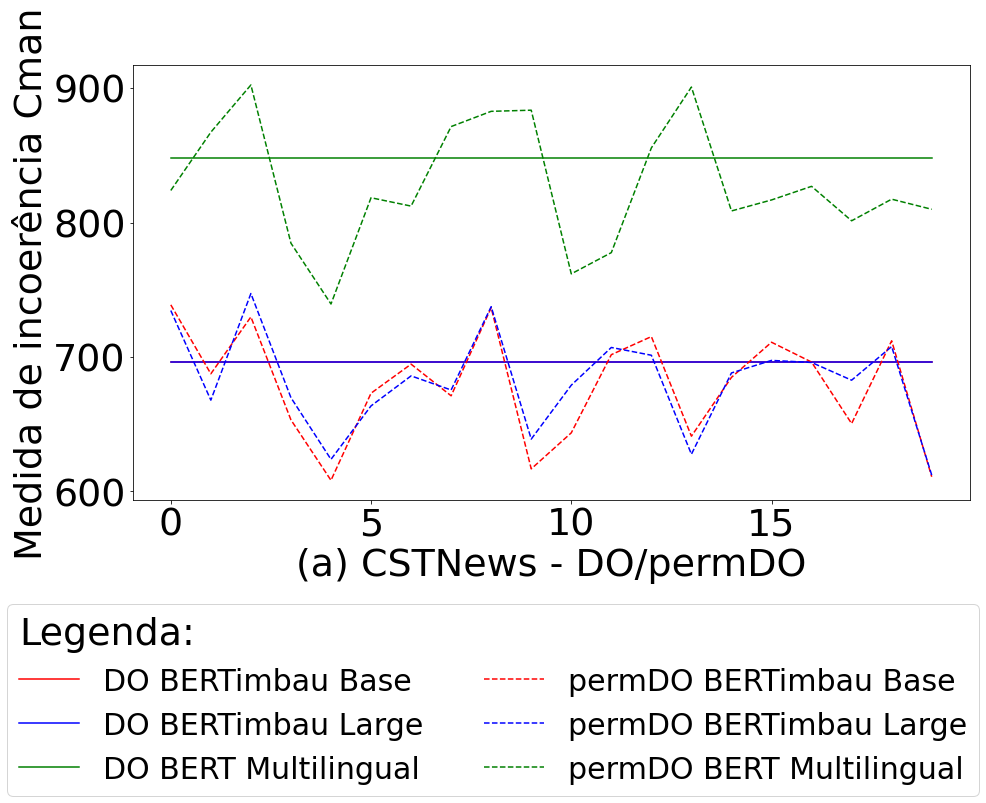

In [ ]:
graficoLinhaMedida('Medida de incoerência Cman', 
                   lista_Cmanc4oBERTimbaub[0:20], 
                   lista_Cmanc4pBERTimbaub[0:20],
                   lista_Cmanc4oBERTimbaul[0:20], 
                   lista_Cmanc4pBERTimbaul[0:20],
                   lista_Cmanc4oBERTm[0:20], 
                   lista_Cmanc4pBERTm[0:20])

In [ ]:
print("Diferença entre as medidas BERT Base       :", getSomatorioDiferencaAbsoluta(lista_Cmanc4oBERTimbaub[0:20], lista_Cmanc4pBERTimbaub[0:20]))
print("Diferença entre as medidas BERT Large      :", getSomatorioDiferencaAbsoluta(lista_Cmanc4oBERTimbaul[0:20], lista_Cmanc4pBERTimbaul[0:20]))
print("Diferença entre as medidas BERT multilingue:", getSomatorioDiferencaAbsoluta(lista_Cmanc4oBERTm[0:20], lista_Cmanc4pBERTm[0:20]))

Diferença entre as medidas BERT Base       : 690.848917643229
Diferença entre as medidas BERT Large      : 597.2876993815102
Diferença entre as medidas BERT multilingue: 852.5175476074214


#### Gráfico de barra da medida de incoerência Cman dos documentos originais e suas permutações aleatórias do conjunto de dados CSTNews utilizando os MCLs.

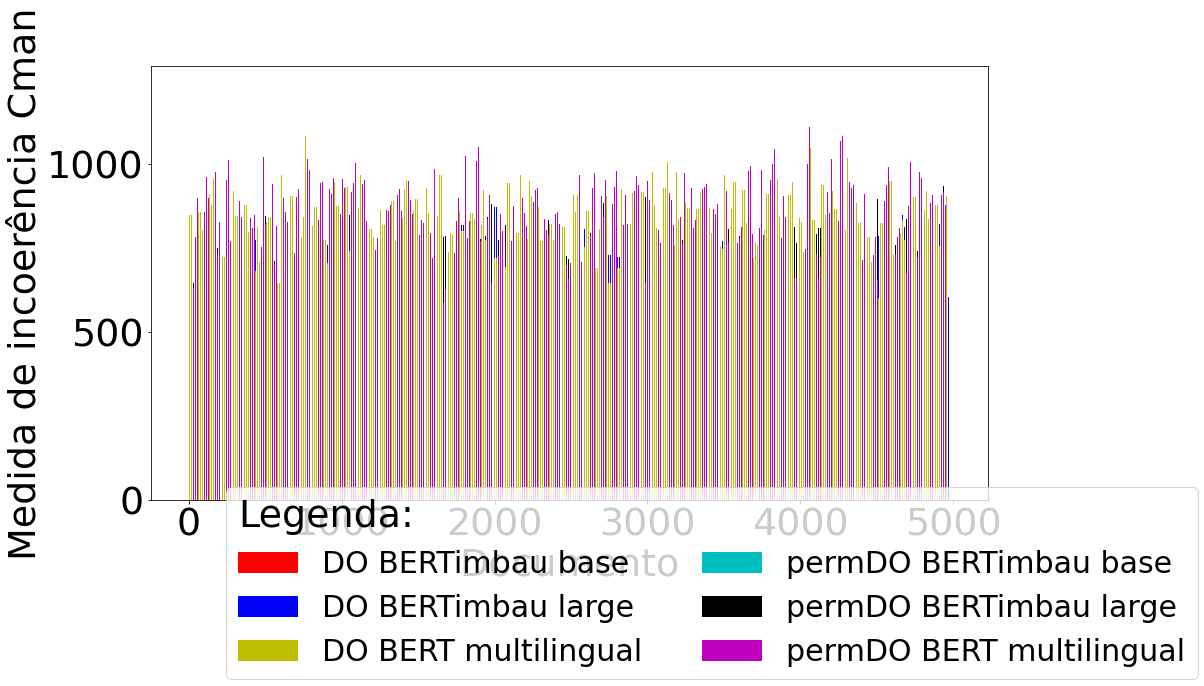

In [ ]:
graficoBarraMedida('Medida de incoerência Cman', 
                  lista_Cmanc4oBERTimbaub, 
                   lista_Cmanc4pBERTimbaub,
                   lista_Cmanc4oBERTimbaul, 
                   lista_Cmanc4pBERTimbaul,
                   lista_Cmanc4oBERTm, 
                   lista_Cmanc4pBERTm)

#### Gráfico de linha da medida de incoerência Cman ordenada crescentemente dos documentos originais e suas permutações aleatórias do conjunto de dados CSTNews utilizando os MCLs.

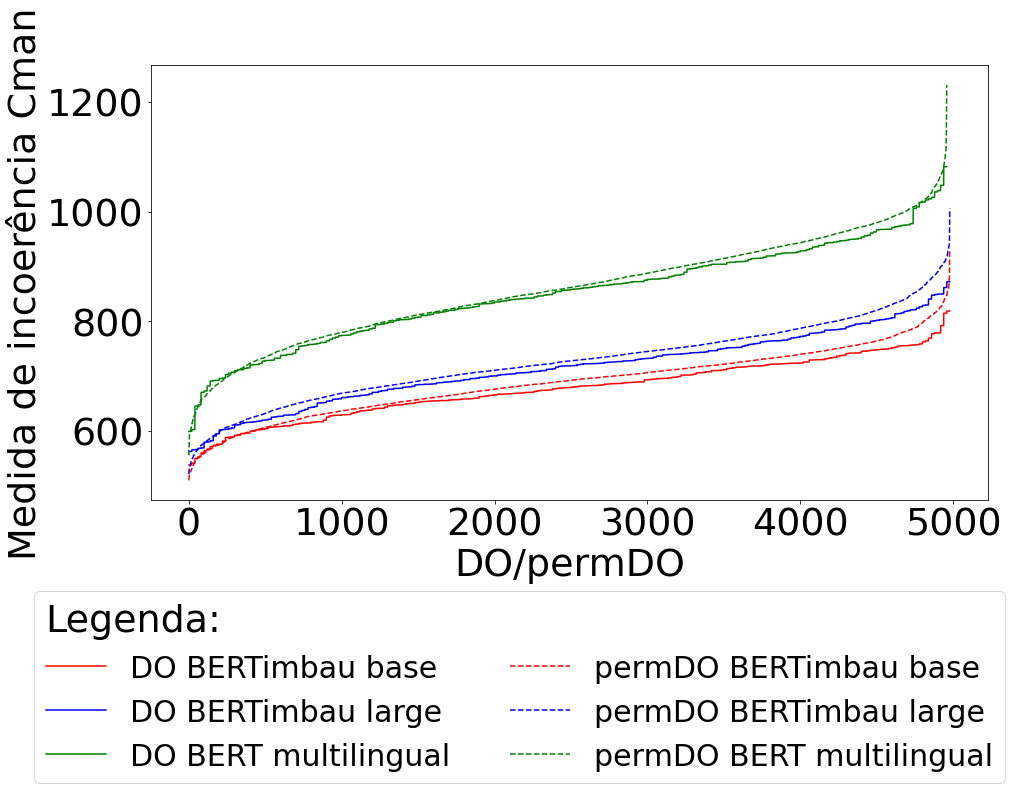

In [ ]:
graficoLinhaMedidaOrdenada('Medida de incoerência Cman', 
                   lista_Cmanc4oBERTimbaub, 
                   lista_Cmanc4pBERTimbaub,
                   lista_Cmanc4oBERTimbaul, 
                   lista_Cmanc4pBERTimbaul,
                   lista_Cmanc4oBERTm, 
                   lista_Cmanc4pBERTm)

In [ ]:
print("Diferença entre as medidas ordenada BERT Base       :", getSomatorioDiferencaAbsolutaOrdenada(lista_Cmanc4oBERTimbaub, lista_Cmanc4pBERTimbaub))
print("Diferença entre as medidas ordenada BERT Large      :", getSomatorioDiferencaAbsolutaOrdenada(lista_Cmanc4oBERTimbaul, lista_Cmanc4pBERTimbaul))
print("Diferença entre as medidas ordenada BERT multilingue:", getSomatorioDiferencaAbsolutaOrdenada(lista_Cmanc4oBERTm, lista_Cmanc4pBERTm))

Diferença entre as medidas ordenada BERT Base       : 58805.4246034976
Diferença entre as medidas ordenada BERT Large      : 65326.09547404483
Diferença entre as medidas ordenada BERT multilingue: 46496.56327486845


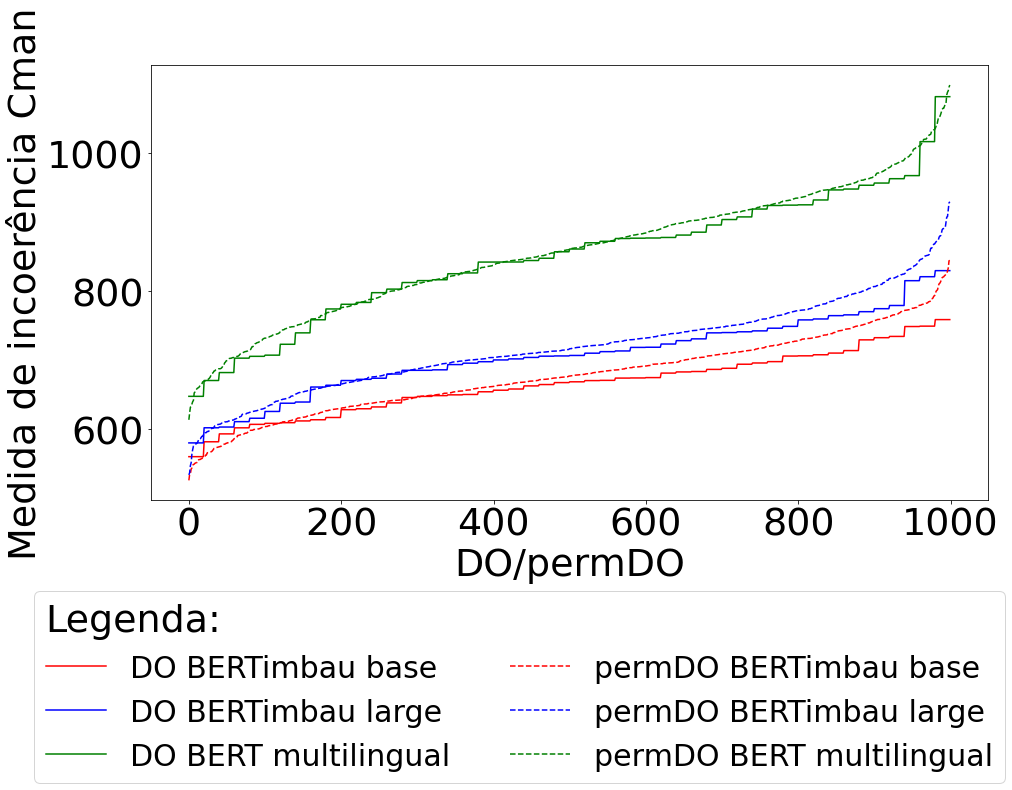

In [ ]:
graficoLinhaMedidaOrdenada('Medida de incoerência Cman', 
                   lista_Cmanc4oBERTimbaub[0:1000], 
                   lista_Cmanc4pBERTimbaub[0:1000],
                   lista_Cmanc4oBERTimbaul[0:1000], 
                   lista_Cmanc4pBERTimbaul[0:1000],
                   lista_Cmanc4oBERTm[0:1000], 
                   lista_Cmanc4pBERTm[0:1000])

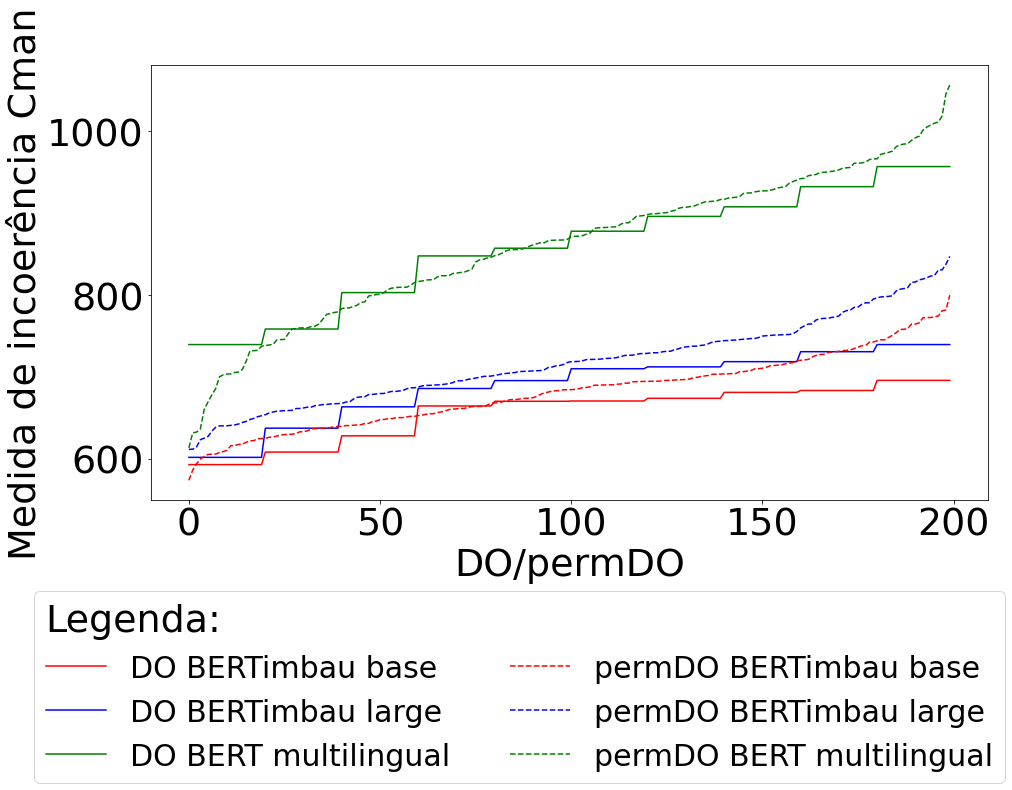

In [ ]:
graficoLinhaMedidaOrdenada('Medida de incoerência Cman', 
                   lista_Cmanc4oBERTimbaub[0:200], 
                   lista_Cmanc4pBERTimbaub[0:200],
                   lista_Cmanc4oBERTimbaul[0:200], 
                   lista_Cmanc4pBERTimbaul[0:200],
                   lista_Cmanc4oBERTm[0:200], 
                   lista_Cmanc4pBERTm[0:200])

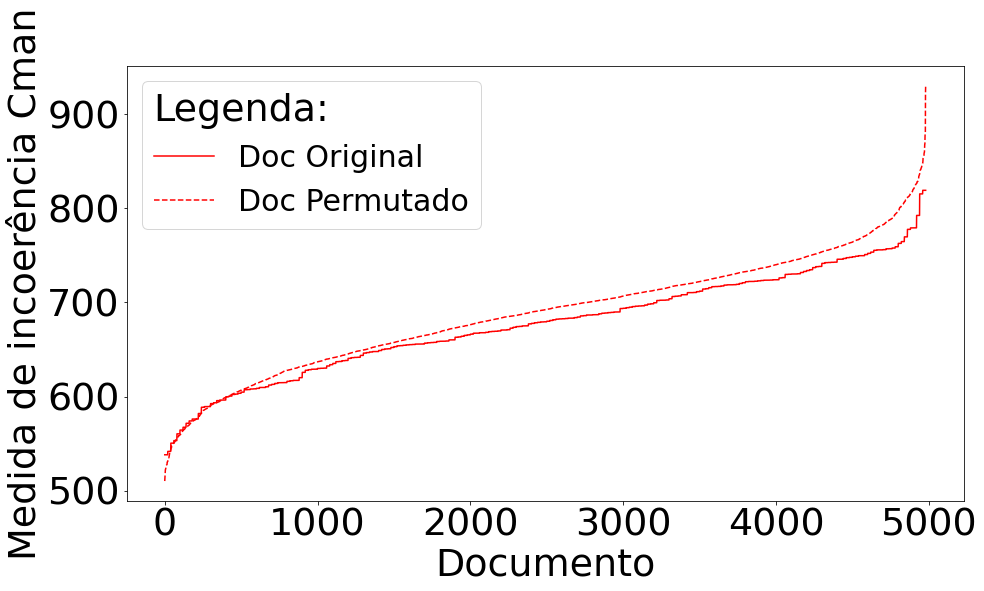

In [ ]:
graficoLinhaMedidaOrdenada2('Medida de incoerência Cman', 
                   lista_Cmanc4oBERTimbaub, 
                   lista_Cmanc4pBERTimbaub)

In [ ]:
print("Diferença entre as medidas:", getSomatorioDiferencaAbsoluta(lista_Cmanc4oBERTimbaub, lista_Cmanc4pBERTimbaub))

Diferença entre as medidas: 151572.07706018083


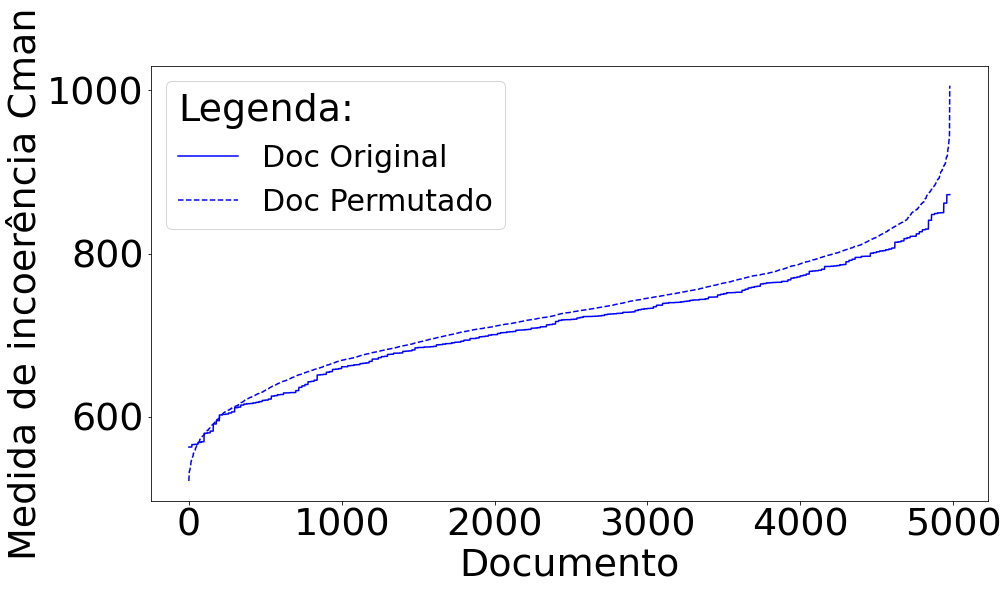

In [ ]:
graficoLinhaMedidaOrdenada2('Medida de incoerência Cman', 
                   lista_Cmanc4oBERTimbaul, 
                   lista_Cmanc4pBERTimbaul,
                   'b')

In [ ]:
print("Diferença entre as medidas:", getSomatorioDiferencaAbsoluta(lista_Cmanc4oBERTimbaul, lista_Cmanc4pBERTimbaul))

Diferença entre as medidas: 176276.3302198445


#### Gráfico de barra da medida de incoerência Cman ordenada crescentemente dos documentos originais e suas permutações aleatórias do conjunto de dados CSTNews utilizando os MCLs.

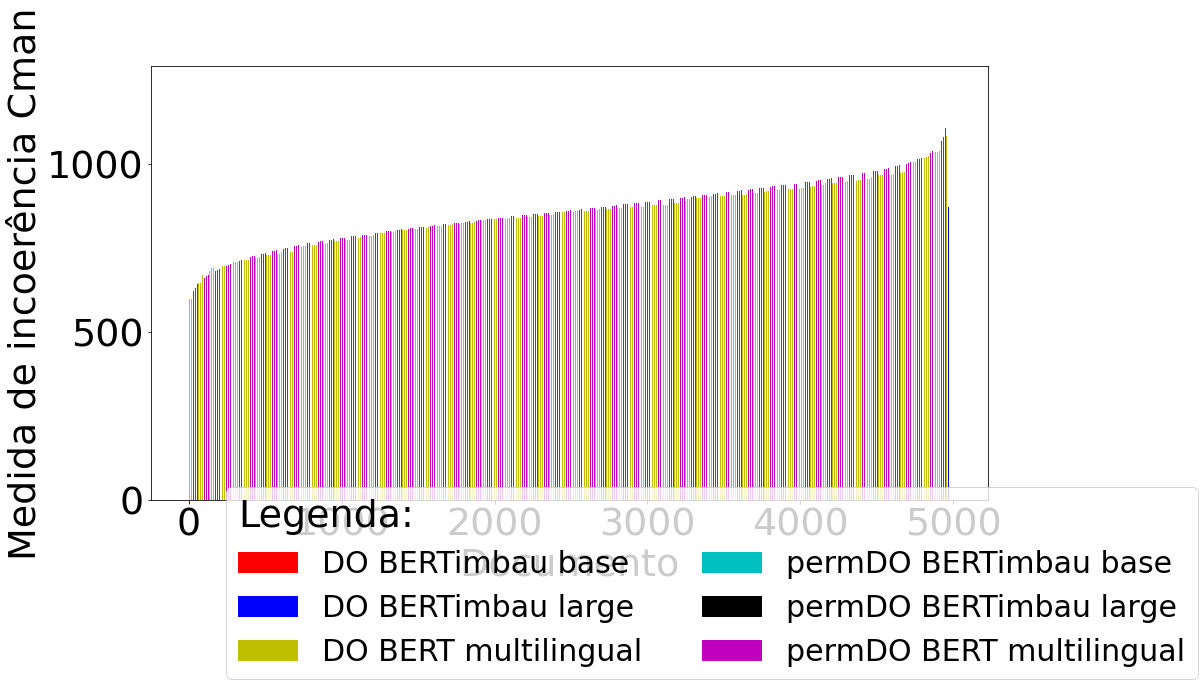

In [ ]:
graficoBarraMedidaOrdenada('Medida de incoerência Cman', 
                  lista_Cmanc4oBERTimbaub, 
                  lista_Cmanc4pBERTimbaub,
                  lista_Cmanc4oBERTimbaul, 
                  lista_Cmanc4pBERTimbaul,
                  lista_Cmanc4oBERTm, 
                  lista_Cmanc4pBERTm)

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


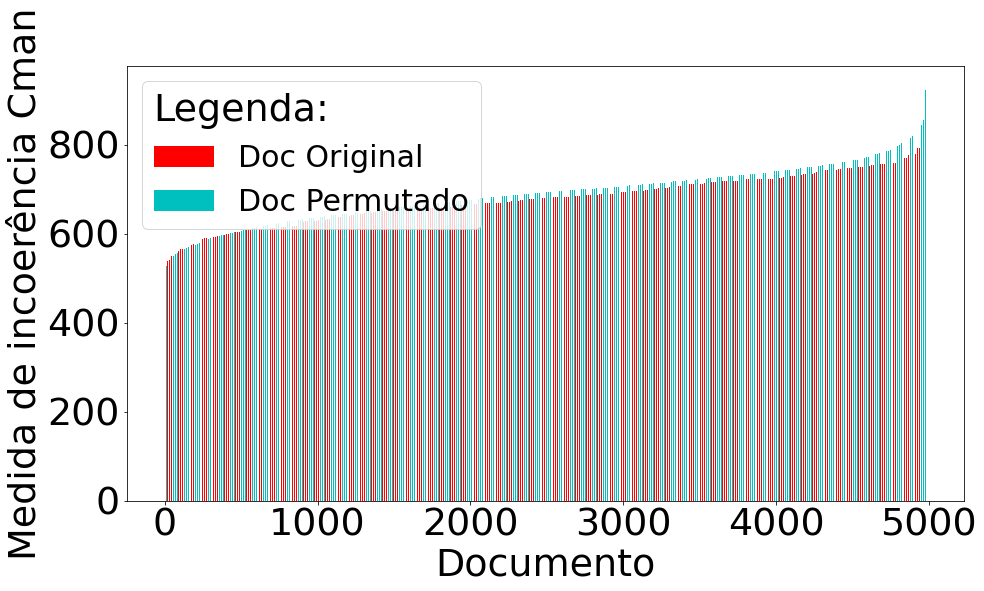

In [ ]:
graficoBarraMedidaOrdenada2('Medida de incoerência Cman', 
                  lista_Cmanc4oBERTimbaub, 
                  lista_Cmanc4pBERTimbaub)

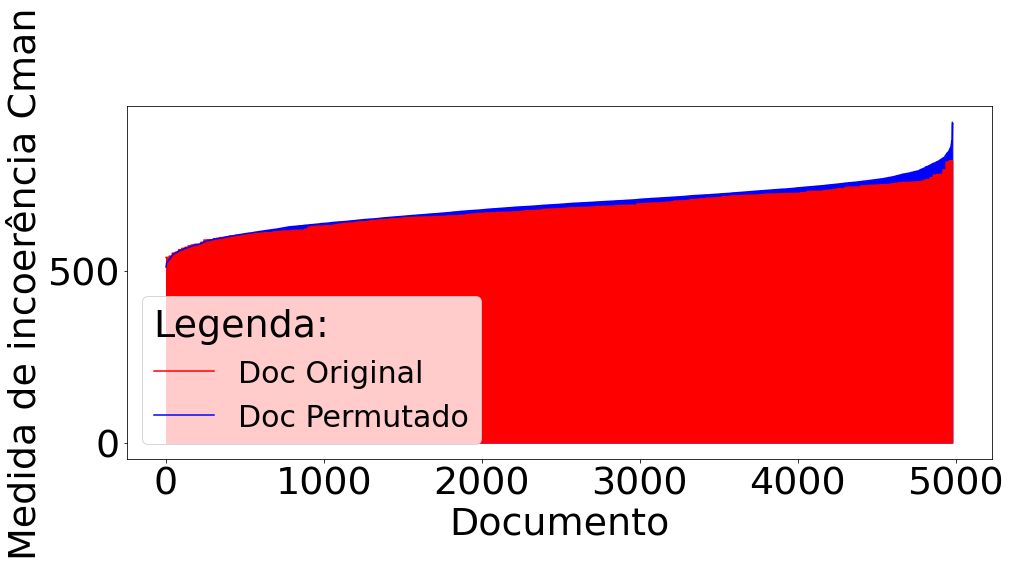

In [ ]:
graficoLinhaMedidaOrdenada2Preenchido('Medida de incoerência Cman', 
                  lista_Cmanc4oBERTimbaub, 
                  lista_Cmanc4pBERTimbaub)

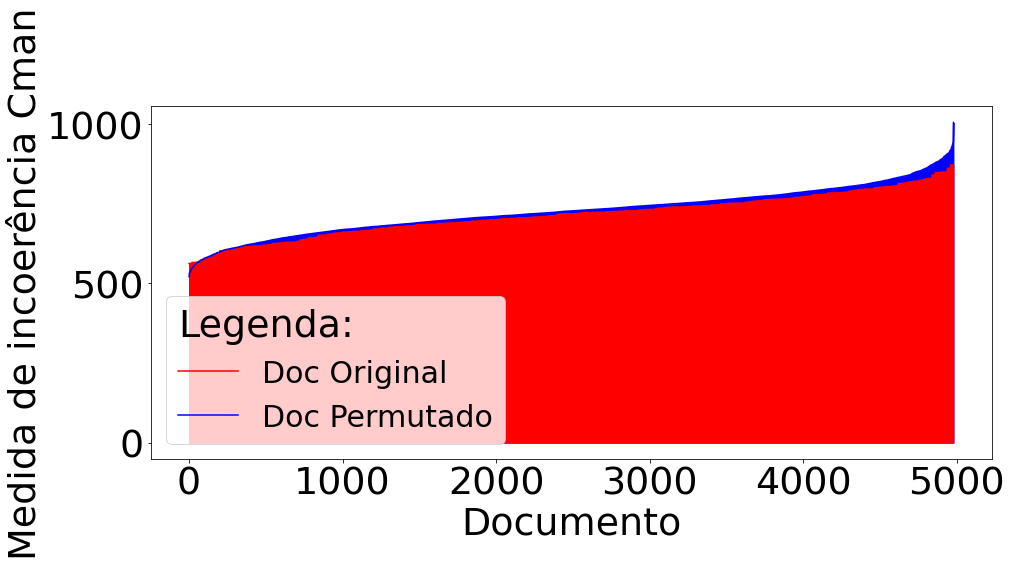

In [ ]:
graficoLinhaMedidaOrdenada2Preenchido('Medida de incoerência Cman', 
                  lista_Cmanc4oBERTimbaul, 
                  lista_Cmanc4pBERTimbaul)

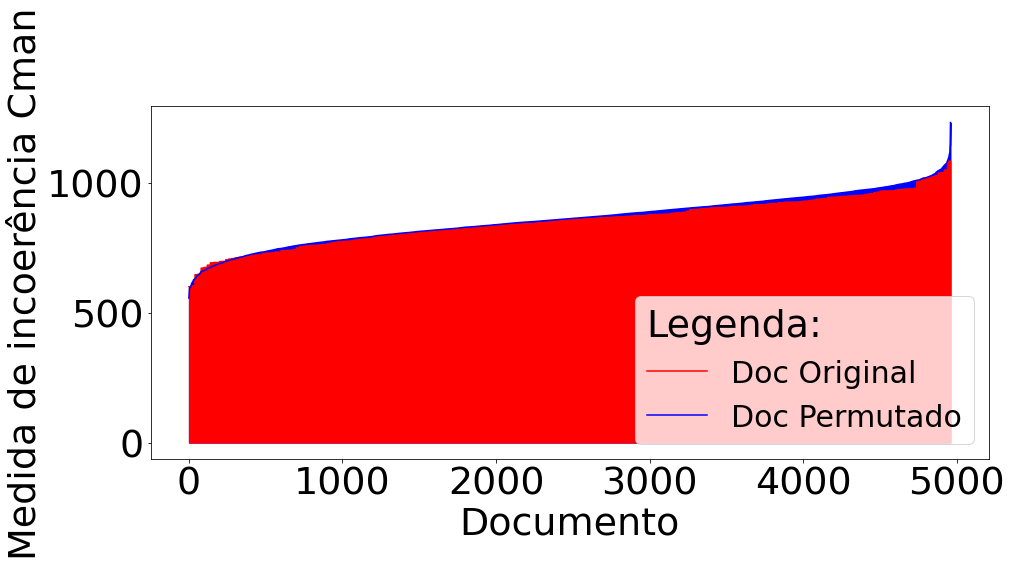

In [ ]:
graficoLinhaMedidaOrdenada2Preenchido('Medida de incoerência Cman', 
                  lista_Cmanc4oBERTm, 
                  lista_Cmanc4pBERTm)

# 3 Resultado do Classificador Binário usando o Método Kfold

## 2.1 Carrega os dados das classificações

In [ ]:
# Import das bibliotecas.
import os
import pandas as pd

MODELO_BERT = '_BERTimbau'
TAMANHO_BERT = '_large'
EPOCA = '4'
TAXA_APRENDIZAGEM = '1'

DIRETORIO_CLASSIFICACAO = '/content/drive/MyDrive/Colab Notebooks/Data/CSTNEWS/validacao_classificacao/kfold/Classificacao/'

dfDadosClassificacao = pd.DataFrame()

# Verifica se o diretório dos resultados existem.
if os.path.exists(DIRETORIO_CLASSIFICACAO):
  arquivos = os.listdir(DIRETORIO_CLASSIFICACAO)     
  print('\nModelo:', MODELO_BERT, ' Tamanho:', TAMANHO_BERT, ' Epoca:', EPOCA, ' Taxa Aprendizagem: ', TAXA_APRENDIZAGEM)
  # Acumuladores.
  contaFolds = 0 
  contaReg = 0
  for fold in range(1,11):    
    NOME_ARQUIVO_CLASSIFICAO = 'AjusteFinoCSTNews_v1_C_SB_KF_E_' + EPOCA + '_lr_' + TAXA_APRENDIZAGEM + '_b_4_8_f' + str(fold) + MODELO_BERT + TAMANHO_BERT + '.csv'
    NOME_ARQUIVO_CLASSIFICACAO_COMPLETO = DIRETORIO_CLASSIFICACAO +  NOME_ARQUIVO_CLASSIFICAO

    # Verifica se o arquivo existe.
    if os.path.isfile(NOME_ARQUIVO_CLASSIFICACAO_COMPLETO):
        # Carrega os dados do arquivo  
        dados = pd.read_csv(NOME_ARQUIVO_CLASSIFICACAO_COMPLETO, sep=';')
        
        dfDadosClassificacao = pd.concat([dfDadosClassificacao, dados], ignore_index=True)
          
        # Conta o número de folds.
        contaFolds = contaFolds + 1

        contaReg = contaReg + len(dados)
    else:
        print('Arquivo não encontrado')
            
  print('Folds:', contaFolds, ' Regs:', contaReg)
else:
    print('Diretório com os resultados não encontrado')

print('Registros:', len(dfDadosClassificacao))    


Modelo: _BERTimbau  Tamanho: _large  Epoca: 4  Taxa Aprendizagem:  1
Folds: 10  Regs: 9960
Registros: 9960


In [ ]:
dfDadosClassificacao.sample(5)

data                         id  classe  predicao
4387  19/05/2021 19:46   C46_Extrato_5_Perm_4.txt       0         0
5963  19/05/2021 20:43   C22_Extrato_6_Perm_4.txt       0         0
3320  19/05/2021 18:50  C10_Extrato_3_Perm_17.txt       0         0
5494  19/05/2021 20:43   C10_Extrato_1_Perm_1.txt       0         1
4660  19/05/2021 19:46  C22_Extrato_1_Perm_16.txt       0         0

### Separa os documentos e remove as repetições

In [ ]:
# Separa os originais
dfOriginalClassificado = dfDadosClassificacao.loc[dfDadosClassificacao['id'].str.contains('Perm')==False]
# Remove os duplicados
dfOriginalClassificado = dfOriginalClassificado.drop_duplicates(subset=['id'])
dfOriginalClassificado = dfOriginalClassificado.sort_values('id')
print('Registros: ', len(dfOriginalClassificado))

Registros:  249


In [ ]:
# Separa os originais
dfPermutadoClassificado = dfDadosClassificacao.loc[dfDadosClassificacao['id'].str.contains('Perm')==True]
# Remove os duplicados
dfPermutadoClassificado = dfPermutadoClassificado.drop_duplicates(subset=['id'])
dfPermutadoClassificado = dfPermutadoClassificado.sort_values('id')
print('Registros: ', len(dfPermutadoClassificado))

Registros:  4980


In [ ]:
dfPermutadoClassificado.sample(5)

data                         id  classe  predicao
1931  19/05/2021 16:57  C37_Extrato_1_Perm_18.txt       0         0
5884  19/05/2021 20:43   C24_Extrato_6_Perm_3.txt       0         0
9421  20/05/2021 00:29   C9_Extrato_1_Perm_17.txt       0         0
6070  19/05/2021 21:39   C33_Extrato_4_Perm_8.txt       0         0
8444  19/05/2021 23:33   C45_Extrato_4_Perm_7.txt       0         0

### Organiza os pares de documentos

In [ ]:
listaParesDocumentosClassificados = []
# Refaz os pares de documentos
for i, linha1 in dfOriginalClassificado.iterrows():
    ponto = linha1['id'].find('.')
    nomeArquivo = linha1['id'][:ponto]
    for i, linha2 in dfPermutadoClassificado.iterrows():
      if nomeArquivo in linha2['id']:
        listaParesDocumentosClassificados.append([linha1['data'], linha1['id'],	linha1['classe'],	linha1['predicao'],
                                     linha2['data'], linha2['id'],	linha2['classe'],	linha2['predicao']])

print('Registros: ', len(listaParesDocumentosClassificados))

Registros:  4980


In [ ]:
dflistaParesDocumentosClassificados = pd.DataFrame(listaParesDocumentosClassificados, 
                                             columns=('dataDO', 'idDO', 'classeDO', 'predicaoDO', 'dataPerm', 'idPerm', 'classePerm','predicaoPerm')) 
print('Registros:', len(dflistaParesDocumentosClassificados))


Registros: 4980


In [ ]:
dflistaParesDocumentosClassificados.sample(5)

dataDO               idDO  classeDO  predicaoDO  \
1367  19/05/2021 16:01  C23_Extrato_3.txt         1           1   
2536  19/05/2021 16:01  C34_Extrato_2.txt         1           1   
4310  19/05/2021 16:01   C4_Extrato_4.txt         1           1   
4571  19/05/2021 16:01   C5_Extrato_5.txt         1           1   
2773  19/05/2021 16:01  C36_Extrato_2.txt         1           1   

              dataPerm                     idPerm  classePerm  predicaoPerm  
1367  20/05/2021 00:29  C23_Extrato_3_Perm_15.txt           0             0  
2536  19/05/2021 22:36   C34_Extrato_2_Perm_6.txt           0             0  
4310  19/05/2021 18:50   C4_Extrato_4_Perm_18.txt           0             0  
4571  19/05/2021 22:36   C5_Extrato_5_Perm_19.txt           0             1  
2773  20/05/2021 00:29   C36_Extrato_2_Perm_3.txt           0             0

# 4 Compara os resultados

## 4.1 Carregamento do arquivo



### Especifica a fonte dos arquivos de dados

In [ ]:
# Descomente este linha para fazer o download do site do icmc
# Alteração necessário pois o site do icmc é muito lento para o download
ORIGEM_DADOS = 'ICMC'

### Especifica o nome do arquivo de dados

In [ ]:
# Nome do arquivo a ser criado.
NOME_ARQUIVO = 'Summarycoherencemodels.zip'

### Download do arquivo dos dados



In [ ]:
# Apaga o arquivo.
!rm '$NOME_ARQUIVO'

rm: cannot remove 'Summarycoherencemodels.zip': No such file or directory


In [ ]:
if ORIGEM_DADOS != None:
  # Realiza o download do arquivo do ICMC.
  !wget -O '$NOME_ARQUIVO' https://sites.icmc.usp.br/taspardo/Summary%20coherence%20models.zip  

--2021-06-26 11:37:37--  https://udesc-my.sharepoint.com/:u:/g/personal/91269423991_udesc_br/EQfOLQ6Vg_1Hs4JSwg0aO4wBnxY2ym8tua1XIQB00kczOg?e=hBAqpE&download=1
Resolving udesc-my.sharepoint.com (udesc-my.sharepoint.com)... 13.107.136.9
Connecting to udesc-my.sharepoint.com (udesc-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/91269423991_udesc_br/Documents/DATAPUBLIC/Summary%20coherence%20models.zip?originalPath=aHR0cHM6Ly91ZGVzYy1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC85MTI2OTQyMzk5MV91ZGVzY19ici9FUWZPTFE2VmdfMUhzNEpTd2cwYU80d0JueFkyeW04dHVhMVhJUUIwMGtjek9nP3J0aW1lPUU0Wkh6Wlk0MlVn [following]
--2021-06-26 11:37:39--  https://udesc-my.sharepoint.com/personal/91269423991_udesc_br/Documents/DATAPUBLIC/Summary%20coherence%20models.zip?originalPath=aHR0cHM6Ly91ZGVzYy1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC85MTI2OTQyMzk5MV91ZGVzY19ici9FUWZPTFE2VmdfMUhzNEpTd2cwYU80d0JueFkyeW04dHVhMVhJUUIwMGtjek9nP3J0aW1lPUU0Wkh

In [ ]:
# Lista o diretório corrente e os arquivos.
!pwd
!ls -la

/content
total 486376
drwxr-xr-x 1 root root      4096 Jun 26 11:37 .
drwxr-xr-x 1 root root      4096 Jun 26 11:21 ..
drwxr-xr-x 4 root root      4096 Jun 15 13:37 .config
drwx------ 5 root root      4096 Jun 26 11:23 drive
drwxr-xr-x 1 root root      4096 Jun 15 13:37 sample_data
-rw-r--r-- 1 root root 498024248 Dec 16  2020 Summarycoherencemodels.zip


### Descompactando os arquivos

In [ ]:
# Lista o diretório corrente e os arquivos.
!pwd
!ls -la

# Apaga o diretório e seus arquivos
!rm -rf 'Summary coherence model'

# Descompacta o arquivo
!unzip -o '$NOME_ARQUIVO'

# Lista os arquivos do diretório corrente
!ls -la

/content
total 486376
drwxr-xr-x 1 root root      4096 Jun 26 11:37 .
drwxr-xr-x 1 root root      4096 Jun 26 11:21 ..
drwxr-xr-x 4 root root      4096 Jun 15 13:37 .config
drwx------ 5 root root      4096 Jun 26 11:23 drive
drwxr-xr-x 1 root root      4096 Jun 15 13:37 sample_data
-rw-r--r-- 1 root root 498024248 Dec 16  2020 Summarycoherencemodels.zip
Archive:  Summarycoherencemodels.zip
 extracting: Modelo Baseado em Grafo Discursivo.zip  
 extracting: Modelo Baseado em Grafo.zip  
 extracting: Modelo Baseado em Padrфes Sintaticos.zip  
 extracting: Modelo de Entidades com RST Local.zip  
 extracting: Modelo de RelaЗфes Discursivas.zip  
 extracting: Modelo de Termo com RST.zip  
 extracting: Modelo Latent Semantic Analysis.zip  
 extracting: Modelos de Grade de Entidades com Discurso.zip  
 extracting: Modelos de Grade de Entidades.zip  
total 972744
drwxr-xr-x 1 root root      4096 Jun 26 11:38  .
drwxr-xr-x 1 root root      4096 Jun 26 11:21  ..
drwxr-xr-x 4 root root      4096 J

### Descompactando os experimentos

O arquivo de dados originais e permutado estão dentro de cada experimento.



#### Especifica o nome do arquivo do experimento

In [ ]:
NOME_ARQUIVO_EXPERIMENTO = 'Modelo de RelaЗфes Discursivas.zip'

#### Descompacta o arquivo do experimento

Usa o unzip para descompactar:
*   `-o` sobrescreve o arquivo se existir
*   `-q` desliga as mensagens 

In [ ]:
# Lista o diretório corrente e os arquivos.
!pwd
!ls -la

# Apaga o diretório 'Modelo de Relações Discursivas' e seus arquivos
!rm -rf 'Modelo de Relações Discursivas'

# Descompacta o arquivo o experimento
!unzip -o '$NOME_ARQUIVO_EXPERIMENTO'

# Lista os arquivos do diretório corrente
!ls -la

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: Modelo de Relações Discursivas/Sumarios_Humanos_Permutados/C13_Extrato_4_Perm_11.txt  
  inflating: Modelo de Relações Discursivas/Sumarios_Humanos_Permutados/C13_Extrato_4_Perm_12.txt  
  inflating: Modelo de Relações Discursivas/Sumarios_Humanos_Permutados/C13_Extrato_4_Perm_13.txt  
  inflating: Modelo de Relações Discursivas/Sumarios_Humanos_Permutados/C13_Extrato_4_Perm_14.txt  
  inflating: Modelo de Relações Discursivas/Sumarios_Humanos_Permutados/C13_Extrato_4_Perm_15.txt  
  inflating: Modelo de Relações Discursivas/Sumarios_Humanos_Permutados/C13_Extrato_4_Perm_16.txt  
  inflating: Modelo de Relações Discursivas/Sumarios_Humanos_Permutados/C13_Extrato_4_Perm_17.txt  
  inflating: Modelo de Relações Discursivas/Sumarios_Humanos_Permutados/C13_Extrato_4_Perm_18.txt  
  inflating: Modelo de Relações Discursivas/Sumarios_Humanos_Permutados/C13_Extrato_4_Perm_19.txt  
  inflating: Modelo de 

## 4.2 Cálculo medida

In [ ]:
acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado = acertosMedidaDistanciaOriginal(dfListaParesDocumentosMedidasBERTimbaub,'ceuc')
print(">>> Contando a coerência do original")
print('Acertos Original :', acertosOriginal, 'de', len(dfListaParesDocumentosMedidasBERTimbaub))
print('Percentual de documentos coerentes em relação ao total:', resultadoOriginal*100)

print('Acertos Permutado :', acertosPermutado, 'de', len(dfListaParesDocumentosMedidasBERTimbaub))
print('Percentual de documentos incoerentes em relação ao total:', resultadoPermutado*100)

>>> Contando a coerência do original
Acertos Original : 3196 de 4980
Percentual de documentos coerentes em relação ao total: 64.17670682730923
Acertos Permutado : 1784 de 4980
Percentual de documentos incoerentes em relação ao total: 35.82329317269076


In [ ]:
acertosOriginal, acertosPermutado, resultadoOriginal, resultadoPermutado = acertosMedidaDistanciaPermutado(dfListaParesDocumentosMedidasBERTimbaub,'cman')
print(">>> Contando a incoerência do permutado")
print('Acertos Original :', acertosOriginal, 'de', len(dfListaParesDocumentosMedidasBERTimbaub))
print('Percentual de documentos coerentes em relação ao total:', resultadoOriginal*100)

print('Acertos Permutado :', acertosPermutado, 'de', len(dfListaParesDocumentosMedidasBERTimbaub))
print('Percentual de documentos incoerentes em relação ao total:', resultadoPermutado*100)

>>> Contando a incoerência do permutado
Acertos Original : 1894 de 4980
Percentual de documentos coerentes em relação ao total: 38.032128514056225
Acertos Permutado : 3086 de 4980
Percentual de documentos incoerentes em relação ao total: 61.96787148594377


## 4.3 Classificação

### Acurácia

In [ ]:
def calculoClassificacao(dfDadosClassificacao):
  vp_s = 0
  vn_s = 0
  fp_s = 0
  fn_s = 0
  for index, linha in dfDadosClassificacao.iterrows():
    #if index < 20:
    if linha['classe'] == 1 and linha['predicao'] == 1:
        vp_s = vp_s + 1
    if linha['classe'] == 0 and linha['predicao'] == 0:
        vn_s = vn_s + 1        
    if linha['classe'] == 1 and linha['predicao'] == 0:
        fp_s = fp_s + 1        
    if linha['classe'] == 0 and linha['predicao'] == 1:
        fn_s = fn_s + 1        

  # Acurácia indica uma performance geral do modelo. 
  # Dentre todas as classificações, quantas o modelo classificou corretamente(vp=1 e vn=0).
  acc = (vp_s+vn_s)/(vp_s+vn_s+fp_s+fn_s)

  # Recall(Revocação) avalia todas as situações da classe Positivo(vp=1) com o valor esperado e quantas estão corretas.
  if (vp_s+fn_s) != 0:
      rec = (vp_s)/(vp_s+fn_s)
  else:
      rec = 0
  
  # Precisão avalia as classificações da classe positivo(vp=1 e fp=0) que o modelo fez e quantas estão corretas.
  if (vp_s+fp_s) != 0:
      pre = (vp_s)/(vp_s+fp_s)
  else:
      pre = 0  

  # F1 é a média harmônica entre precisão e recall.
  if (pre + rec) != 0:  
    f1 = 2 * ((pre * rec)/(pre + rec))
  else:
    f1 = 0

  return acc, rec, pre, f1, vp_s, vn_s, fp_s, fn_s

In [ ]:
acc, rec, pre, f1, vp_s, vn_s, fp_s, fn_s = calculoClassificacao(dfDadosClassificacao)

#dflistaParesDocumentosClassificados

print('Acurácia:', acc)
print('Recall  :', rec)
print('Precisão:', pre)
print('F1      :', f1)
print('vp      :', vp_s)
print('vn      :', vn_s)
print('fp      :', fp_s)
print('fn      :', fn_s)
total = vp_s + vn_s + fp_s + fn_s
print('Total   :', total)

Acurácia: 0.9755020080321285
Recall  : 0.9566139606633244
Precisão: 0.9961847389558233
F1      : 0.9759984261263034
vp      : 4961
vn      : 4755
fp      : 19
fn      : 225
Total   : 9960


#### Matriz de confusão

In [ ]:
import matplotlib

TAMANHO_FONTE = 38
matplotlib.rc('font', size=TAMANHO_FONTE)          # Controla o tamanho do do texto default
matplotlib.rc('axes', titlesize=TAMANHO_FONTE)     # Tamanho da fonte do eixo do título
matplotlib.rc('axes', labelsize=TAMANHO_FONTE)     # Tamanho da fonte dos rótulos do eixo x e y
matplotlib.rc('xtick', labelsize=TAMANHO_FONTE)    # Tamanho da fonte das marcações do eixo y
matplotlib.rc('ytick', labelsize=TAMANHO_FONTE)    # Tamanho da fonte dos marcações do eixo x
matplotlib.rc('legend', fontsize=TAMANHO_FONTE)    # Tamanho da fonte da legenda
matplotlib.rc('figure', titlesize=TAMANHO_FONTE+2)   # Tamanho da fonte do título da figura

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      4980
           1       0.96      1.00      0.98      4980

    accuracy                           0.98      9960
   macro avg       0.98      0.98      0.98      9960
weighted avg       0.98      0.98      0.98      9960



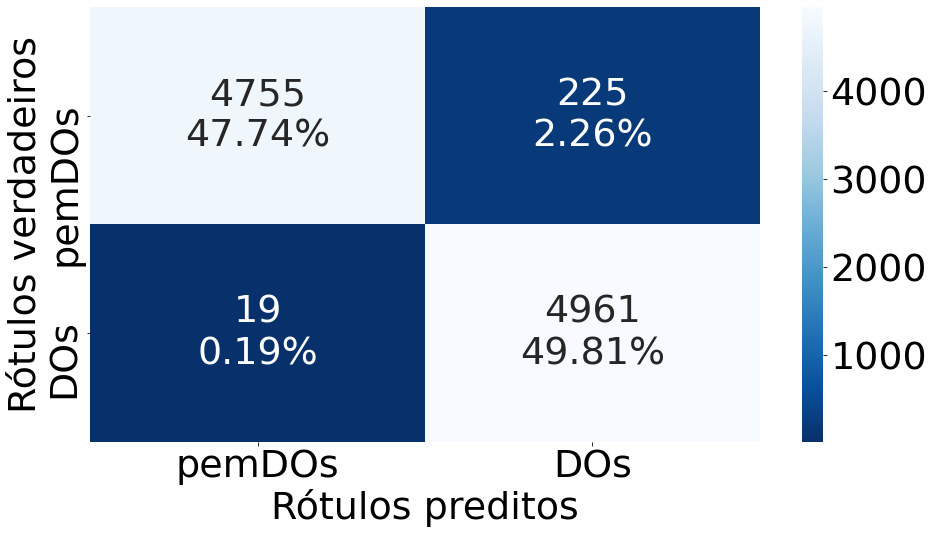

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

X_alvo =     dfDadosClassificacao['classe'].tolist()
y_predicao = dfDadosClassificacao['predicao'].tolist()

print(classification_report(X_alvo, y_predicao))

# Insere os dados no gráfico
cf_matrix = confusion_matrix(X_alvo, y_predicao)
quantidade_grupos = ["{0:0.0f}".format(valor) for valor in cf_matrix.flatten()]
percentual_grupos = ["{0:.2%}".format(valor) for valor in cf_matrix.flatten()/np.sum(cf_matrix)]
rotulos = [f"{v1}\n{v2}" for v1, v2 in zip(quantidade_grupos,percentual_grupos)]
rotulos = np.asarray(rotulos).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=rotulos, fmt='', cmap='Blues_r')

# Texto do eixo x
ax.set_xlabel('Rótulos preditos')
# Texto do eixo y
ax.set_ylabel('Rótulos verdadeiros')
# Rótulos adicionais
ax.xaxis.set_ticklabels(['pemDOs','DOs'])
ax.yaxis.set_ticklabels(['pemDOs','DOs'])

# Mostra o gráfico
plt.show()

### Listas em pares

#### Listas de pares de documentos originais e permutados classificados corretamente

In [ ]:
def listaClassificadoCorretamente(dfDadosClassificacao):
  listaRetorno = []  
  for index, linha in dfDadosClassificacao.iterrows():
    #if index < 20:    
    if linha['classe'] == 1 and linha['predicao'] == 1:
        listaRetorno.append(linha['id'])
    if linha['classe'] == 0 and linha['predicao'] == 0:
        listaRetorno.append(linha['id'])
  return listaRetorno

In [ ]:
listaRetornoClassificadoCorretamente = listaClassificadoCorretamente(dfDadosClassificacao)
print('listaRetornoClassificadoCorretamente:', len(listaRetornoClassificadoCorretamente))

listaRetornoClassificadoCorretamente: 9716


#### Listas de pares de documentos originais e permutados classificados incorretamente

In [ ]:
def listaClassificadoIncorretamente(dfDadosClassificacao):
  listaRetorno = []  
  for index, linha in dfDadosClassificacao.iterrows():
    if linha['classe'] == 1 and linha['predicao'] == 0:
        listaRetorno.append(linha['id'])
    if linha['classe'] == 0 and linha['predicao'] == 1:
        listaRetorno.append(linha['id'])
  return listaRetorno

In [ ]:
listaRetornoClassificadoIncorretamente = listaClassificadoIncorretamente(dfDadosClassificacao)
print('listaRetornoClassificadoIncorretamente:', len(listaRetornoClassificadoIncorretamente))

listaRetornoClassificadoIncorretamente: 244


#### Acurácia das listas

In [ ]:
total = len(listaRetornoClassificadoCorretamente) + len(listaRetornoClassificadoIncorretamente)
print("Total de documentos:", total)
print("Total de acertos   :", len(listaRetornoClassificadoCorretamente))
print("Acurácia           :", len(listaRetornoClassificadoCorretamente)/total)

Total de documentos: 9960
Total de acertos   : 9716
Acurácia           : 0.9755020080321285


#### Listas documentos originais e permutados classificados incorretamente

In [ ]:
print("Documentos originais e permutados classificados incorretamente:", len(listaRetornoClassificadoIncorretamente))
for index, linha in enumerate(listaRetornoClassificadoIncorretamente):
  print(linha)

Documentos originais e permutados classificados incorretamente: 244
C9_Extrato_4_Perm_9.txt
C12_Extrato_5_Perm_6.txt
C5_Extrato_1_Perm_5.txt
C5_Extrato_1_Perm_6.txt
C50_Extrato_1.txt
C50_Extrato_3.txt
C47_Extrato_2.txt
C4_Extrato_5_Perm_4.txt
C7_Extrato_4_Perm_10.txt
C7_Extrato_1_Perm_8.txt
C47_Extrato_5.txt
C40_Extrato_4_Perm_13.txt
C47_Extrato_5.txt
C30_Extrato_1_Perm_7.txt
C23_Extrato_5_Perm_1.txt
C6_Extrato_1_Perm_17.txt
C7_Extrato_5_Perm_6.txt
C20_Extrato_2.txt
C40_Extrato_6_Perm_13.txt
C49_Extrato_3_Perm_13.txt
C47_Extrato_5.txt
C13_Extrato_4_Perm_17.txt
C40_Extrato_5.txt
C33_Extrato_2_Perm_3.txt
C9_Extrato_5_Perm_19.txt
C1_Extrato_5_Perm_18.txt
C6_Extrato_4_Perm_10.txt
C27_Extrato_3_Perm_19.txt
C47_Extrato_3_Perm_14.txt
C23_Extrato_3_Perm_17.txt
C40_Extrato_3.txt
C40_Extrato_3.txt
C24_Extrato_1_Perm_16.txt
C37_Extrato_3_Perm_18.txt
C17_Extrato_6.txt
C17_Extrato_6.txt
C17_Extrato_6.txt
C45_Extrato_6_Perm_12.txt
C4_Extrato_1_Perm_4.txt
C12_Extrato_3_Perm_0.txt
C36_Extrato_6_Perm_8

### Lista de documento originais classificados corretamente(coerente)

In [ ]:
def listaOriginalClassificadoCorretamente(dfDadosClassificacao):
  listaRetorno = []  
  for index, linha in dfDadosClassificacao.iterrows():
    if linha['classe'] == 1 and linha['predicao'] == 1:
        listaRetorno.append(linha['id'])
  return listaRetorno

In [ ]:
listaRetornoOriginalClassificadoCorretamente = listaOriginalClassificadoCorretamente(dfDadosClassificacao)
print('listaRetornoOriginalClassificadoCorretamente:', len(listaRetornoOriginalClassificadoCorretamente))

listaRetornoOriginalClassificadoCorretamente: 4961


In [ ]:
import collections
lista = listaRetornoOriginalClassificadoCorretamente

contador = collections.Counter(lista)

print("Lista de documentos originais classificados como coerentes :", len(listaRetornoOriginalClassificadoCorretamente))
for chave, valor in contador.items():
  if valor != 20:
    print("documento original=",chave," foi classificado ", valor ,"vez coerente")

Lista de documentos originais classificados como coerentes : 4961
documento original= C41_Extrato_5.txt  foi classificado  19 vez coerente
documento original= C40_Extrato_3.txt  foi classificado  18 vez coerente
documento original= C42_Extrato_6.txt  foi classificado  18 vez coerente
documento original= C17_Extrato_6.txt  foi classificado  17 vez coerente
documento original= C40_Extrato_5.txt  foi classificado  19 vez coerente
documento original= C46_Extrato_2.txt  foi classificado  19 vez coerente
documento original= C50_Extrato_3.txt  foi classificado  19 vez coerente
documento original= C20_Extrato_2.txt  foi classificado  19 vez coerente
documento original= C47_Extrato_2.txt  foi classificado  19 vez coerente
documento original= C19_Extrato_6.txt  foi classificado  18 vez coerente
documento original= C50_Extrato_1.txt  foi classificado  19 vez coerente
documento original= C47_Extrato_5.txt  foi classificado  17 vez coerente


### Lista de documento originais classificados incorretamente(incoerente)

In [ ]:
def listaOriginalClassificadoIncorretamente(dfDadosClassificacao):
  listaRetorno = []  
  for index, linha in dfDadosClassificacao.iterrows():
    if linha['classe'] == 1 and linha['predicao'] == 0:
        listaRetorno.append(linha['id'])
  return listaRetorno

In [ ]:
listaRetornoOriginalClassificadoIncorretamente = listaOriginalClassificadoIncorretamente(dfDadosClassificacao)

print("Lista de documentos originais classificados incorretamente:",len(listaRetornoOriginalClassificadoIncorretamente))
for linha in listaRetornoOriginalClassificadoIncorretamente:
    print(linha)

Lista de documentos originais classificados incorretamente: 19
C50_Extrato_1.txt
C50_Extrato_3.txt
C47_Extrato_2.txt
C47_Extrato_5.txt
C47_Extrato_5.txt
C20_Extrato_2.txt
C47_Extrato_5.txt
C40_Extrato_5.txt
C40_Extrato_3.txt
C40_Extrato_3.txt
C17_Extrato_6.txt
C17_Extrato_6.txt
C17_Extrato_6.txt
C41_Extrato_5.txt
C42_Extrato_6.txt
C42_Extrato_6.txt
C19_Extrato_6.txt
C19_Extrato_6.txt
C46_Extrato_2.txt


In [ ]:
import collections
lista = listaRetornoOriginalClassificadoIncorretamente

contador = collections.Counter(lista)

print("Lista de documentos originais classificados como incoerentes :", len(listaRetornoOriginalClassificadoIncorretamente))
for chave, valor in contador.items():
  print("documento original=",chave," foi classificado ", valor ,"vez incoerente")

Lista de documentos originais classificados como incoerentes : 19
documento original= C50_Extrato_1.txt  foi classificado  1 vez incoerente
documento original= C50_Extrato_3.txt  foi classificado  1 vez incoerente
documento original= C47_Extrato_2.txt  foi classificado  1 vez incoerente
documento original= C47_Extrato_5.txt  foi classificado  3 vez incoerente
documento original= C20_Extrato_2.txt  foi classificado  1 vez incoerente
documento original= C40_Extrato_5.txt  foi classificado  1 vez incoerente
documento original= C40_Extrato_3.txt  foi classificado  2 vez incoerente
documento original= C17_Extrato_6.txt  foi classificado  3 vez incoerente
documento original= C41_Extrato_5.txt  foi classificado  1 vez incoerente
documento original= C42_Extrato_6.txt  foi classificado  2 vez incoerente
documento original= C19_Extrato_6.txt  foi classificado  2 vez incoerente
documento original= C46_Extrato_2.txt  foi classificado  1 vez incoerente


In [ ]:
# Retira as repetições dos documentos
conjuntoOriginalClassificadoIncorretamente = set(listaRetornoOriginalClassificadoIncorretamente)

In [ ]:
print("Conjunto documento originais classificados incorretamente:", len(conjuntoOriginalClassificadoIncorretamente))
for linha in conjuntoOriginalClassificadoIncorretamente:
  print(linha)

Conjunto documento originais classificados incorretamente: 12
C47_Extrato_5.txt
C50_Extrato_3.txt
C46_Extrato_2.txt
C40_Extrato_5.txt
C41_Extrato_5.txt
C20_Extrato_2.txt
C42_Extrato_6.txt
C47_Extrato_2.txt
C19_Extrato_6.txt
C50_Extrato_1.txt
C40_Extrato_3.txt
C17_Extrato_6.txt


In [ ]:
# Biblioteca para acessar o sistema de arquivos
import os

arquivos = os.listdir('/content/Modelo de Relações Discursivas/Sumarios_Humanos/') #Entrada (Input) - diretório de sumários humanos e permutados

#del x[0](Comentando, pois o arquivo '.DS_Store' não está no início da lista!)
if '.DS_Store' in arquivos:
    arquivos.remove('.DS_Store')

print("Lista documentos originais não classificados corretamente:")
cont = 1
for i in range(len(arquivos)):
    
  for linha in conjuntoOriginalClassificadoIncorretamente:

    if arquivos[i] == linha:
      print("Original:", cont)
      documento = carregar('/content/Modelo de Relações Discursivas/Sumarios_Humanos/'+arquivos[i])
      sentencas = carregarLista('/content/Modelo de Relações Discursivas/Sumarios_Humanos/'+arquivos[i])

      print("  ", documento, "\n")
      cont = cont + 1    


Lista documentos originais não classificados corretamente:
Original: 1
   O presidente da Câmara, Arlindo Chinaglia (PT-SP), marcou para hoje a votação da PEC (Proposta de Emenda Constitucional) que prorroga a cobrança da CPMF (Contribuição Provisória sobre Movimentação Financeira) até 2011 e mantém a alíquota de 0,38%. A discussão sobre a proposta já foi aberta e a intenção do governo é votar a prorrogação da cobrança do chamado imposto do cheque ainda hoje. Para a aprovação da matéria, são necessários 308 votos dos 513 parlamentares (três quintos da Casa), em votações em primeiro e segundo turnos. Para ser promulgada, a PEC deve passar pelo mesmo trâmite no Senado. Como o governo tem maioria na Câmara, a expectativa é que a PEC da CMPF seja votada ainda hoje. No entanto, deputados de oposição tentam obstruir a votação para adiar a aprovação da prorrogação da PEC da CPMF. 

Original: 2
   BRASÍLIA - Ao deixar a reunião dos tucanos com o ministro da Fazenda, Guido Mantega, o senador Sé

### Lista Documentos Permutados Classificados

In [ ]:
def listaPermutadoClassificadoCorretamente(dfDadosClassificacao):
  listaRetorno = []  
  for index, linha in dfDadosClassificacao.iterrows():
    if linha['classe'] == 0 and linha['predicao'] == 0:
        listaRetorno.append(linha['id'])
  return listaRetorno

In [ ]:
def listaPermutadoClassificadoIncorretamente(dfDadosClassificacao):
  listaRetorno = []  
  for index, linha in dfDadosClassificacao.iterrows():
    if linha['classe'] == 0 and linha['predicao'] == 1:
        listaRetorno.append(linha['id'])
  return listaRetorno

In [ ]:
listaRetornoPermutadoClassificadoCorretamente = listaPermutadoClassificadoCorretamente(dfDadosClassificacao)
print('listaRetornoPermutadoClassificadoCorretamente:', len(listaRetornoPermutadoClassificadoCorretamente))

listaRetornoPermutadoClassificadoIncorretamente = listaPermutadoClassificadoIncorretamente(dfDadosClassificacao)
print('listaRetornoPermutadoClassificadoIncorretamente:', len(listaRetornoPermutadoClassificadoIncorretamente))

listaRetornoPermutadoClassificadoCorretamente: 4755
listaRetornoPermutadoClassificadoIncorretamente: 225


In [ ]:
print('Documentos permutados classificados incorretamente:', len(listaRetornoPermutadoClassificadoIncorretamente))
for linha in listaRetornoPermutadoClassificadoIncorretamente:
    print(linha)

Documentos permutados classificados incorretamente: 225
C9_Extrato_4_Perm_9.txt
C12_Extrato_5_Perm_6.txt
C5_Extrato_1_Perm_5.txt
C5_Extrato_1_Perm_6.txt
C4_Extrato_5_Perm_4.txt
C7_Extrato_4_Perm_10.txt
C7_Extrato_1_Perm_8.txt
C40_Extrato_4_Perm_13.txt
C30_Extrato_1_Perm_7.txt
C23_Extrato_5_Perm_1.txt
C6_Extrato_1_Perm_17.txt
C7_Extrato_5_Perm_6.txt
C40_Extrato_6_Perm_13.txt
C49_Extrato_3_Perm_13.txt
C13_Extrato_4_Perm_17.txt
C33_Extrato_2_Perm_3.txt
C9_Extrato_5_Perm_19.txt
C1_Extrato_5_Perm_18.txt
C6_Extrato_4_Perm_10.txt
C27_Extrato_3_Perm_19.txt
C47_Extrato_3_Perm_14.txt
C23_Extrato_3_Perm_17.txt
C24_Extrato_1_Perm_16.txt
C37_Extrato_3_Perm_18.txt
C45_Extrato_6_Perm_12.txt
C4_Extrato_1_Perm_4.txt
C12_Extrato_3_Perm_0.txt
C36_Extrato_6_Perm_8.txt
C42_Extrato_3_Perm_11.txt
C47_Extrato_2_Perm_10.txt
C5_Extrato_3_Perm_11.txt
C48_Extrato_5_Perm_9.txt
C24_Extrato_1_Perm_14.txt
C12_Extrato_3_Perm_5.txt
C27_Extrato_1_Perm_12.txt
C47_Extrato_1_Perm_7.txt
C50_Extrato_3_Perm_19.txt
C28_Extrato

In [ ]:
conjuntoPermutadoClassificadoIncorretamente = set(listaRetornoPermutadoClassificadoIncorretamente)

In [ ]:
print("conjuntoPermutadoClassificadoIncorretamente:", len(conjuntoPermutadoClassificadoIncorretamente))
for linha in conjuntoPermutadoClassificadoIncorretamente:
  print(linha)

conjuntoPermutadoClassificadoIncorretamente: 225
C50_Extrato_6_Perm_3.txt
C36_Extrato_3_Perm_16.txt
C13_Extrato_4_Perm_19.txt
C4_Extrato_2_Perm_13.txt
C47_Extrato_6_Perm_11.txt
C46_Extrato_5_Perm_17.txt
C30_Extrato_2_Perm_2.txt
C23_Extrato_3_Perm_9.txt
C5_Extrato_1_Perm_6.txt
C15_Extrato_5_Perm_16.txt
C46_Extrato_2_Perm_16.txt
C22_Extrato_1_Perm_17.txt
C4_Extrato_4_Perm_4.txt
C4_Extrato_5_Perm_14.txt
C40_Extrato_3_Perm_13.txt
C30_Extrato_1_Perm_4.txt
C36_Extrato_6_Perm_8.txt
C13_Extrato_1_Perm_16.txt
C4_Extrato_2_Perm_2.txt
C2_Extrato_2_Perm_11.txt
C33_Extrato_4_Perm_18.txt
C37_Extrato_4_Perm_9.txt
C3_Extrato_5_Perm_6.txt
C9_Extrato_5_Perm_5.txt
C26_Extrato_3_Perm_5.txt
C22_Extrato_6_Perm_9.txt
C29_Extrato_5_Perm_7.txt
C1_Extrato_2_Perm_6.txt
C36_Extrato_2_Perm_16.txt
C48_Extrato_5_Perm_9.txt
C47_Extrato_5_Perm_12.txt
C5_Extrato_2_Perm_4.txt
C29_Extrato_6_Perm_9.txt
C43_Extrato_2_Perm_8.txt
C12_Extrato_5_Perm_7.txt
C30_Extrato_2_Perm_6.txt
C5_Extrato_1_Perm_5.txt
C7_Extrato_5_Perm_10.t

## 4.4 Comparação

### Verificando medidas de coerência para os documentos originais não classificados corretamente.

In [ ]:
acertosOriginal  = 0  
conta = 0
listaDocumentosOriginaisCoerentes = []
listaDocumentosOriginaisIncoerentes = []
listaParesCoerentes = []
listaParesIncoerentes = []
for linha1 in conjuntoOriginalClassificadoIncorretamente:
  for i, linha2 in dfListaParesDocumentosMedidasBERTimbaub.iterrows():    
      # Verifica se o arquivo é igual
      if linha1 in linha2['idDO']:        
        conta = conta + 1
        if linha2['ceucDO'] <= linha2[ 'ceucPerm']:          
          acertosOriginal = acertosOriginal + 1
          listaDocumentosOriginaisCoerentes.append(linha1)
          listaParesCoerentes.append([linha2['idDO'], linha2['idPerm']])
        else:
          listaDocumentosOriginaisIncoerentes.append(linha1)
          listaParesIncoerentes.append([linha2['idDO'], linha2['idPerm']])

print("Quantidade de documentos originais classificados como incoerente:", len(conjuntoOriginalClassificadoIncorretamente))
print("Quantidade de pares comparados:", conta)
print("Quantidade de documentos originais classificados como incoerentes e medidos como coerente:", len(set(listaDocumentosOriginaisCoerentes)))
print("Quantidade de documentos originais classificados como incoerentes e medidos como incoerente:", len(set(listaDocumentosOriginaisIncoerentes)))
print("Quantidade de pares de documentos classificados como incoerentes e medidos como coerentes:", len(listaParesCoerentes))
print("Quantidade de pares de documentos classificados como incoerentes e medidos como incoerentes:", len(listaParesIncoerentes))

Quantidade de documentos originais classificados como incoerente: 12
Quantidade de pares comparados: 240
Quantidade de documentos originais classificados como incoerentes e medidos como coerente: 12
Quantidade de documentos originais classificados como incoerentes e medidos como incoerente: 11
Quantidade de pares de documentos classificados como incoerentes e medidos como coerentes: 113
Quantidade de pares de documentos classificados como incoerentes e medidos como incoerentes: 127


In [ ]:
import collections
lista = listaDocumentosOriginaisCoerentes

contador = collections.Counter(lista)

print("Lista de documentos originais classificados como incoerentes mas medidos como coerente:", len(listaDocumentosOriginaisCoerentes))
for chave, valor in contador.items():
  print("documento original:",chave," mais coerente que ", valor ,"permutados")

Lista de documentos originais classificados como incoerentes mas medidos como coerente: 113
documento original: C47_Extrato_5.txt  mais coerente que  1 permutados
documento original: C50_Extrato_3.txt  mais coerente que  16 permutados
documento original: C46_Extrato_2.txt  mais coerente que  8 permutados
documento original: C40_Extrato_5.txt  mais coerente que  14 permutados
documento original: C41_Extrato_5.txt  mais coerente que  6 permutados
documento original: C20_Extrato_2.txt  mais coerente que  7 permutados
documento original: C42_Extrato_6.txt  mais coerente que  3 permutados
documento original: C47_Extrato_2.txt  mais coerente que  8 permutados
documento original: C19_Extrato_6.txt  mais coerente que  20 permutados
documento original: C50_Extrato_1.txt  mais coerente que  11 permutados
documento original: C40_Extrato_3.txt  mais coerente que  16 permutados
documento original: C17_Extrato_6.txt  mais coerente que  3 permutados


In [ ]:
import collections
lista = listaDocumentosOriginaisIncoerentes

contador = collections.Counter(lista)

print("Frequência de pares de documentos classificados como incoerentes mas medidos como incoerente:", len(listaDocumentosOriginaisIncoerentes))
for chave, valor in contador.items():
  print("documento original:",chave," menos coerente que ", valor ,"permutados")

Frequência de pares de documentos classificados como incoerentes mas medidos como incoerente: 127
documento original: C47_Extrato_5.txt  menos coerente que  19 permutados
documento original: C50_Extrato_3.txt  menos coerente que  4 permutados
documento original: C46_Extrato_2.txt  menos coerente que  12 permutados
documento original: C40_Extrato_5.txt  menos coerente que  6 permutados
documento original: C41_Extrato_5.txt  menos coerente que  14 permutados
documento original: C20_Extrato_2.txt  menos coerente que  13 permutados
documento original: C42_Extrato_6.txt  menos coerente que  17 permutados
documento original: C47_Extrato_2.txt  menos coerente que  12 permutados
documento original: C50_Extrato_1.txt  menos coerente que  9 permutados
documento original: C40_Extrato_3.txt  menos coerente que  4 permutados
documento original: C17_Extrato_6.txt  menos coerente que  17 permutados


In [ ]:
print("Lista de documentos originais e suas permutações medidos como coerentes:", len(listaParesCoerentes))
for linha in listaParesCoerentes:
    print(linha)

Lista de documentos originais e suas permutações medidos como coerentes: 113
['C47_Extrato_5.txt', 'C47_Extrato_5_Perm_12.txt']
['C50_Extrato_3.txt', 'C50_Extrato_3_Perm_0.txt']
['C50_Extrato_3.txt', 'C50_Extrato_3_Perm_1.txt']
['C50_Extrato_3.txt', 'C50_Extrato_3_Perm_2.txt']
['C50_Extrato_3.txt', 'C50_Extrato_3_Perm_4.txt']
['C50_Extrato_3.txt', 'C50_Extrato_3_Perm_5.txt']
['C50_Extrato_3.txt', 'C50_Extrato_3_Perm_7.txt']
['C50_Extrato_3.txt', 'C50_Extrato_3_Perm_9.txt']
['C50_Extrato_3.txt', 'C50_Extrato_3_Perm_10.txt']
['C50_Extrato_3.txt', 'C50_Extrato_3_Perm_11.txt']
['C50_Extrato_3.txt', 'C50_Extrato_3_Perm_12.txt']
['C50_Extrato_3.txt', 'C50_Extrato_3_Perm_13.txt']
['C50_Extrato_3.txt', 'C50_Extrato_3_Perm_14.txt']
['C50_Extrato_3.txt', 'C50_Extrato_3_Perm_15.txt']
['C50_Extrato_3.txt', 'C50_Extrato_3_Perm_16.txt']
['C50_Extrato_3.txt', 'C50_Extrato_3_Perm_18.txt']
['C50_Extrato_3.txt', 'C50_Extrato_3_Perm_19.txt']
['C46_Extrato_2.txt', 'C46_Extrato_2_Perm_0.txt']
['C46_Extrato

In [ ]:
print("Lista de documentos originais e suas permutações medidos como incoerente:", len(listaParesIncoerentes))
for linha in listaParesIncoerentes:
    print(linha)

Lista de documentos originais e suas permutações medidos como incoerente: 127
['C47_Extrato_5.txt', 'C47_Extrato_5_Perm_0.txt']
['C47_Extrato_5.txt', 'C47_Extrato_5_Perm_1.txt']
['C47_Extrato_5.txt', 'C47_Extrato_5_Perm_2.txt']
['C47_Extrato_5.txt', 'C47_Extrato_5_Perm_3.txt']
['C47_Extrato_5.txt', 'C47_Extrato_5_Perm_4.txt']
['C47_Extrato_5.txt', 'C47_Extrato_5_Perm_5.txt']
['C47_Extrato_5.txt', 'C47_Extrato_5_Perm_6.txt']
['C47_Extrato_5.txt', 'C47_Extrato_5_Perm_7.txt']
['C47_Extrato_5.txt', 'C47_Extrato_5_Perm_8.txt']
['C47_Extrato_5.txt', 'C47_Extrato_5_Perm_9.txt']
['C47_Extrato_5.txt', 'C47_Extrato_5_Perm_10.txt']
['C47_Extrato_5.txt', 'C47_Extrato_5_Perm_11.txt']
['C47_Extrato_5.txt', 'C47_Extrato_5_Perm_13.txt']
['C47_Extrato_5.txt', 'C47_Extrato_5_Perm_14.txt']
['C47_Extrato_5.txt', 'C47_Extrato_5_Perm_15.txt']
['C47_Extrato_5.txt', 'C47_Extrato_5_Perm_16.txt']
['C47_Extrato_5.txt', 'C47_Extrato_5_Perm_17.txt']
['C47_Extrato_5.txt', 'C47_Extrato_5_Perm_18.txt']
['C47_Extrato_

# 6 Finalização

## 6.3 Tempo final de processamento

Tempo processamento:  1:34:52 (h:mm:ss)

In [ ]:
 # Pega o tempo atual menos o tempo do início do processamento.
finalProcessamento = time.time()
tempoTotalProcessamento = formataTempo(finalProcessamento - inicioProcessamento)

print('')
print('  Tempo processamento:  {:} (h:mm:ss)'.format(tempoTotalProcessamento))


  Tempo processamento:  0:15:42 (h:mm:ss)
